# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math
import os

## Load All the Data

In [3]:
path = './'
files = os.listdir(path)
files.remove('accuracy.ipynb')
files.remove('accuracy copy.ipynb')
files.remove('Hasil Eksperimen.xlsx')
files.remove('Hasil Eksperimen with charts.xlsx')
files.remove('score_bi-lstm_ftp_0.0.xlsx')
files.remove('score_lstm_ftp_0.0.xlsx')
df_preds = dict()
for file in files:
    df_preds[file] = pd.read_csv(file, names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])
df_truth = pd.read_csv('../NUSW-NB15_GT.csv')

In [4]:
df_preds[files[0]].head()

id  binary_error  b_mean  b_iqr  \
0  175.45.176.0-45235-149.171.126.16-21-tcp      0.901639       1      1   
1   175.45.176.3-1025-149.171.126.11-21-tcp      0.488889       1      1   
2  175.45.176.1-28136-149.171.126.11-21-tcp      0.769231       1      1   
3  175.45.176.2-43663-149.171.126.15-21-tcp      0.793893       1      1   
4  175.45.176.3-64709-149.171.126.15-21-tcp      0.808511       1      1   

   b_zscore  floatin_error  f_mean  f_iqr  f_zscore  
0         1   53899.627119       1      1         1  
1         1   55581.511628       1      1         1  
2         1   54626.852174       1      1         1  
3         1   52161.069767       1      1         1  
4         1   56237.035971       1      1         1

In [5]:
df_truth.head()

Start time   Last time Attack category   Attack subcategory Protocol  \
0  1421927414  1421927416  Reconnaissance                 HTTP      tcp   
1  1421927415  1421927415        Exploits     Unix 'r' Service      udp   
2  1421927416  1421927416        Exploits              Browser      tcp   
3  1421927417  1421927417        Exploits  Miscellaneous Batch      tcp   
4  1421927418  1421927418        Exploits           Cisco IOS       tcp   

      Source IP  Source Port  Destination IP  Destination Port  \
0  175.45.176.0        13284  149.171.126.16                80   
1  175.45.176.3        21223  149.171.126.18             32780   
2  175.45.176.2        23357  149.171.126.16                80   
3  175.45.176.2        13792  149.171.126.16              5555   
4  175.45.176.2        26939  149.171.126.10                80   

                                         Attack Name  \
0  Domino Web Server Database Access: /doladmin.n...   
1  Solaris rwalld Format String Vulnerability (ht...   
2  Windows Metafile (WMF) SetAbortProc() Code Exe...   
3  HP Data Protector Backup (https://strikecenter...   
4  Cisco IOS HTTP Authentication Bypass Level 64 ...   

                                    Attack Reference  .  
0                                                  -  .  
1  CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...  .  
2  CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...  .  
3  CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...  .  
4  CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...  .

## Exploratory Data Analysis

In [6]:
for key, val in df_preds.items():
    print(val[['b_iqr']].value_counts())

b_iqr
0        21240
1         4063
Name: count, dtype: int64
b_iqr
0        21240
1         4063
Name: count, dtype: int64
b_iqr
0        21240
1         3947
Name: count, dtype: int64
b_iqr
0        21240
1         3951
Name: count, dtype: int64
b_iqr
0        21247
1         3944
Name: count, dtype: int64
b_iqr
0        21240
1         3947
Name: count, dtype: int64
b_iqr
0        21240
1         4063
Name: count, dtype: int64
b_iqr
0        21240
1         4063
Name: count, dtype: int64
b_iqr
0        21240
1         3951
Name: count, dtype: int64
b_iqr
0        21240
1         4063
Name: count, dtype: int64
b_iqr
0        21240
1         3947
Name: count, dtype: int64
b_iqr
0        21240
1         4063
Name: count, dtype: int64
b_iqr
0        21240
1         4063
Name: count, dtype: int64
b_iqr
0        21240
1         3951
Name: count, dtype: int64
b_iqr
0        21240
1         4063
Name: count, dtype: int64
b_iqr
0        21240
1         3947
Name: count, dtype: int64
b_iqr
0 

In [7]:
for key, val in df_preds.items():
    print(val[['b_zscore']].value_counts())

b_zscore
0           21240
1            4063
Name: count, dtype: int64
b_zscore
0           21240
1            4063
Name: count, dtype: int64
b_zscore
0           21240
1            3947
Name: count, dtype: int64
b_zscore
0           21240
1            3951
Name: count, dtype: int64
b_zscore
0           21247
1            3944
Name: count, dtype: int64
b_zscore
0           21240
1            3947
Name: count, dtype: int64
b_zscore
0           21240
1            4063
Name: count, dtype: int64
b_zscore
0           21240
1            4063
Name: count, dtype: int64
b_zscore
0           21240
1            3951
Name: count, dtype: int64
b_zscore
0           21240
1            4063
Name: count, dtype: int64
b_zscore
0           21240
1            3947
Name: count, dtype: int64
b_zscore
0           21240
1            4063
Name: count, dtype: int64
b_zscore
0           21240
1            4063
Name: count, dtype: int64
b_zscore
0           21240
1            3951
Name: count, dtype: int64
b_zsco

In [8]:
df_truth.isnull().sum()

Start time                0
Last time                 0
Attack category           0
Attack subcategory     4097
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               1
Attack Reference      50638
.                         0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [9]:
df_truth['Source Port'] = df_truth['Source Port'].astype(int)
df_truth['Destination Port'] =df_truth['Destination Port'].astype(int)
df_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174347 entries, 0 to 174346
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Start time          174347 non-null  int64 
 1   Last time           174347 non-null  int64 
 2   Attack category     174347 non-null  object
 3   Attack subcategory  170250 non-null  object
 4   Protocol            174347 non-null  object
 5   Source IP           174347 non-null  object
 6   Source Port         174347 non-null  int64 
 7   Destination IP      174347 non-null  object
 8   Destination Port    174347 non-null  int64 
 9   Attack Name         174346 non-null  object
 10  Attack Reference    123709 non-null  object
 11  .                   174347 non-null  object
dtypes: int64(4), object(8)
memory usage: 16.0+ MB


In [10]:
df_truth['Source Port'] = df_truth['Source Port'].astype(str)
df_truth['Destination Port'] =df_truth['Destination Port'].astype(str)
df_truth['id'] = df_truth[['Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol']].apply("-".join, axis=1)

## Making Predictions

In [11]:
for key, df_pred in df_preds.items():
    df_pred["predicted"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

In [12]:
for key, df_pred in df_preds.items():
    print(df_pred[df_pred['predicted']==1])


                                             id  binary_error  b_mean  b_iqr  \
26     175.45.176.3-42152-149.171.126.13-21-tcp      0.738739       1      1   
36     175.45.176.0-41600-149.171.126.14-21-tcp      0.814286       1      1   
48      175.45.176.0-9886-149.171.126.17-21-tcp      0.800000       1      1   
82     175.45.176.1-62639-149.171.126.14-21-tcp      0.793893       1      1   
84     175.45.176.1-12535-149.171.126.19-21-tcp      0.796992       1      1   
...                                         ...           ...     ...    ...   
24856  175.45.176.1-11178-149.171.126.13-21-tcp      0.854167       1      1   
24860  175.45.176.3-36366-149.171.126.11-21-tcp      0.776860       1      1   
24879  175.45.176.1-19904-149.171.126.16-21-tcp      0.790698       1      1   
24906   175.45.176.3-9103-149.171.126.17-21-tcp      0.773109       1      1   
24934  175.45.176.0-10452-149.171.126.13-21-tcp      0.776860       1      1   

       b_zscore  floatin_error  f_mean 

In [13]:
for key, df_pred in df_preds.items():
    print(df_pred[df_pred['predicted']==0])

                                             id  binary_error  b_mean  b_iqr  \
0      175.45.176.0-45235-149.171.126.16-21-tcp      0.901639       1      1   
1       175.45.176.3-1025-149.171.126.11-21-tcp      0.488889       1      1   
2      175.45.176.1-28136-149.171.126.11-21-tcp      0.769231       1      1   
3      175.45.176.2-43663-149.171.126.15-21-tcp      0.793893       1      1   
4      175.45.176.3-64709-149.171.126.15-21-tcp      0.808511       1      1   
...                                         ...           ...     ...    ...   
25298     59.166.0.8-55795-149.171.126.6-21-tcp      0.027273       0      0   
25299      149.171.126.1-21-59.166.0.7-7753-tcp      0.081081       0      1   
25300      59.166.0.3-7585-149.171.126.2-21-tcp      0.027273       0      0   
25301     59.166.0.1-27560-149.171.126.3-21-tcp      0.000000       0      1   
25302     59.166.0.2-49329-149.171.126.0-21-tcp      0.022989       0      1   

       b_zscore  floatin_error  f_mean 

In [14]:
df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv('../mcnemar/ftp/pred_0.0.csv')

## Calculating Score

In [15]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

### Detection Rate

In [16]:
from sklearn.metrics import recall_score

score = dict()
for key, val in df_preds.items():
    score[key] = dict()
    score[key]['Detection Rate'] = dict()
    for method in methods:
        if method == 'binary':
            for i in threshold:
                acc = recall_score(val[i], val['predicted'])
                score[key]['Detection Rate'][i] = acc
                print(f'Recall-{key}-Binary-{i}: {acc}')
        else:
            for i in threshold_2:
                acc = recall_score(val[i], val['predicted'])
                score[key]['Detection Rate'][i] = acc
                print(f'Recall-{key}-Floating-{i}: {acc}')  

Recall-result-lstm-tcp21-hl2-seq2-do0.2-oov1000-combined-00021.pcap.csv-Binary-b_mean: 0.6367272727272727
Recall-result-lstm-tcp21-hl2-seq2-do0.2-oov1000-combined-00021.pcap.csv-Binary-b_iqr: 0.43145459020428256
Recall-result-lstm-tcp21-hl2-seq2-do0.2-oov1000-combined-00021.pcap.csv-Binary-b_zscore: 0.43145459020428256
Recall-result-lstm-tcp21-hl2-seq2-do0.2-oov1000-combined-00021.pcap.csv-Floating-f_mean: 0.7270554493307839
Recall-result-lstm-tcp21-hl2-seq2-do0.2-oov1000-combined-00021.pcap.csv-Floating-f_iqr: 0.43145459020428256
Recall-result-lstm-tcp21-hl2-seq2-do0.2-oov1000-combined-00021.pcap.csv-Floating-f_zscore: 0.43145459020428256
Recall-result-lstm-tcp21-hl2-seq3-do0.2-oov1000-combined-00021.pcap.csv-Binary-b_mean: 0.657098121085595
Recall-result-lstm-tcp21-hl2-seq3-do0.2-oov1000-combined-00021.pcap.csv-Binary-b_iqr: 0.43145459020428256
Recall-result-lstm-tcp21-hl2-seq3-do0.2-oov1000-combined-00021.pcap.csv-Binary-b_zscore: 0.43145459020428256
Recall-result-lstm-tcp21-hl2-seq

### Confussion Matrix

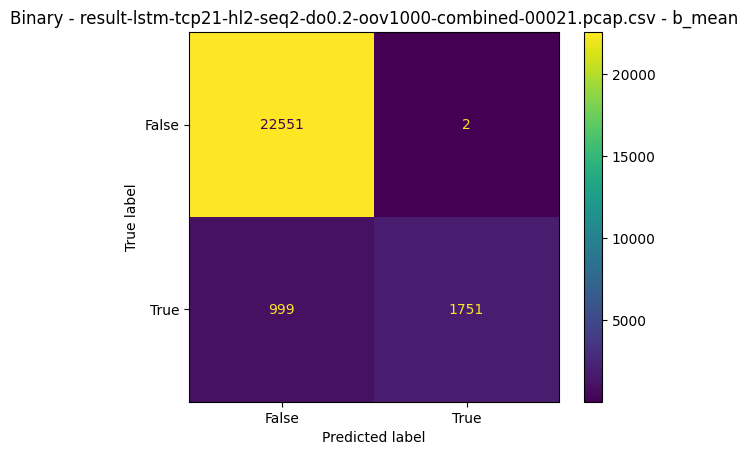

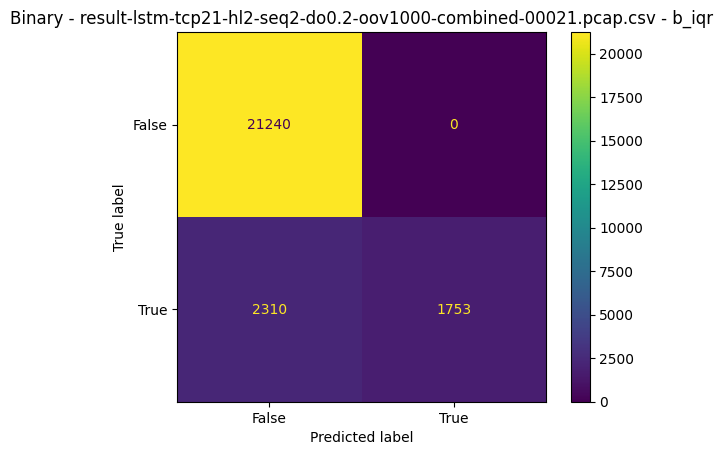

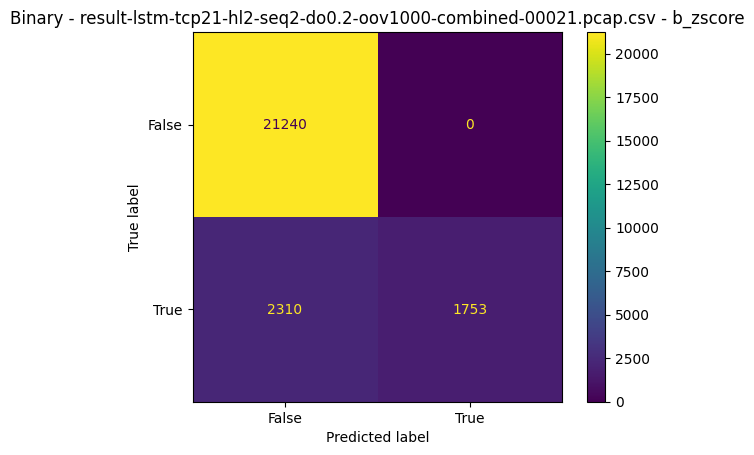

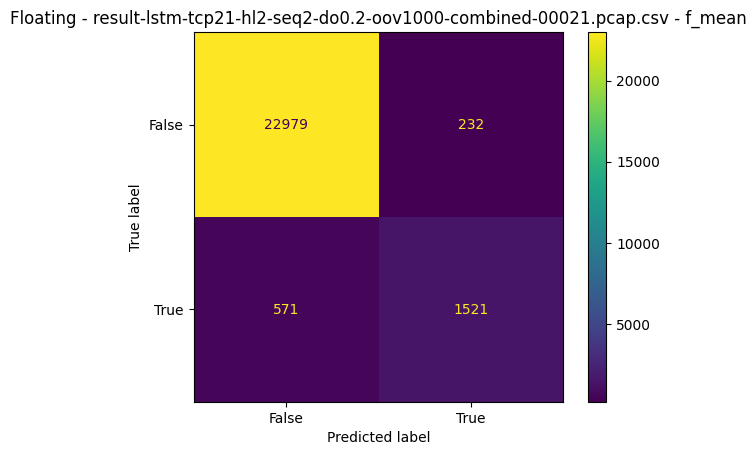

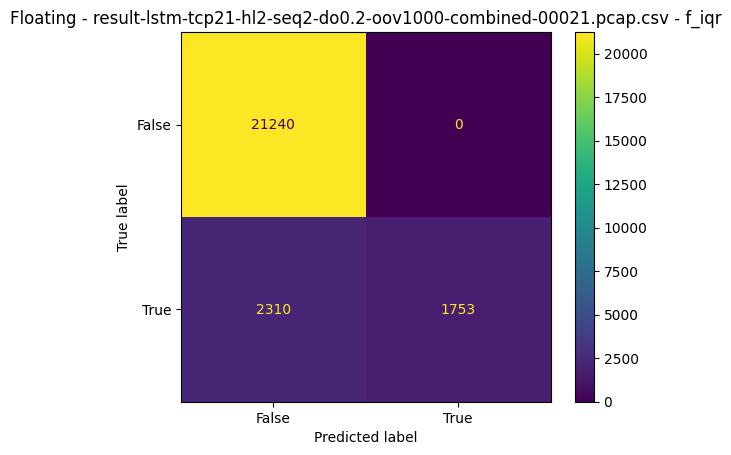

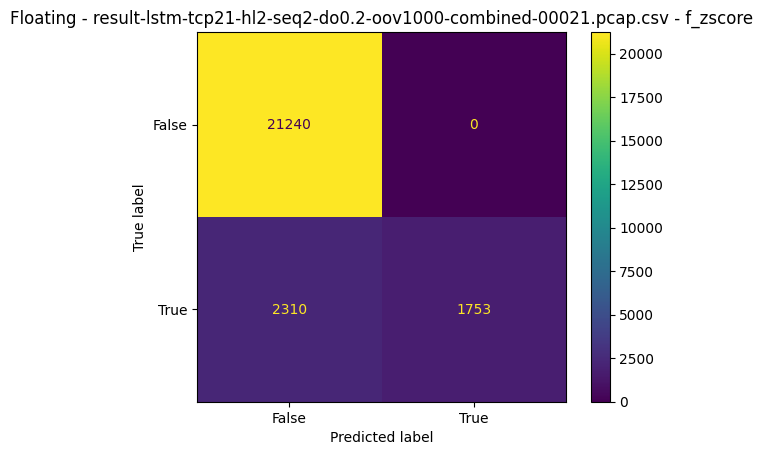

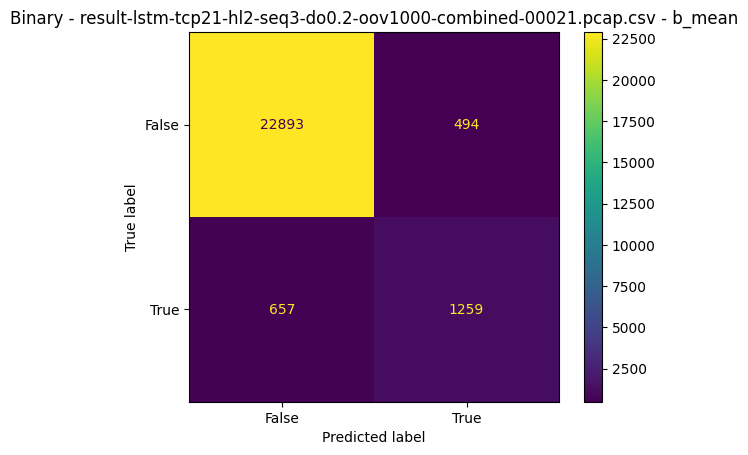

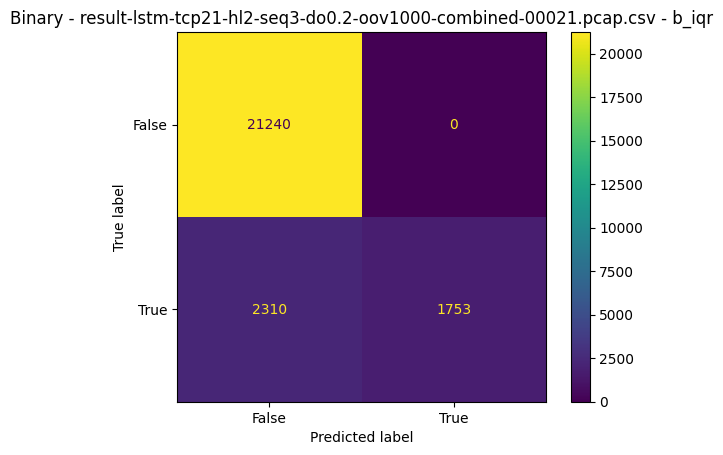

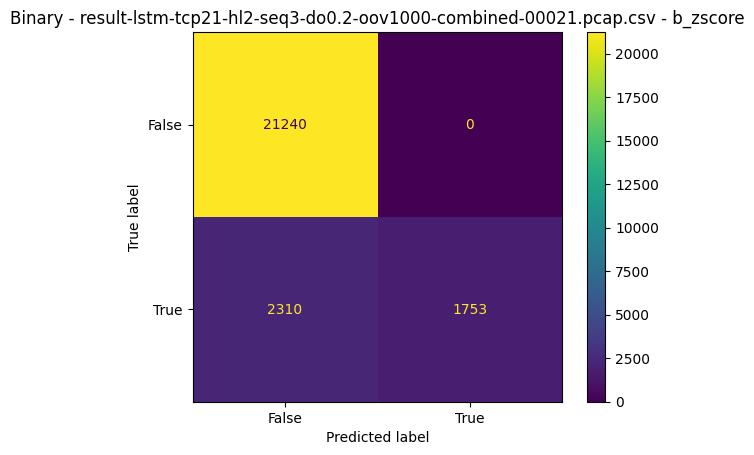

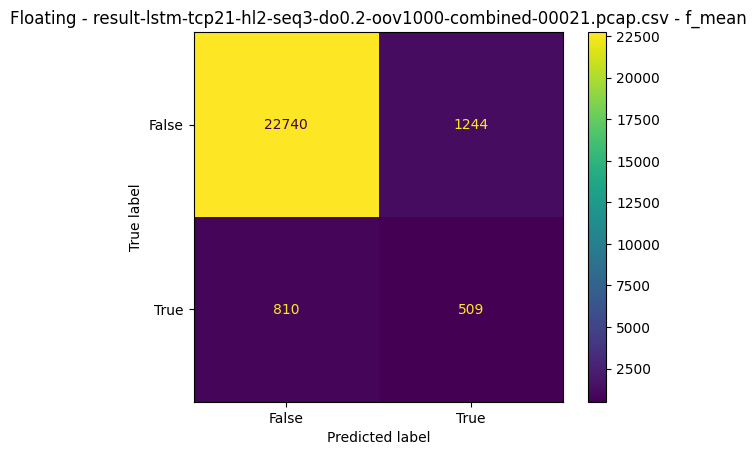

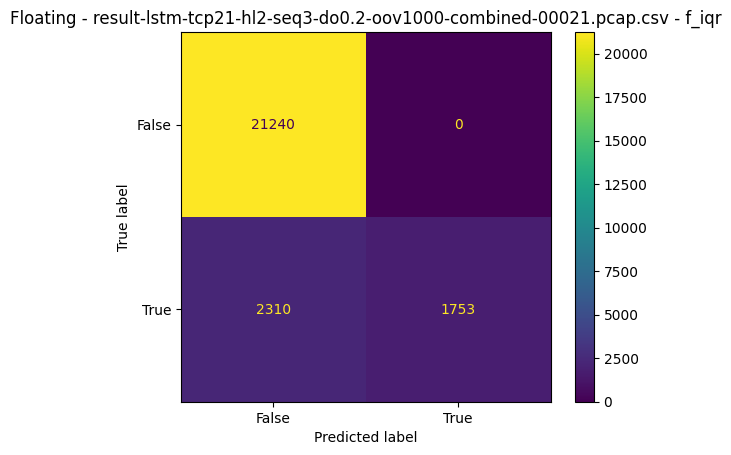

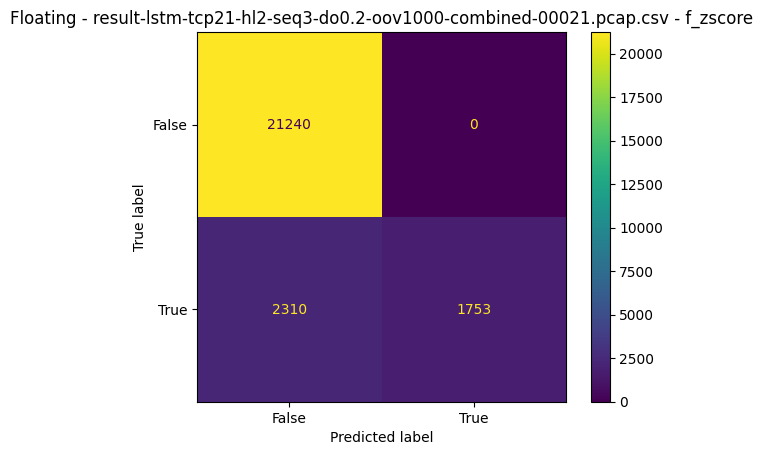

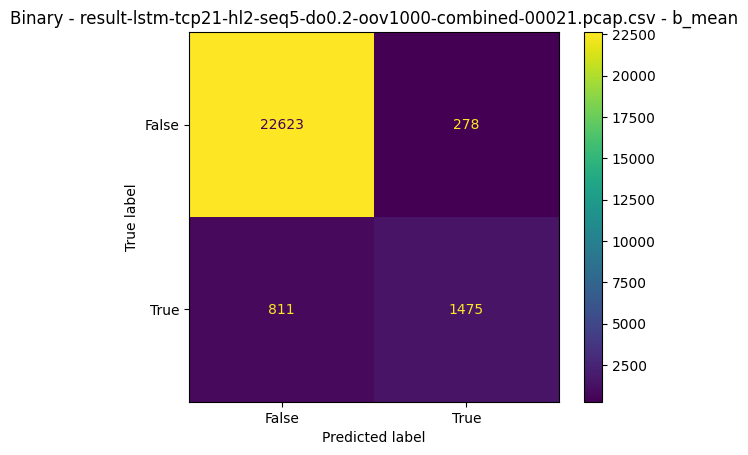

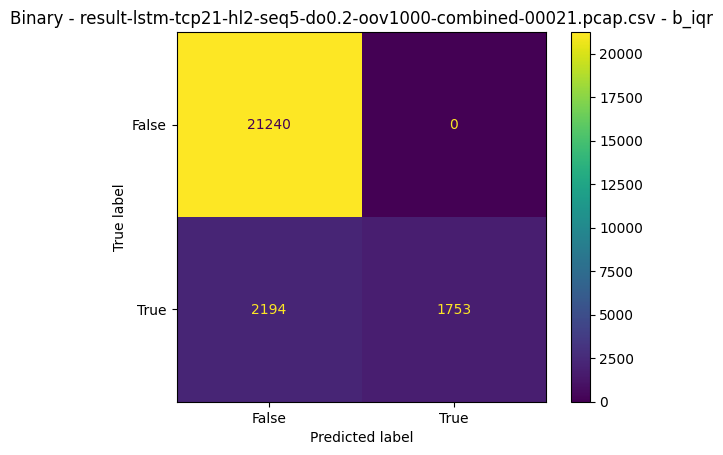

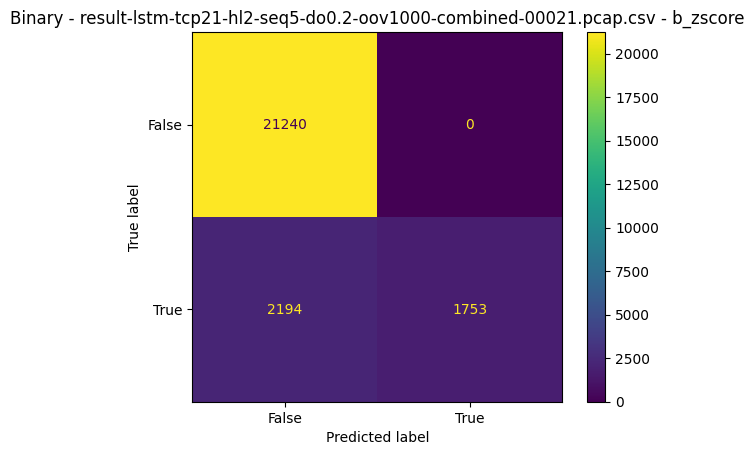

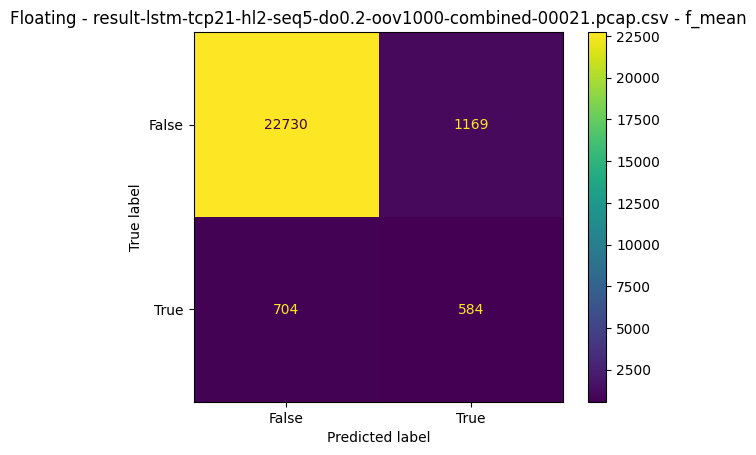

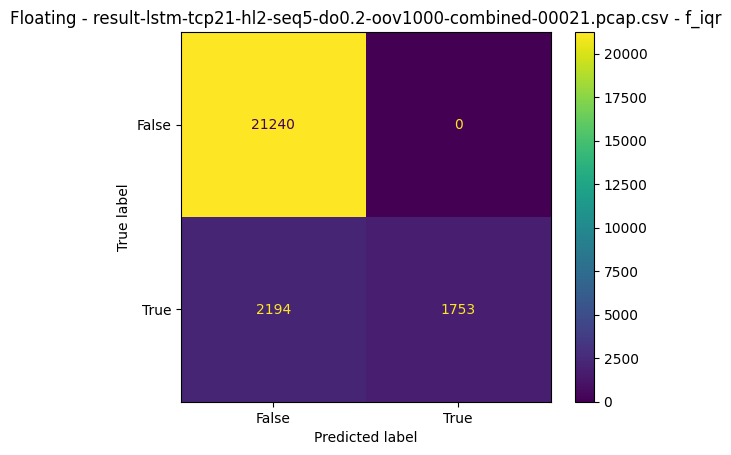

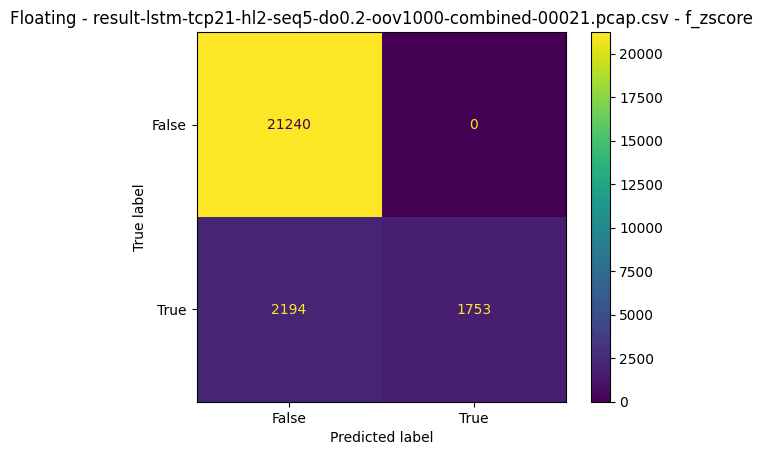

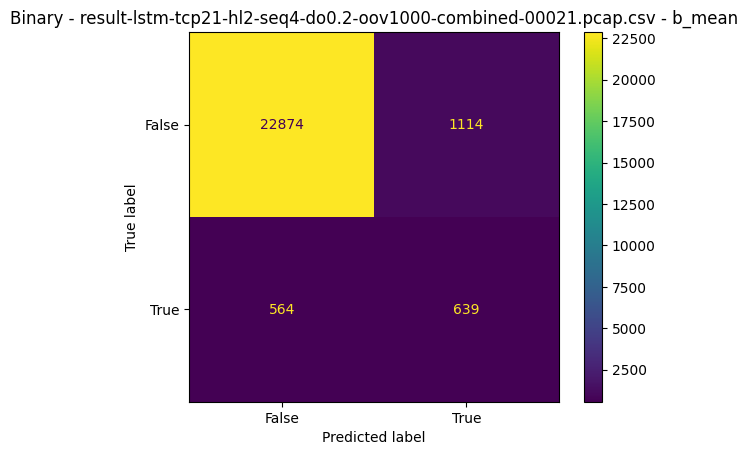

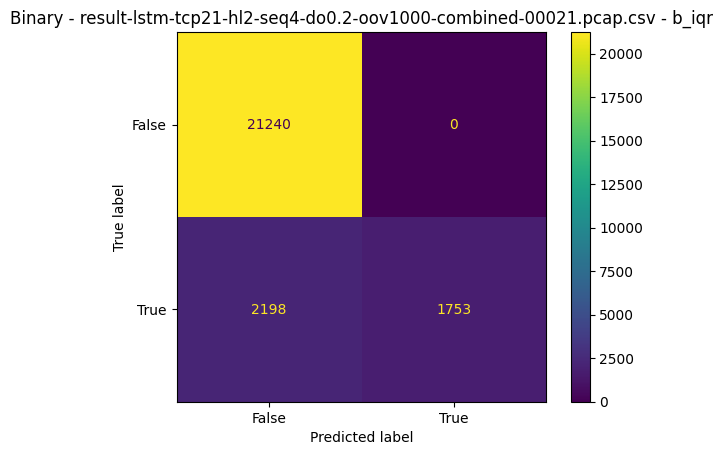

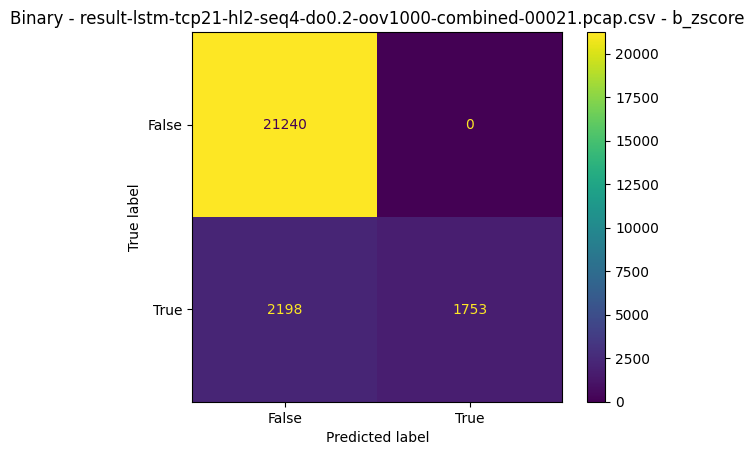

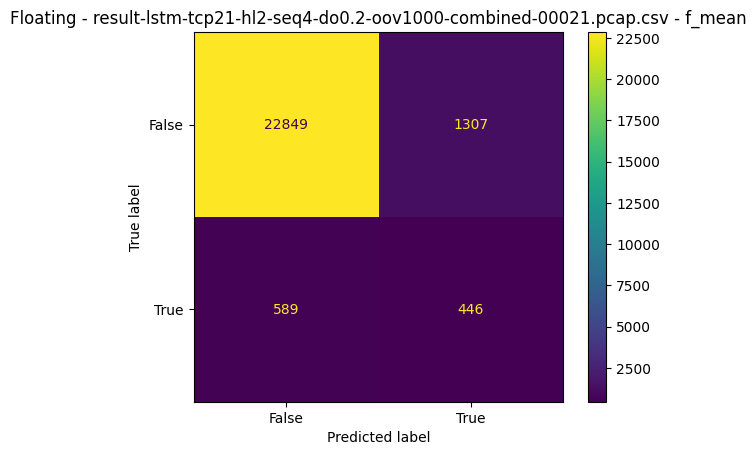

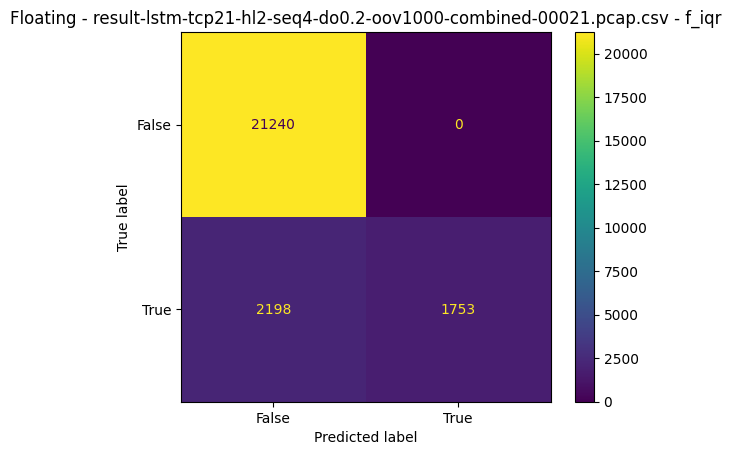

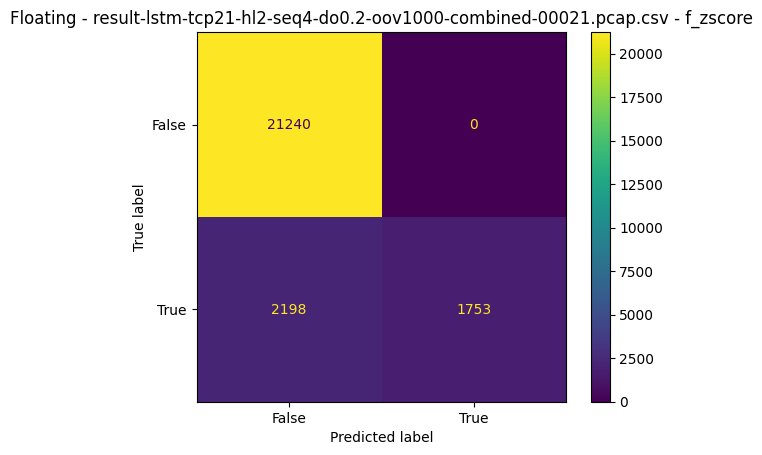

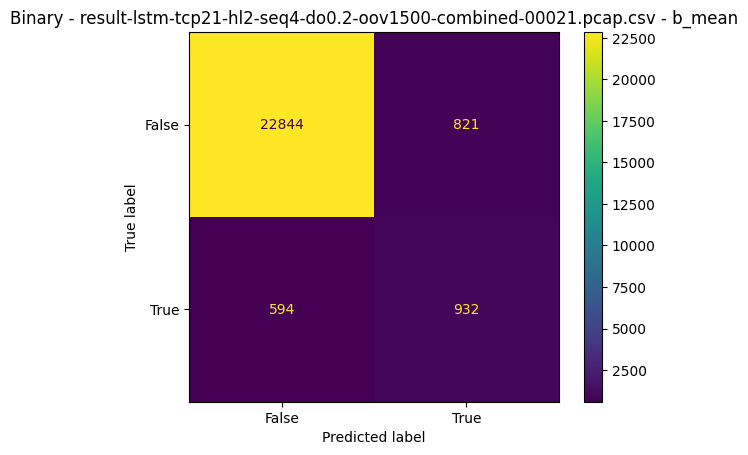

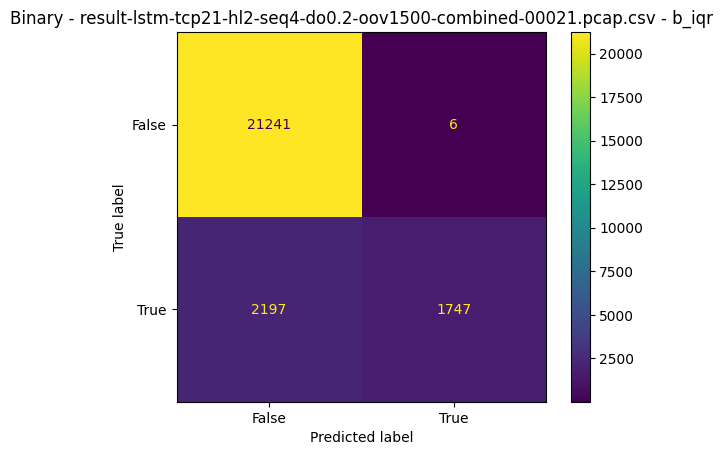

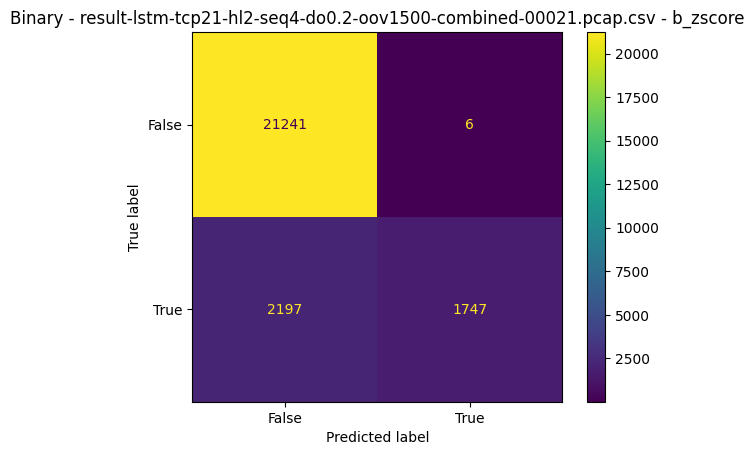

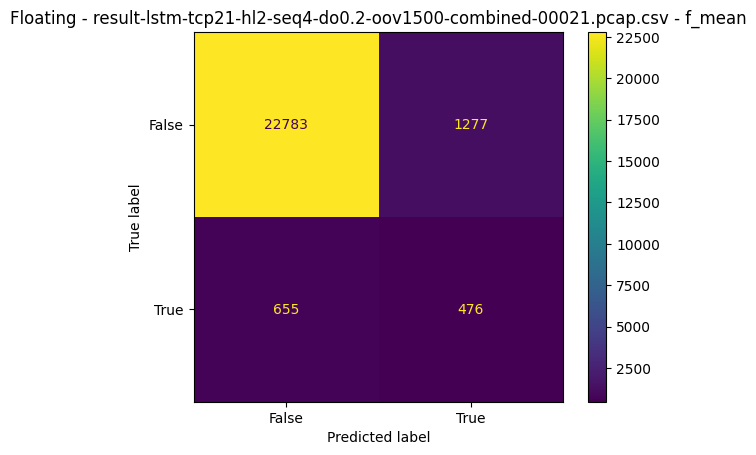

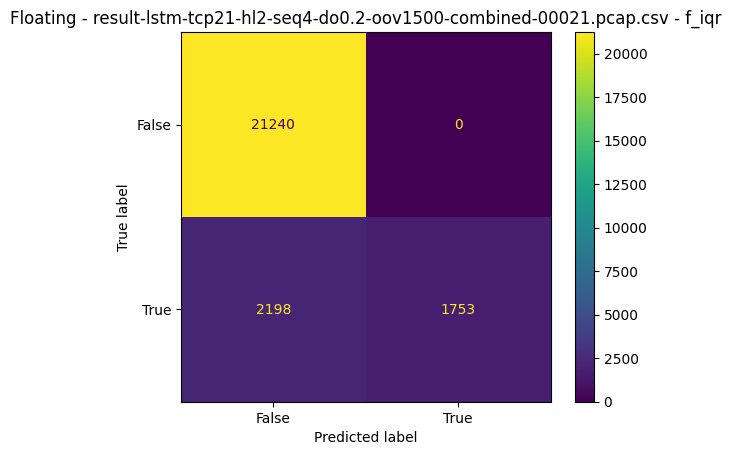

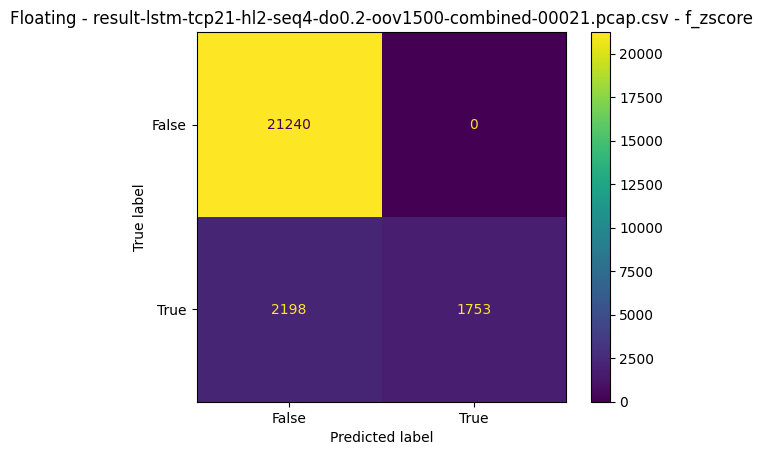

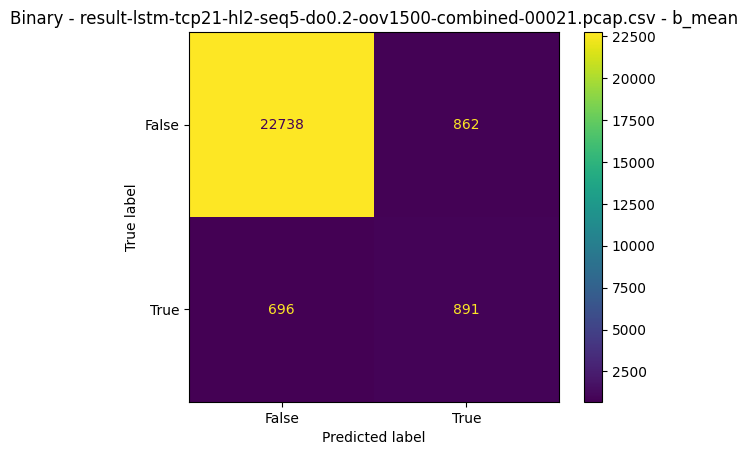

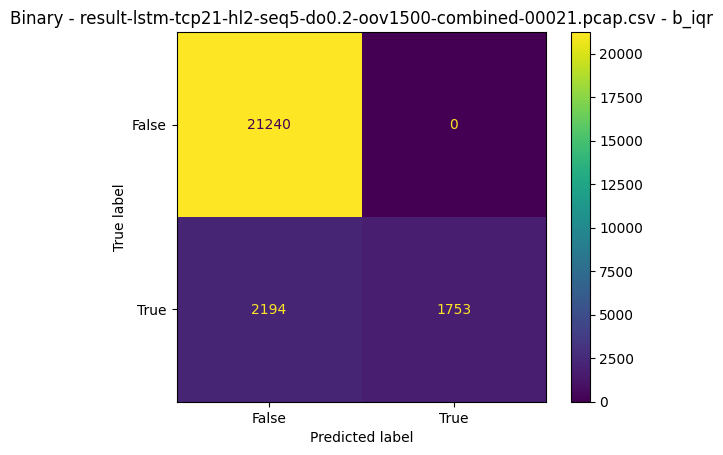

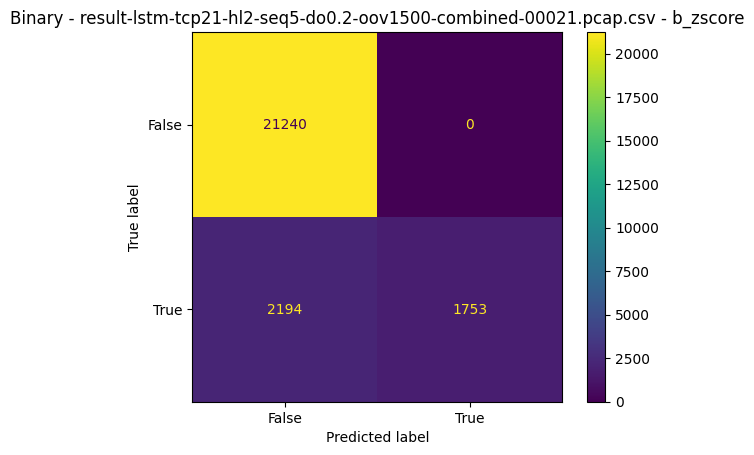

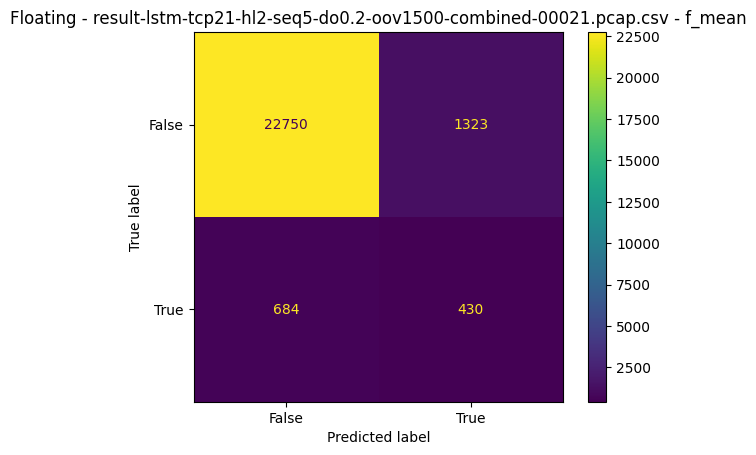

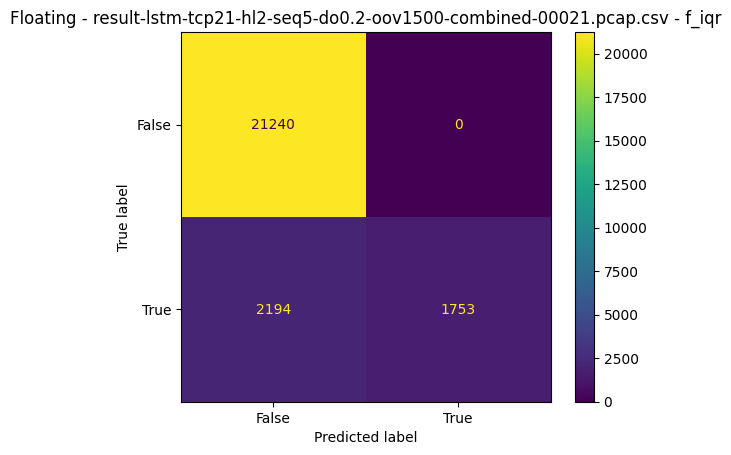

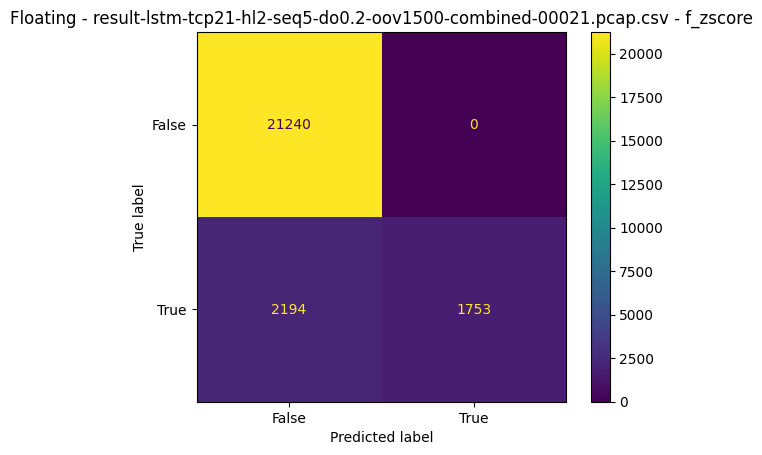

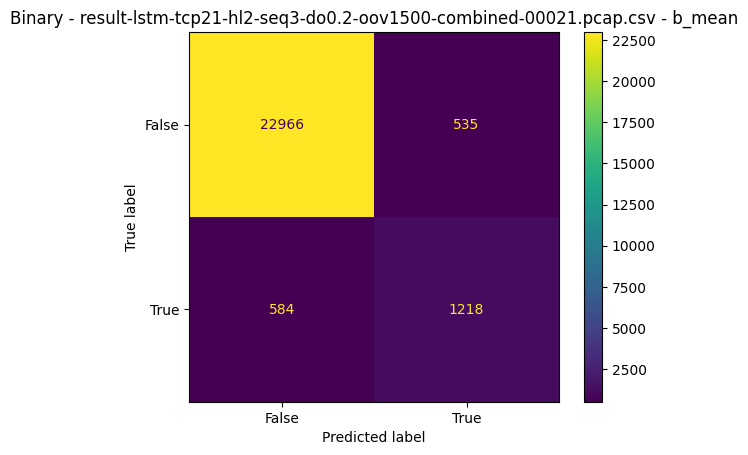

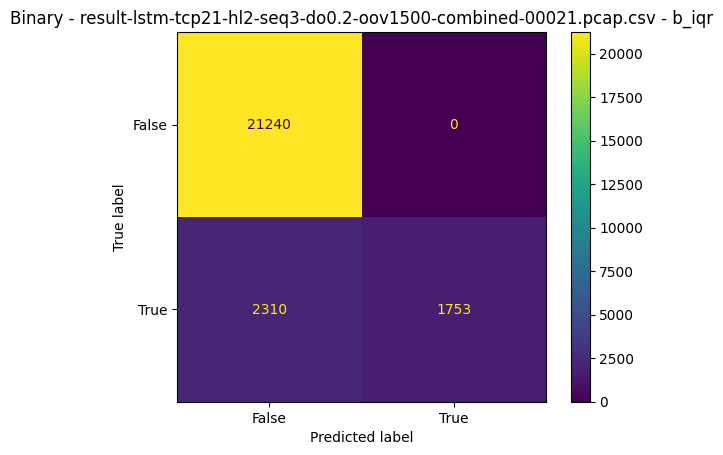

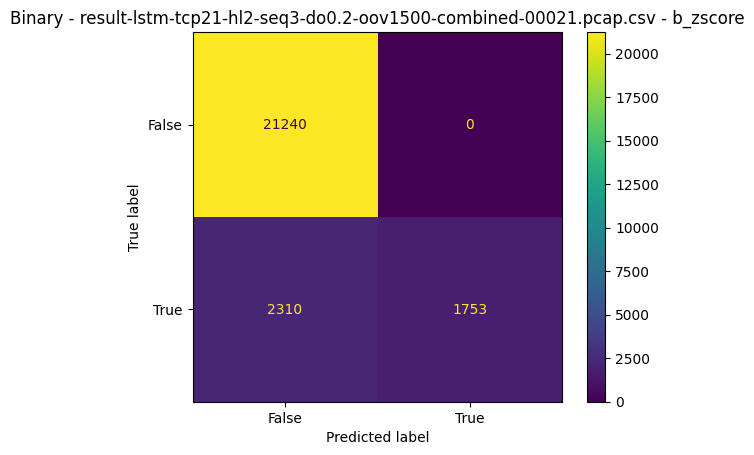

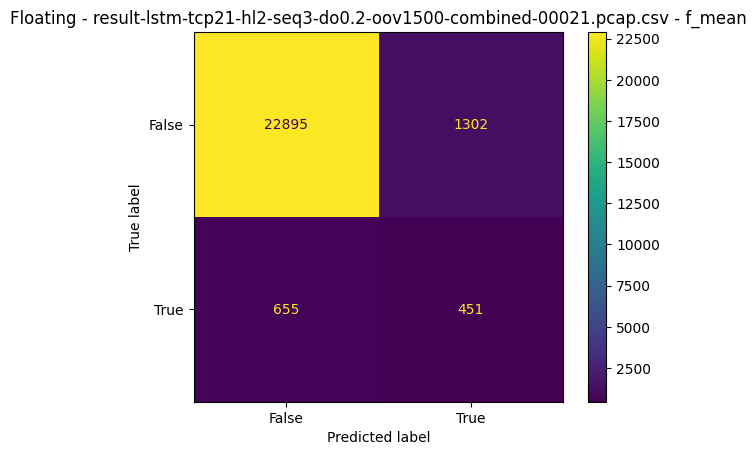

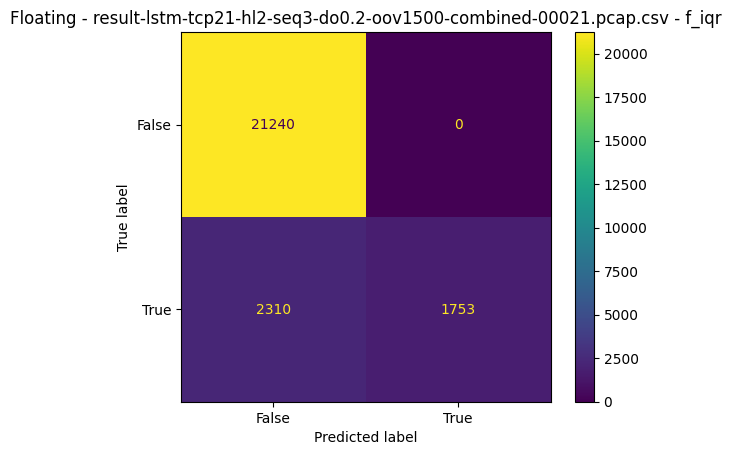

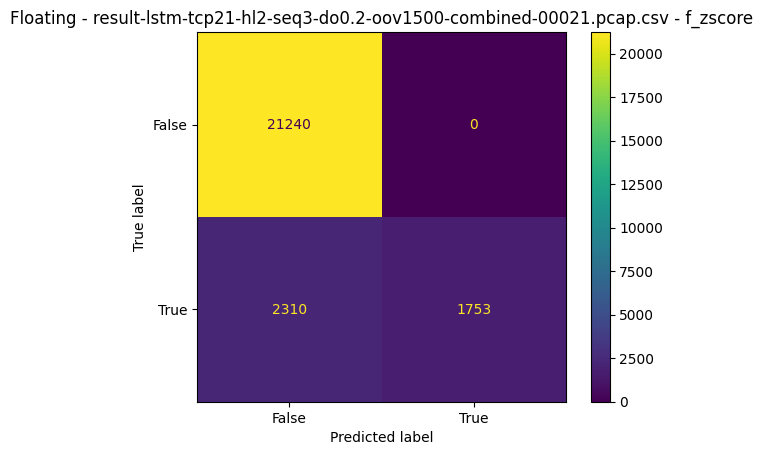

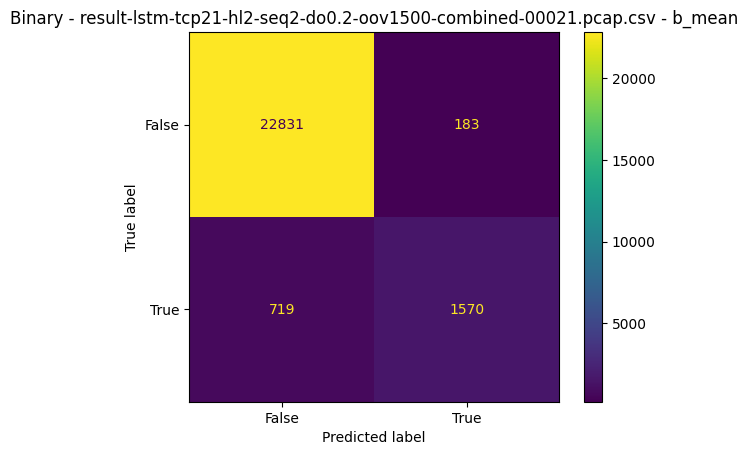

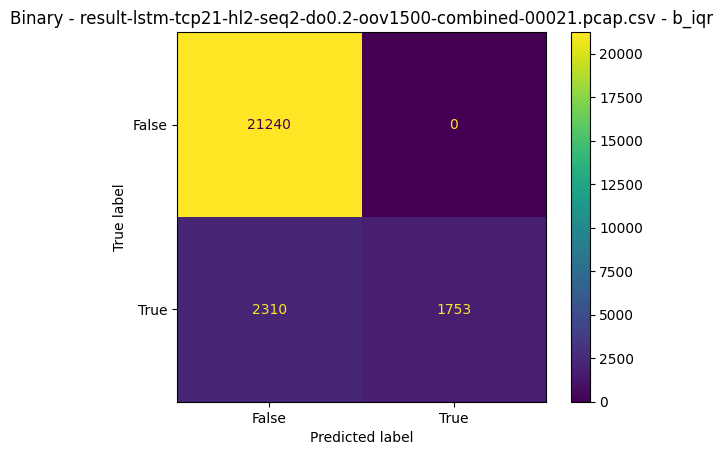

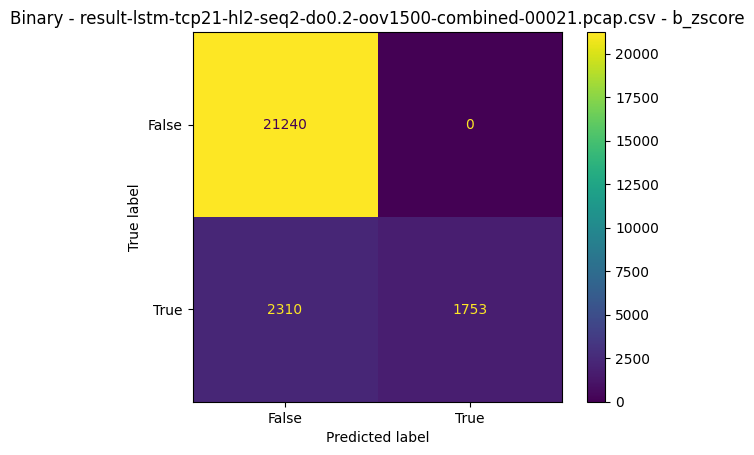

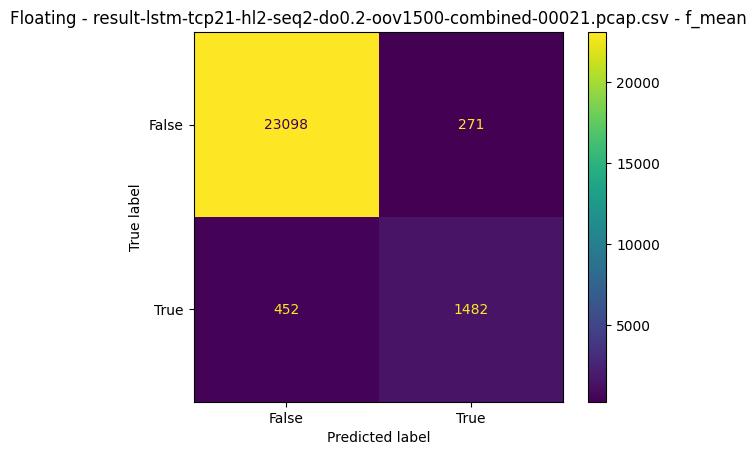

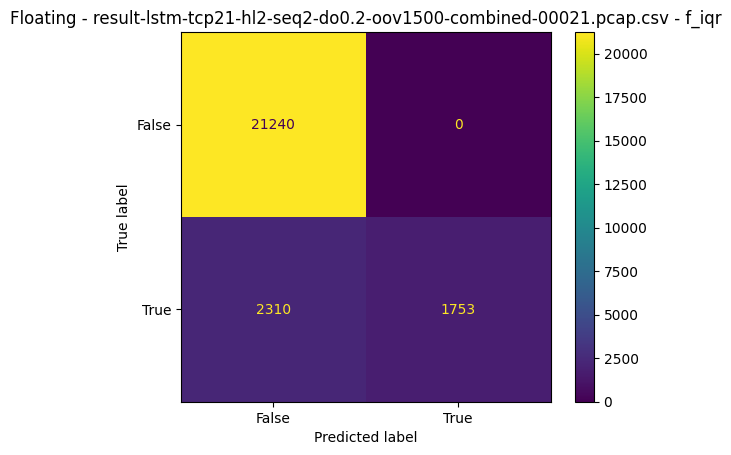

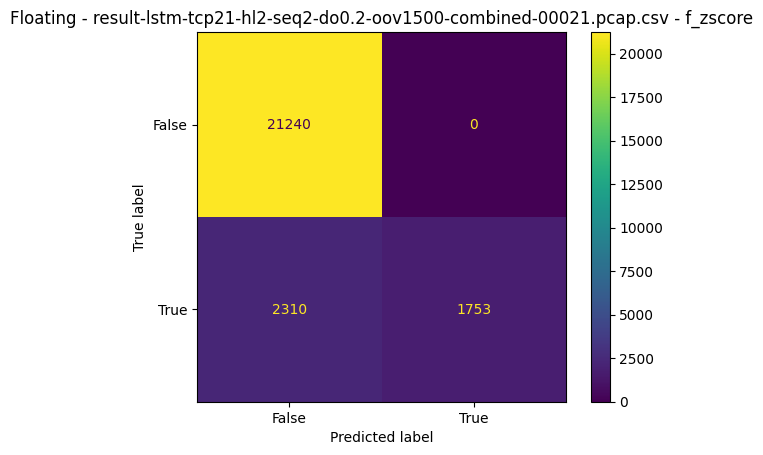

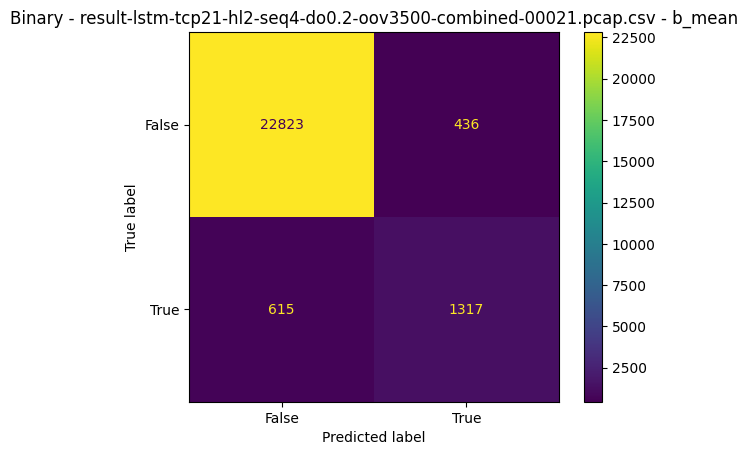

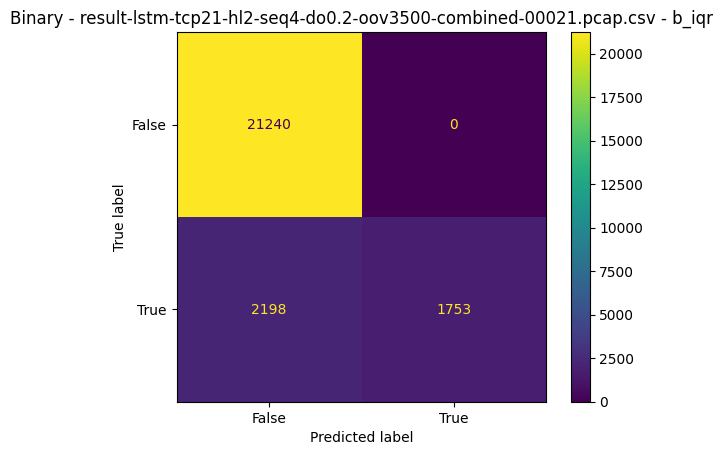

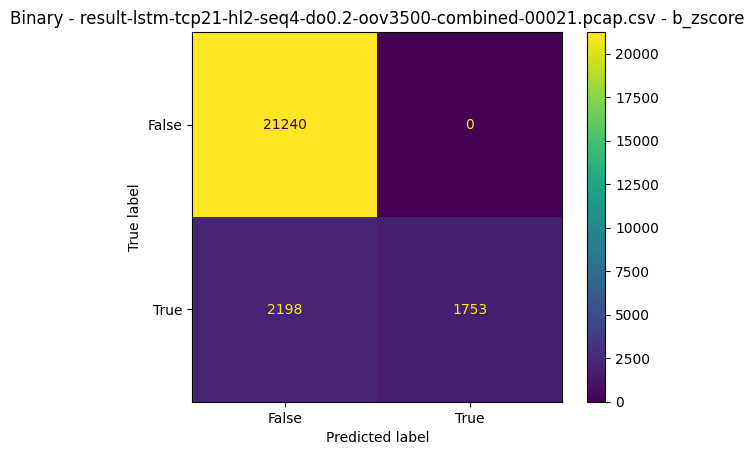

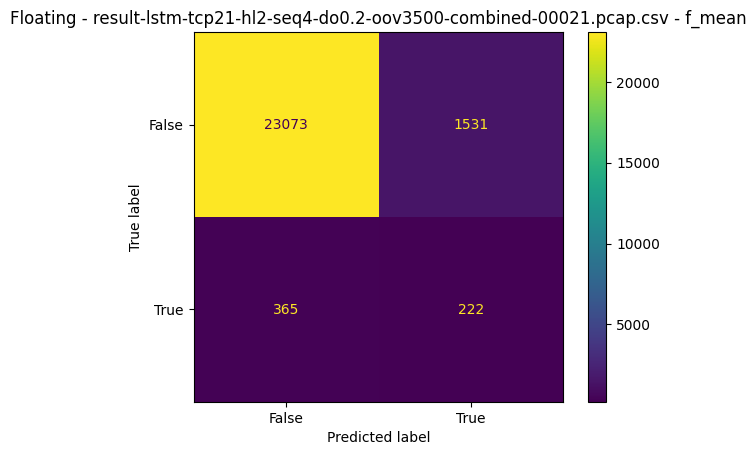

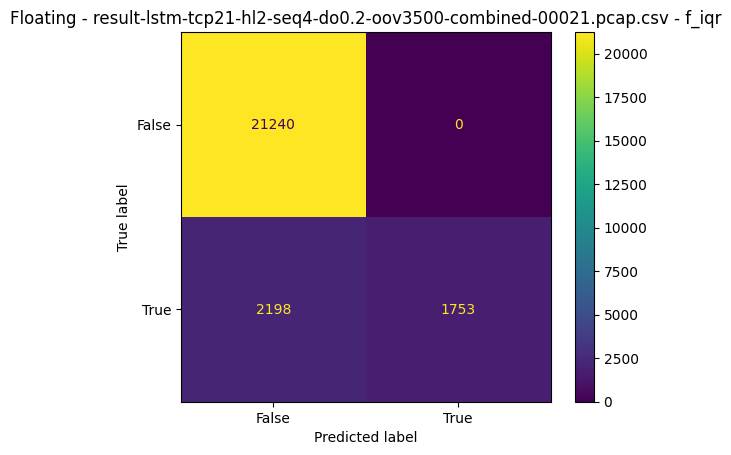

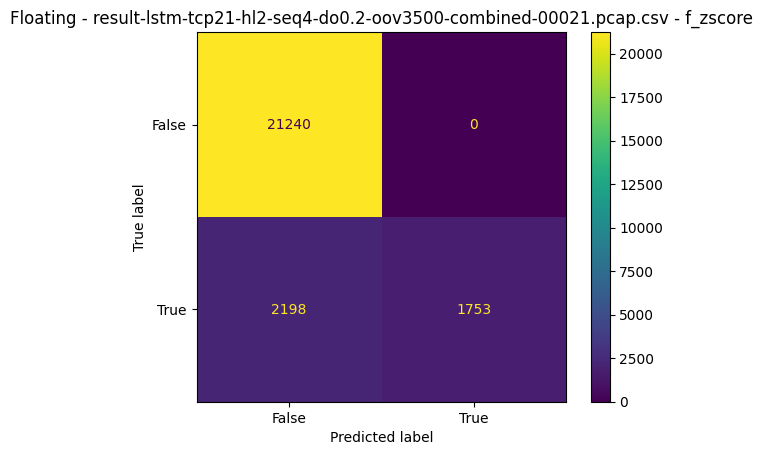

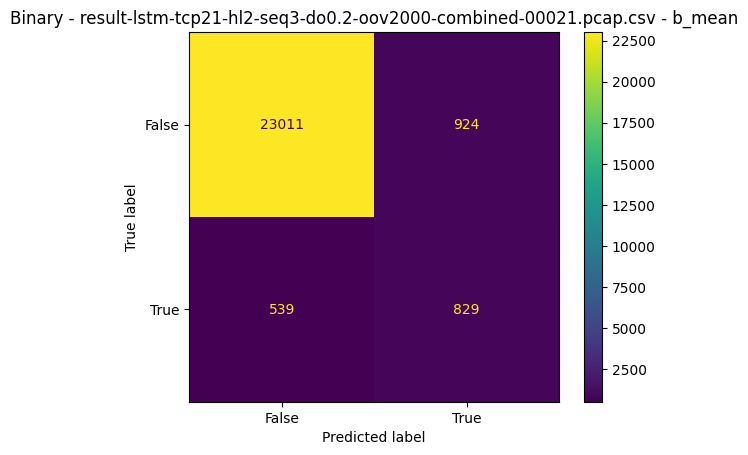

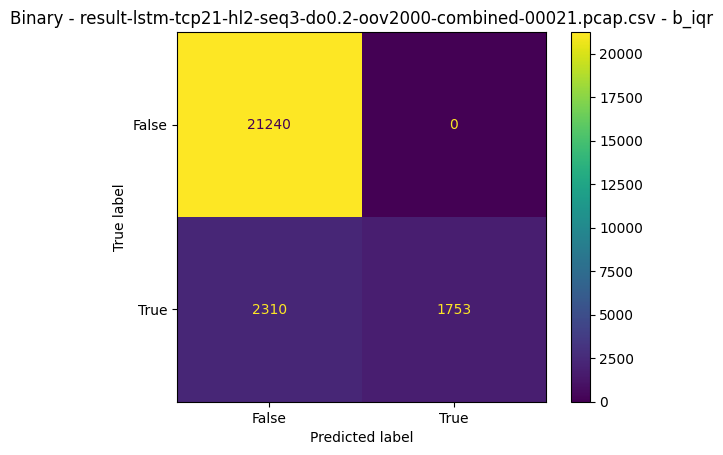

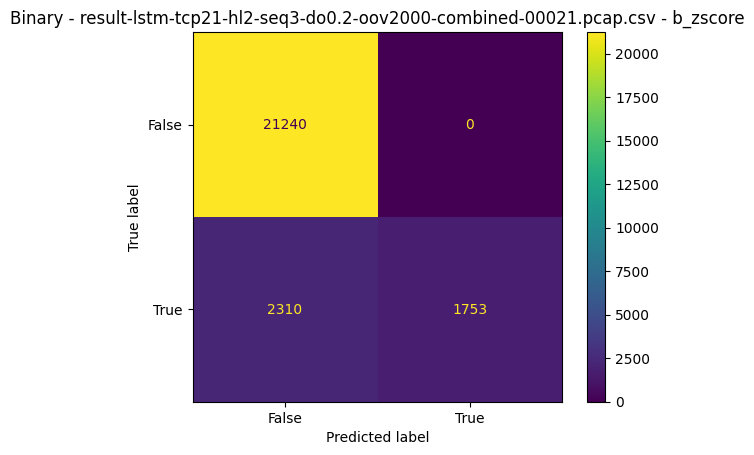

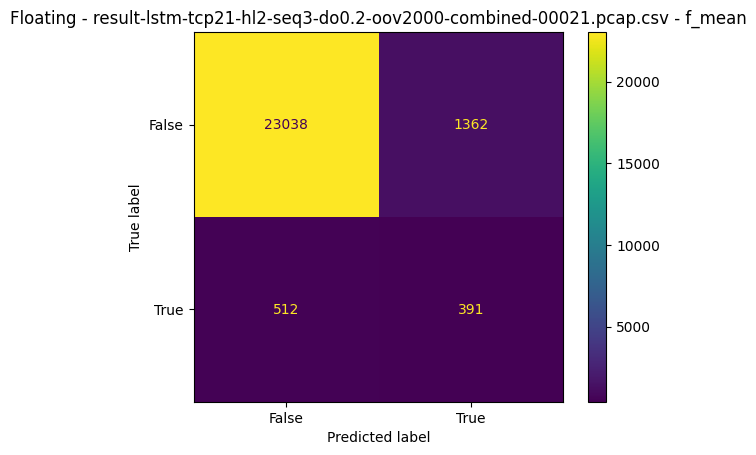

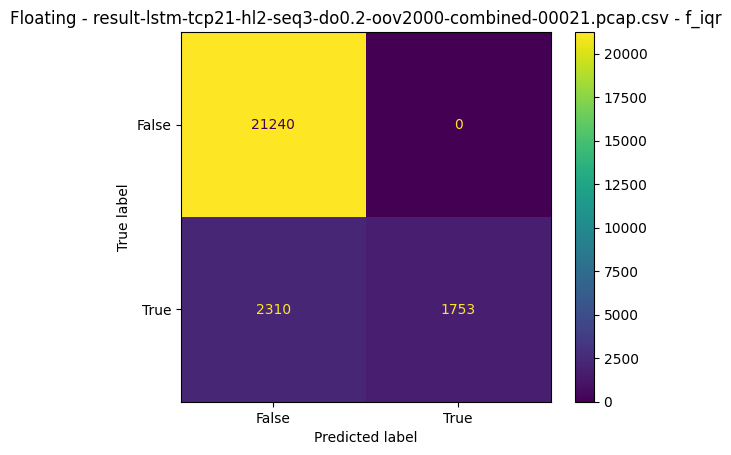

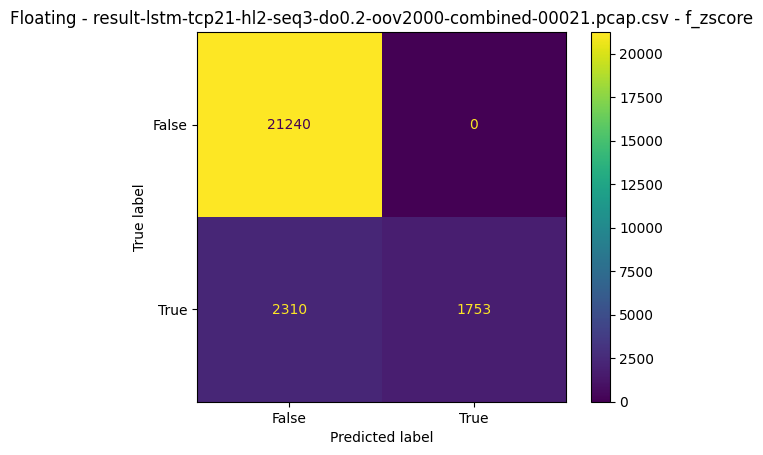

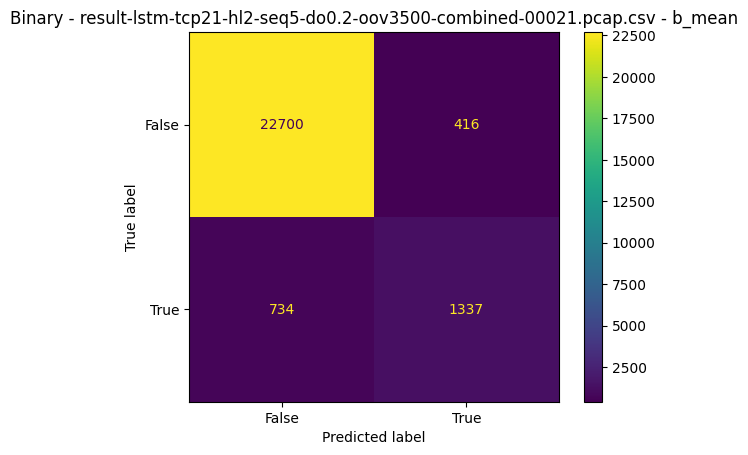

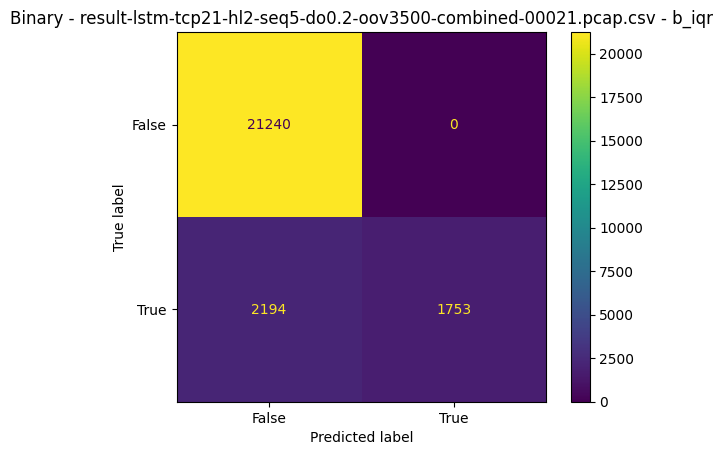

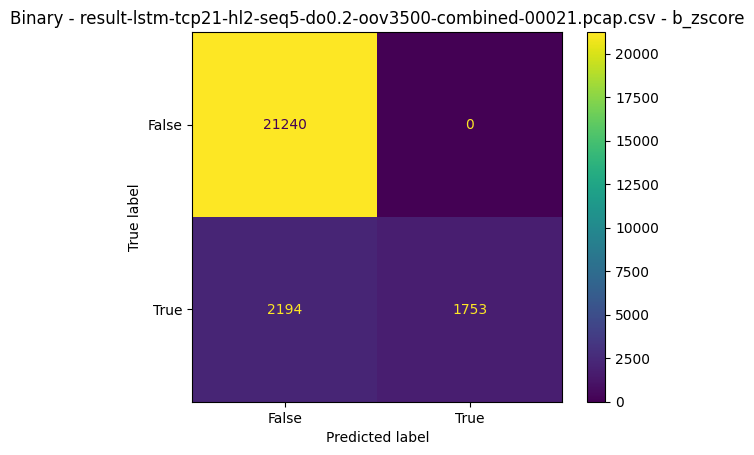

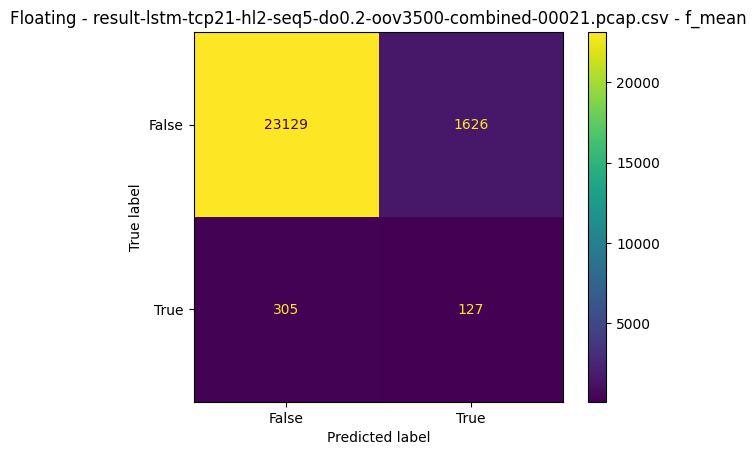

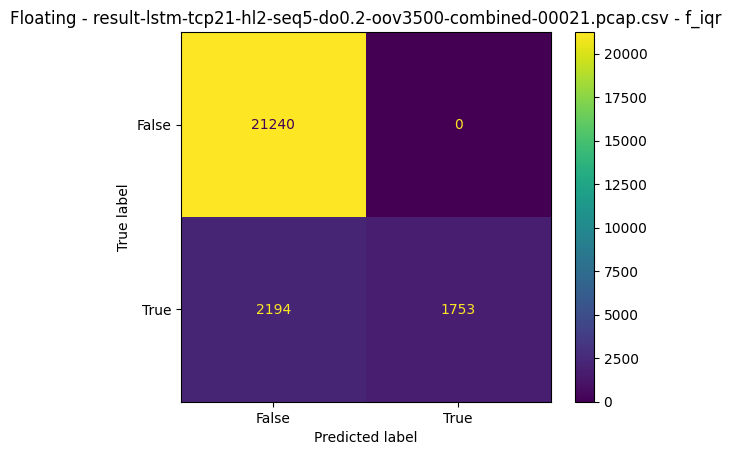

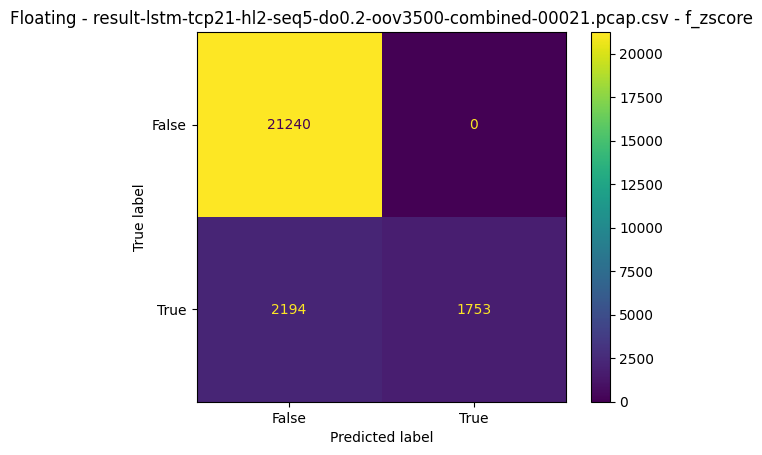

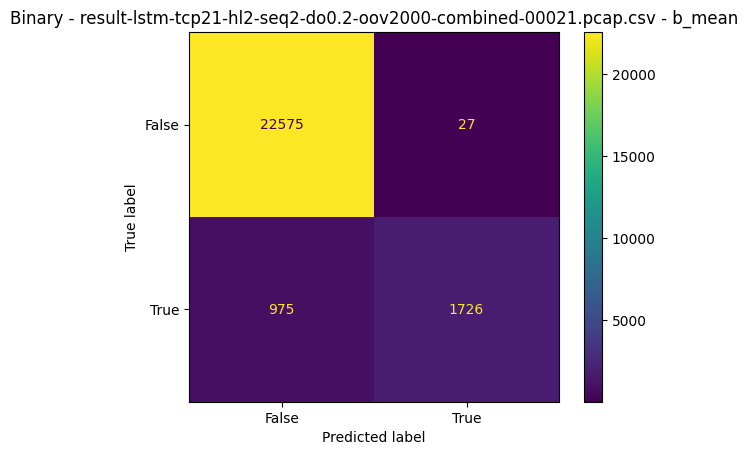

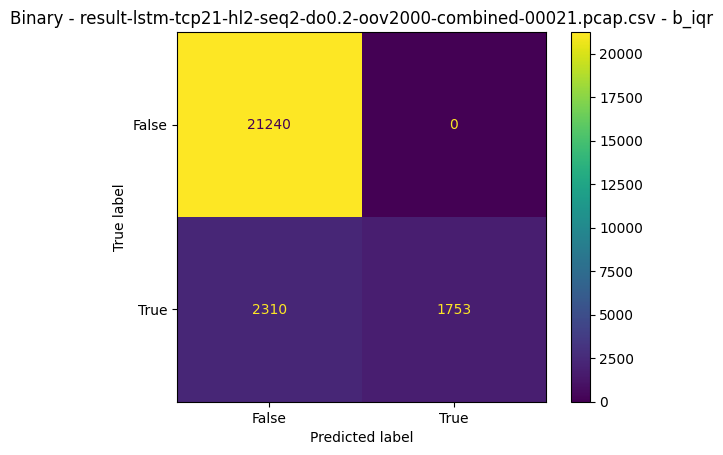

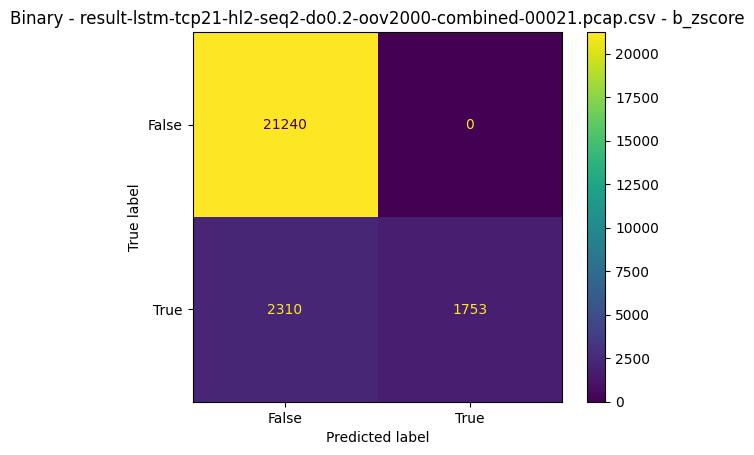

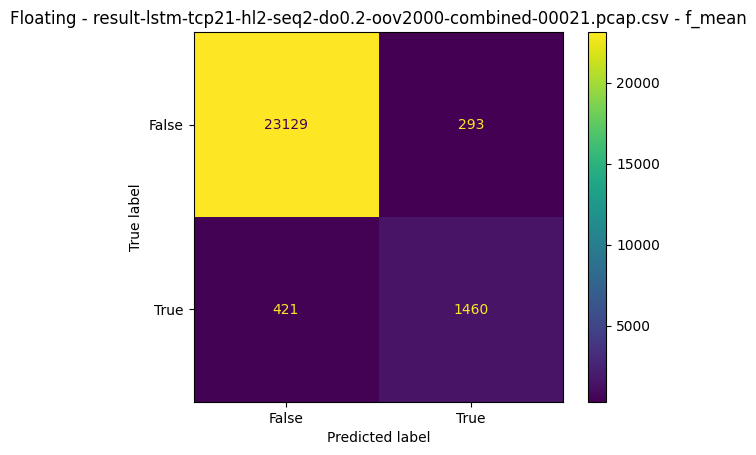

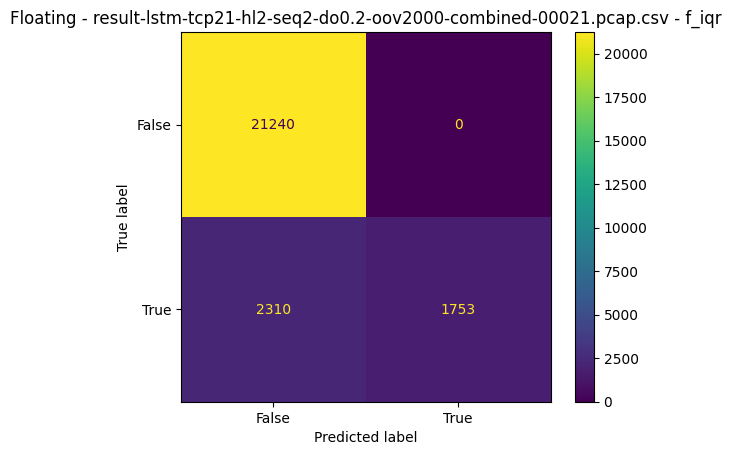

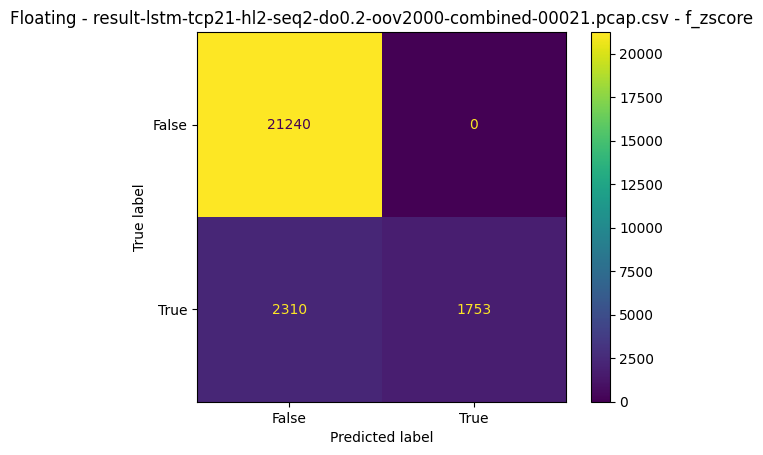

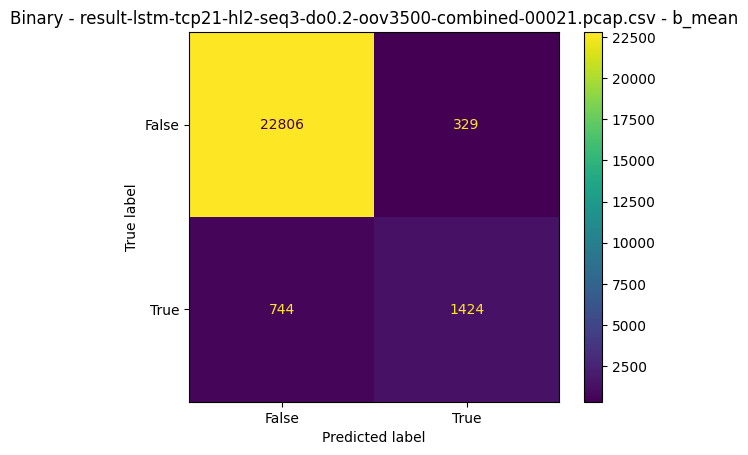

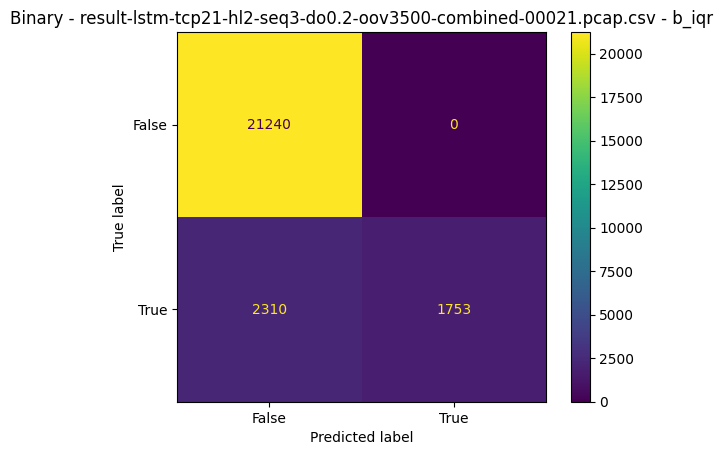

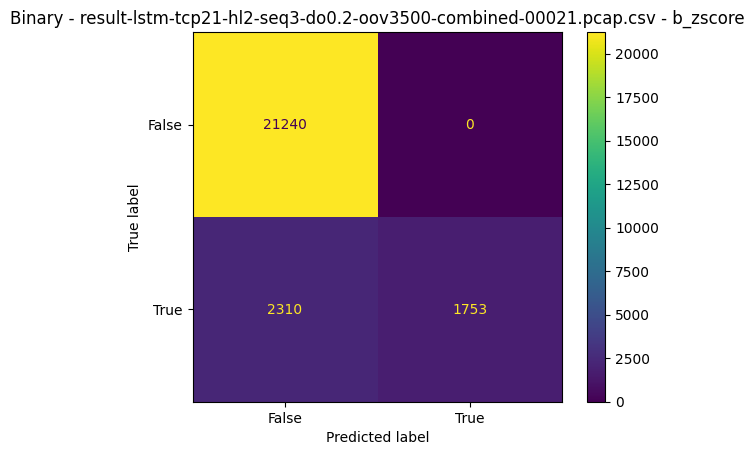

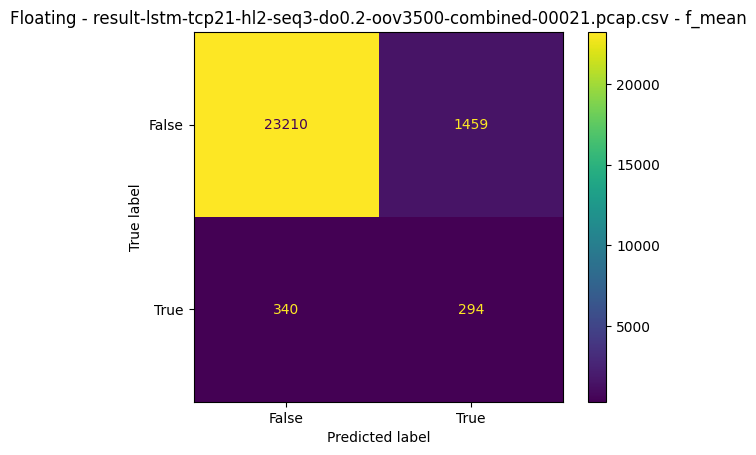

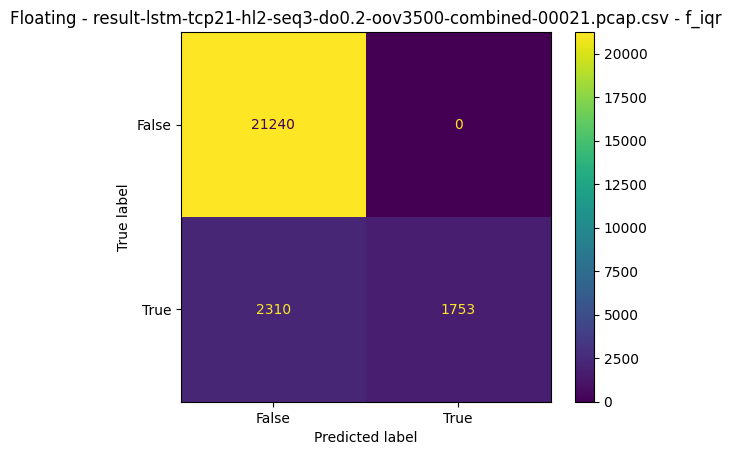

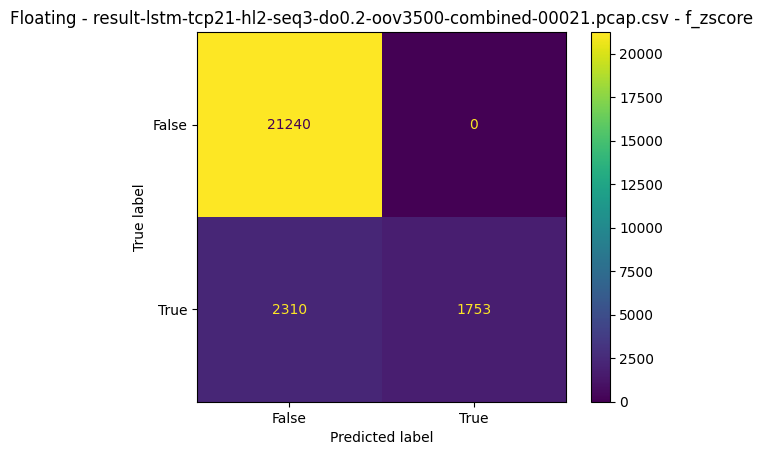

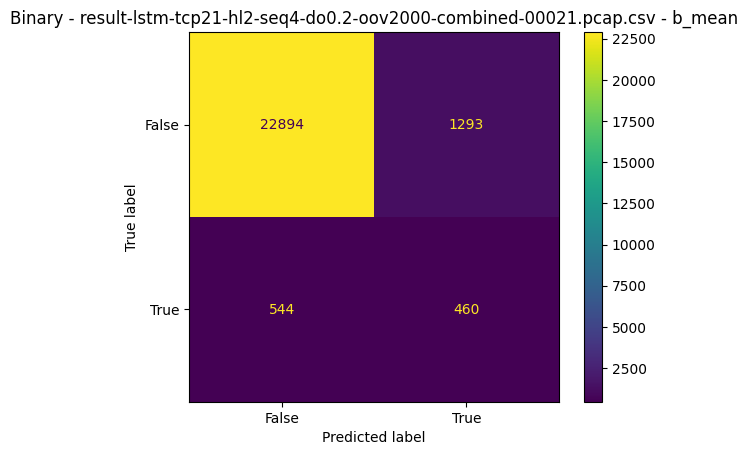

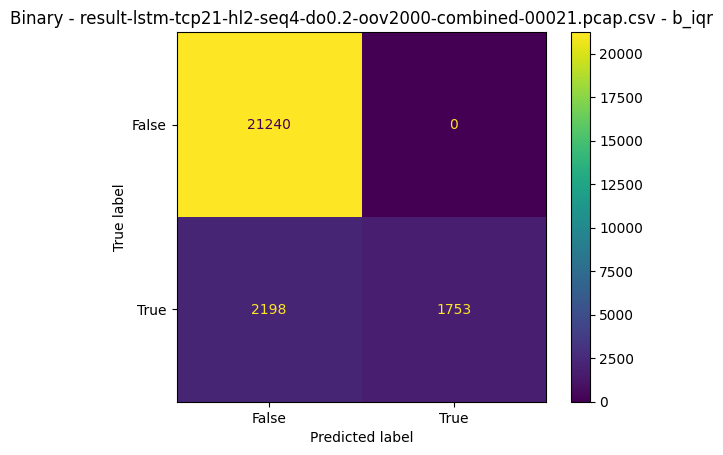

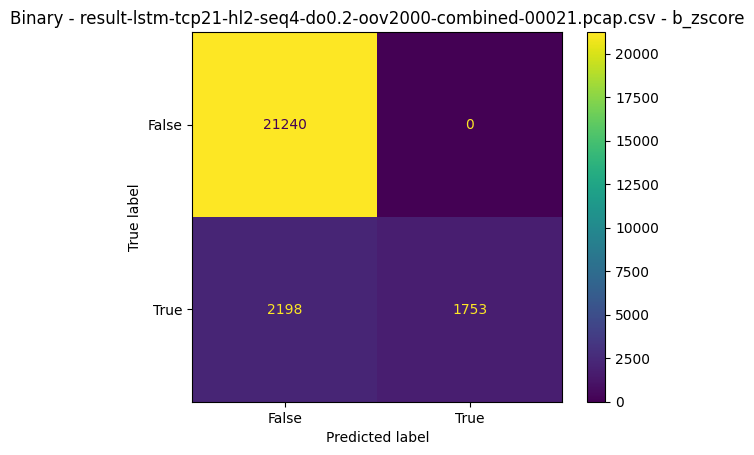

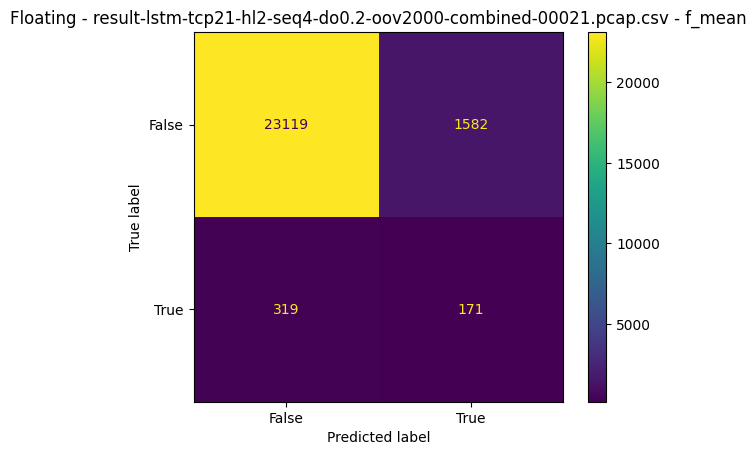

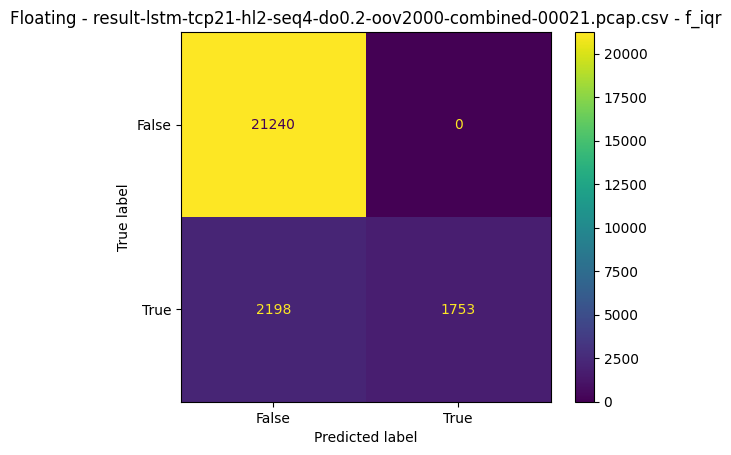

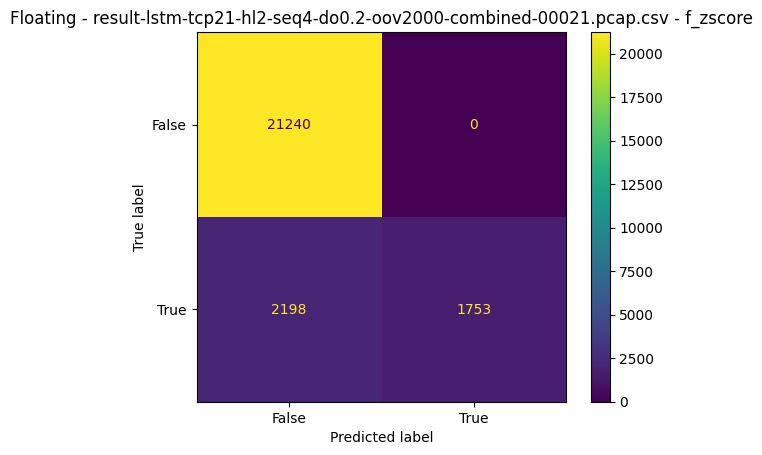

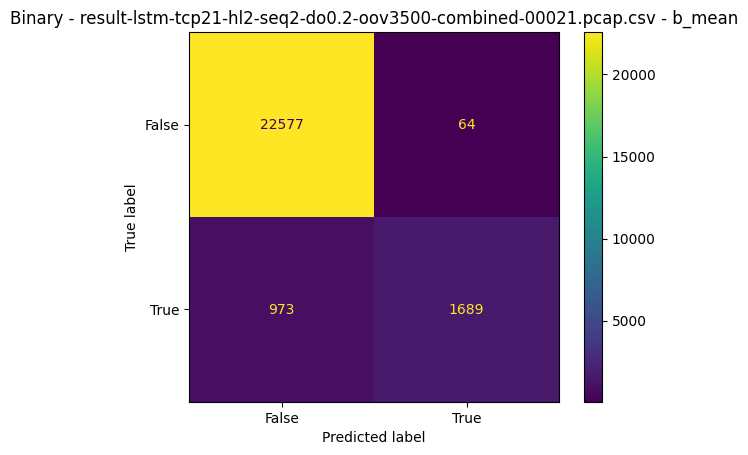

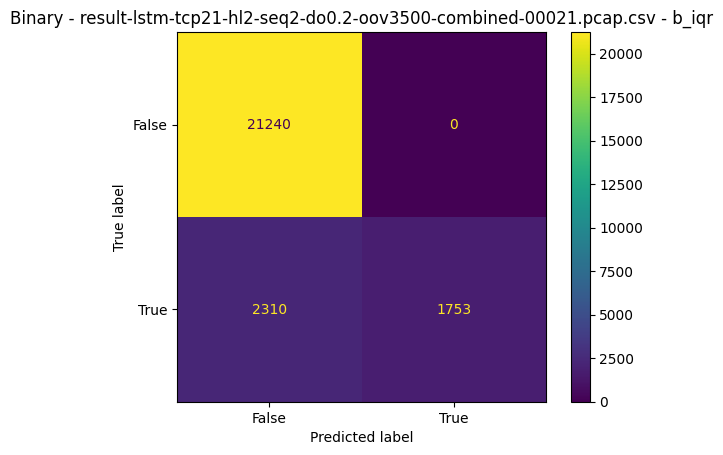

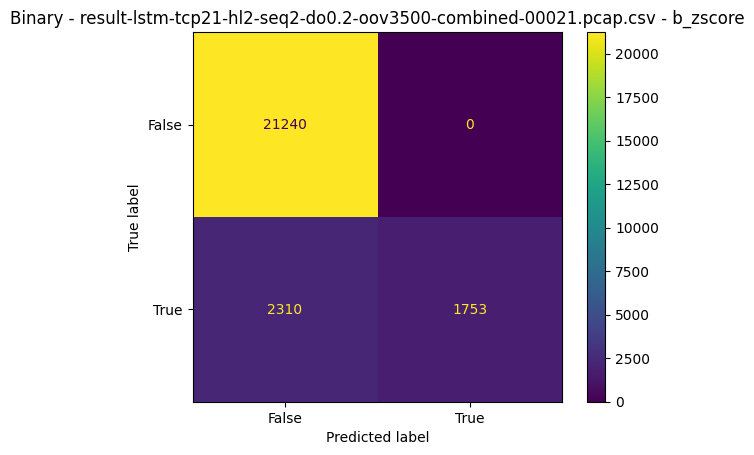

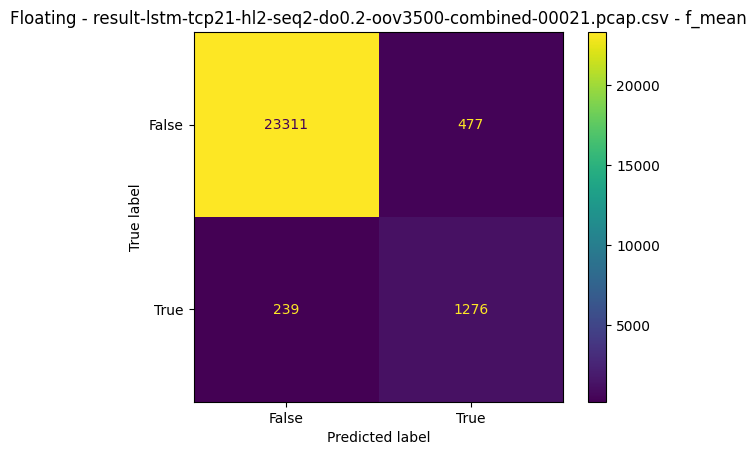

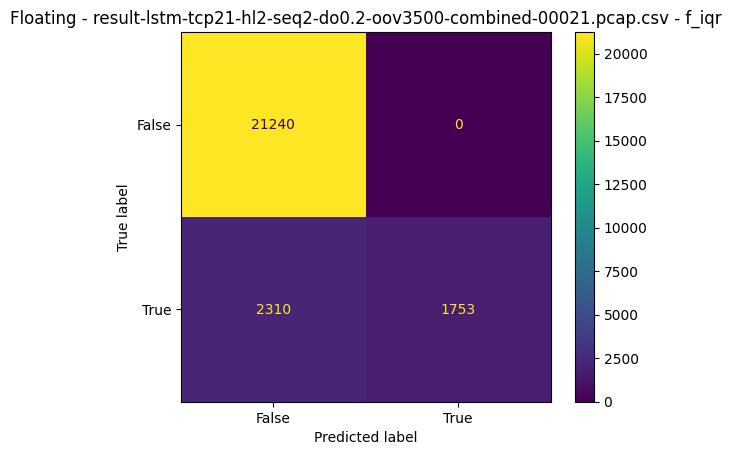

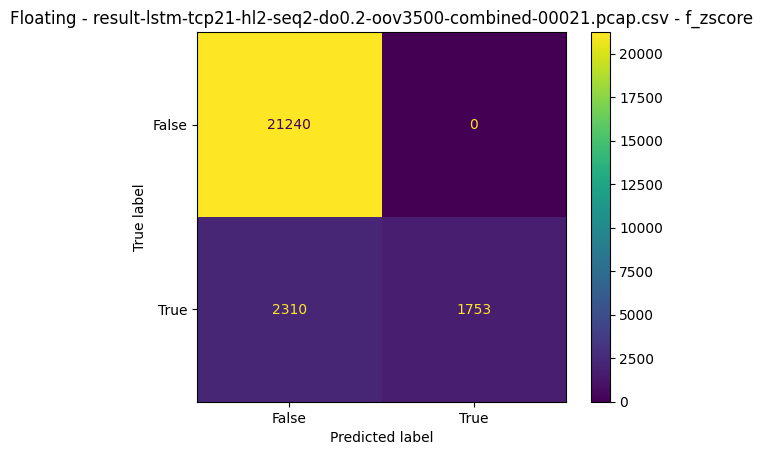

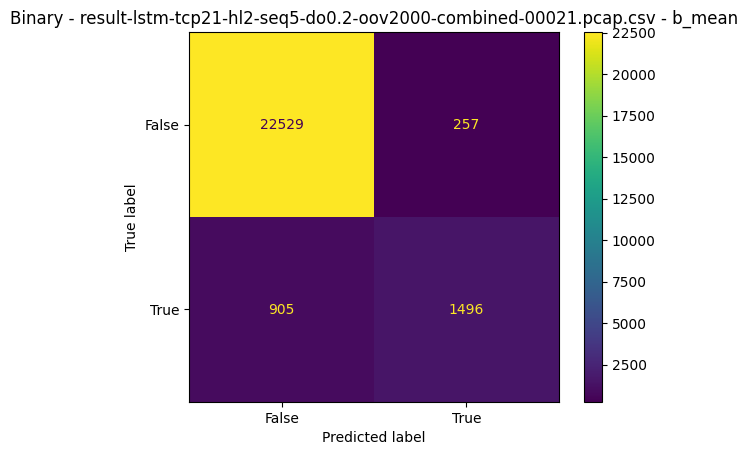

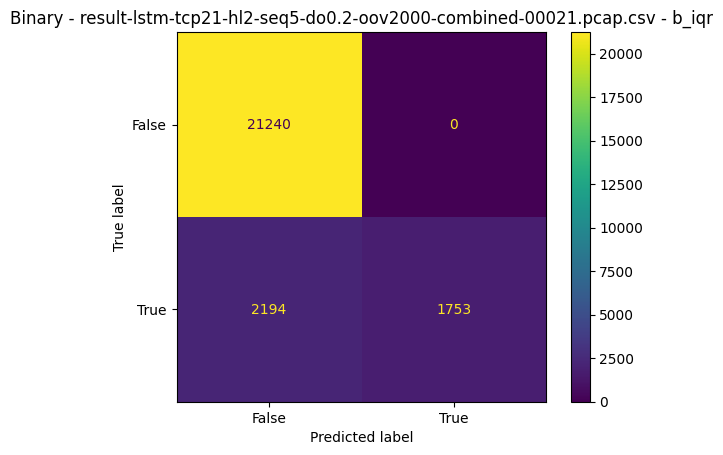

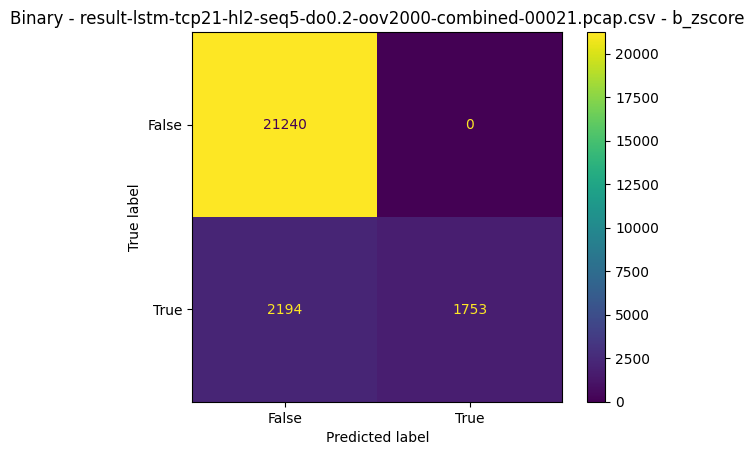

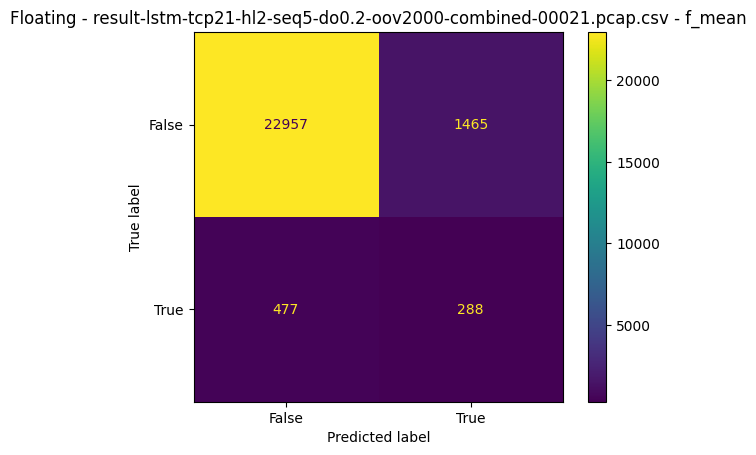

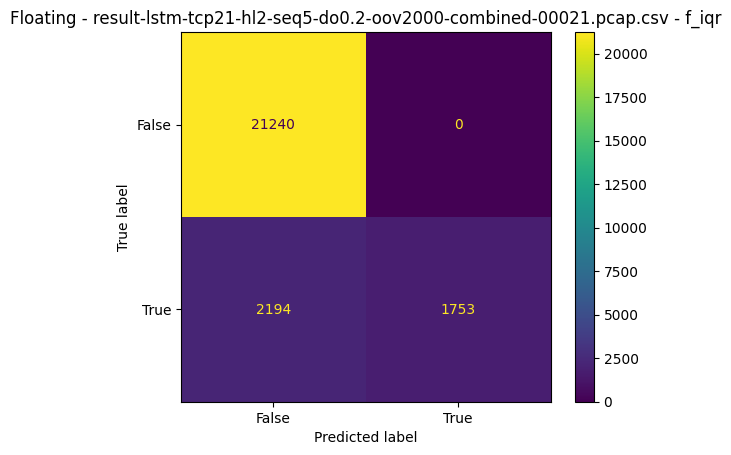

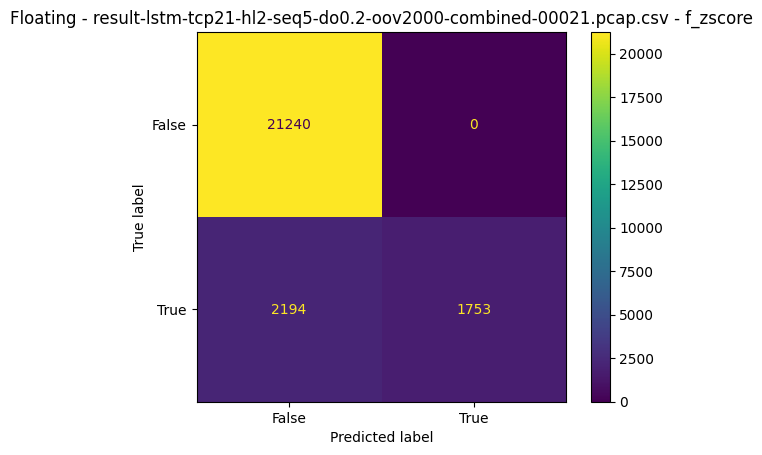

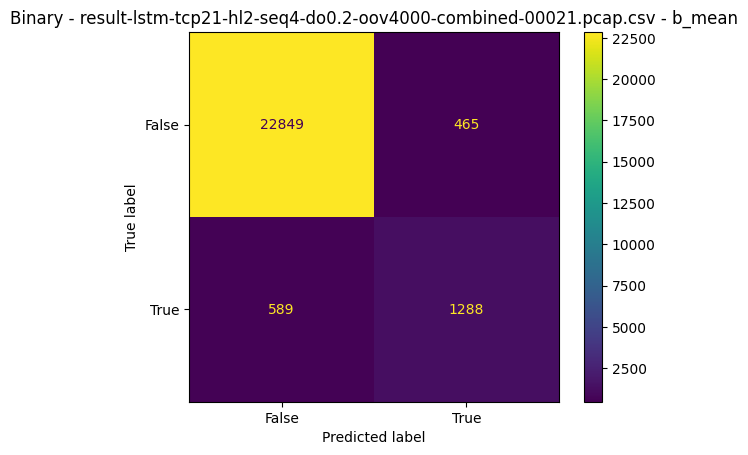

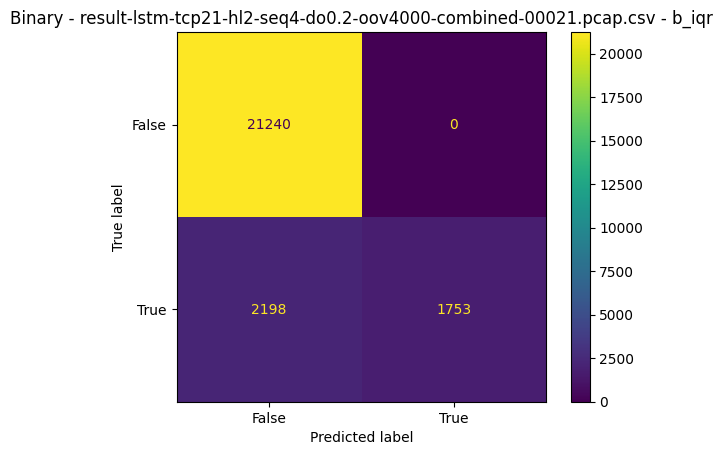

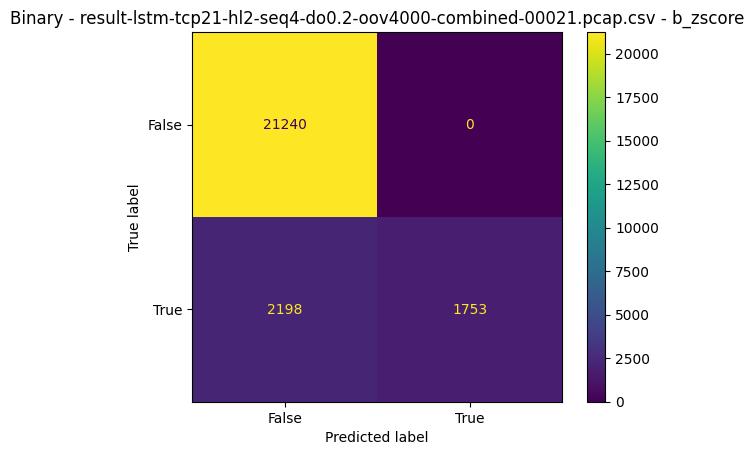

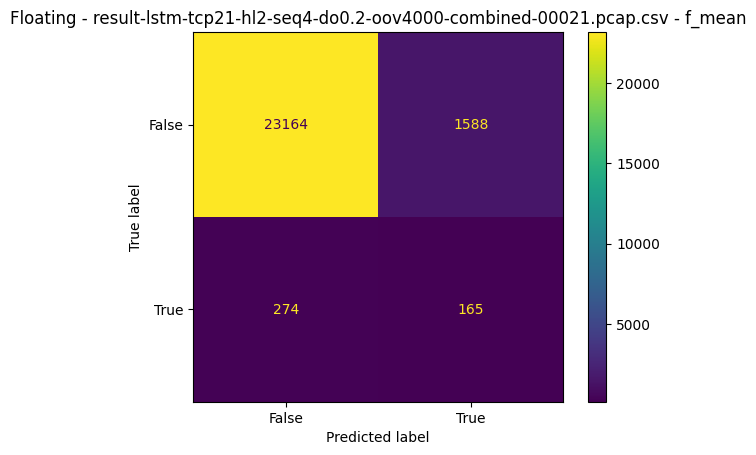

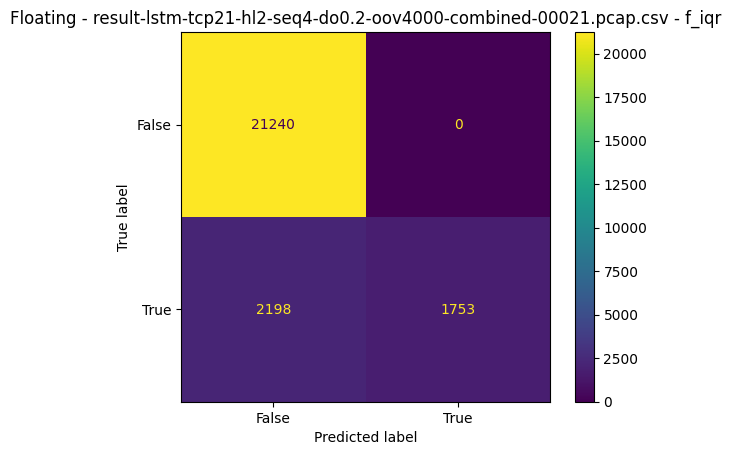

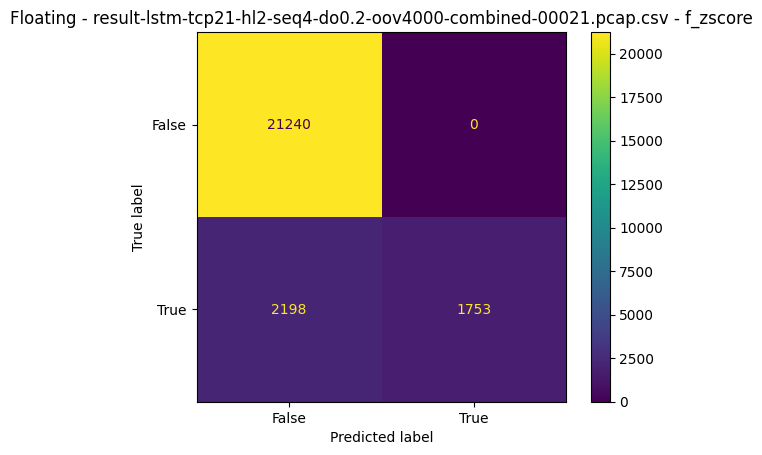

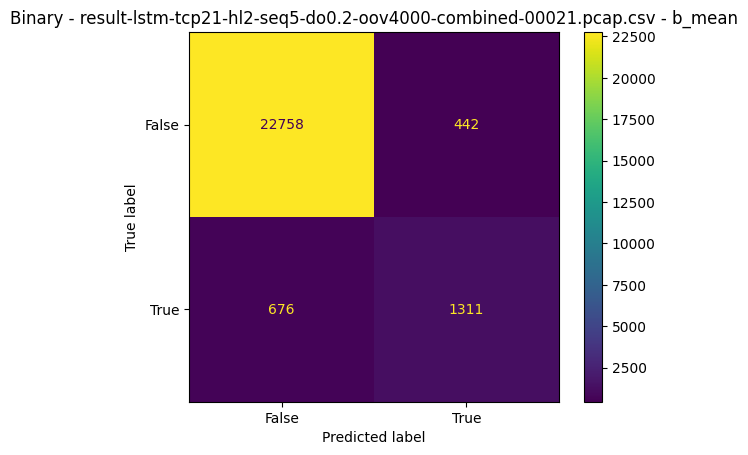

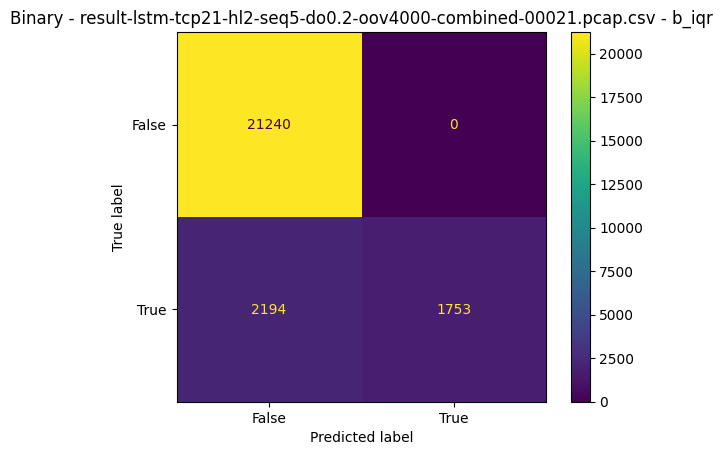

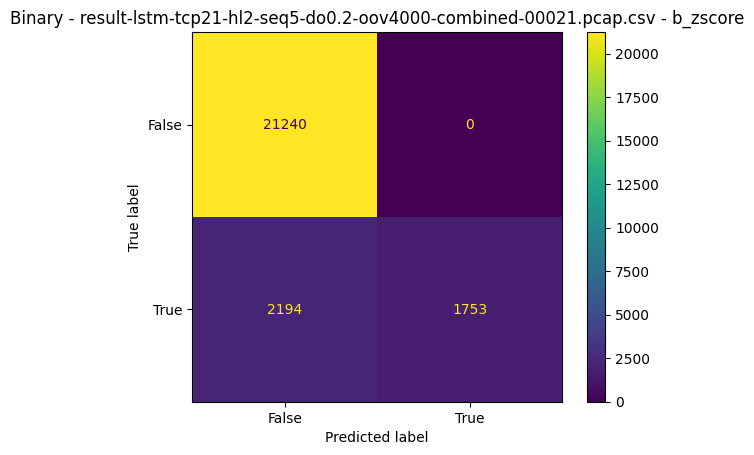

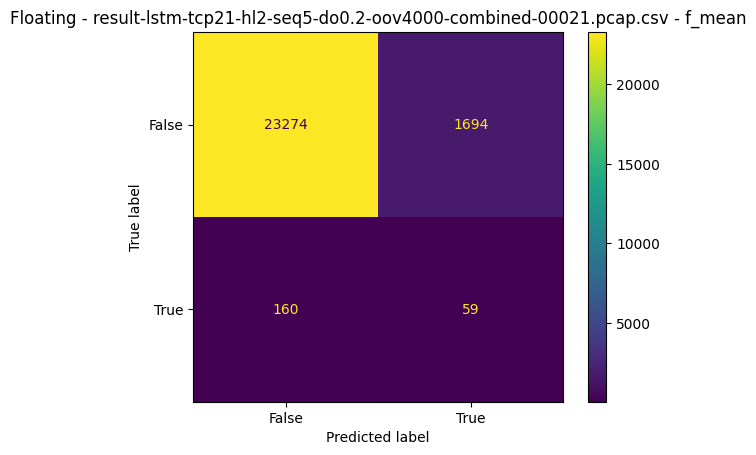

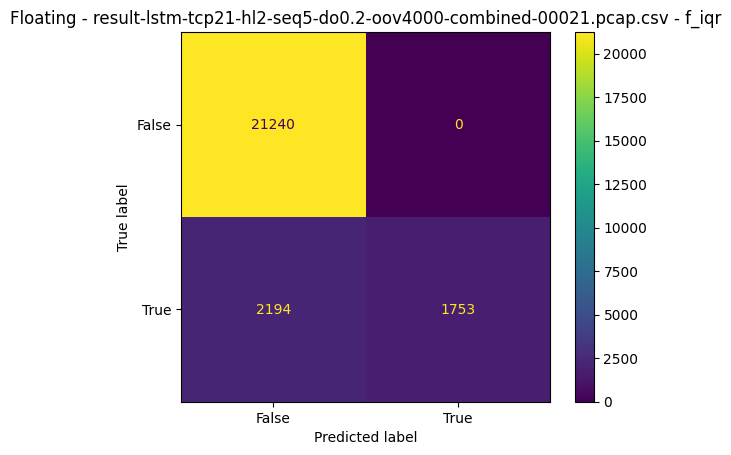

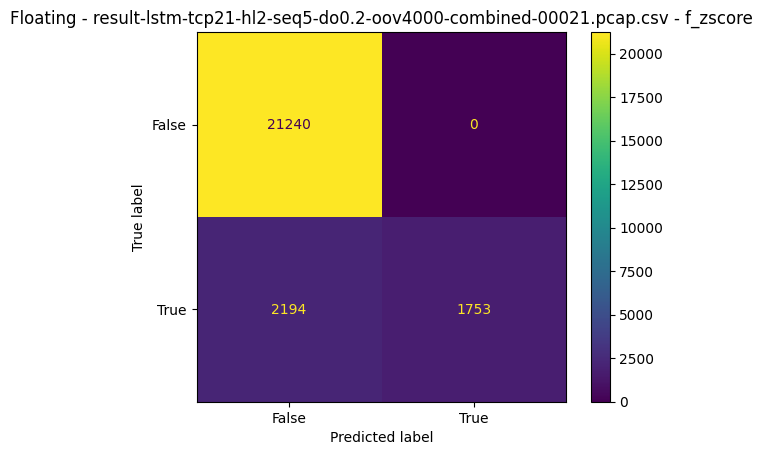

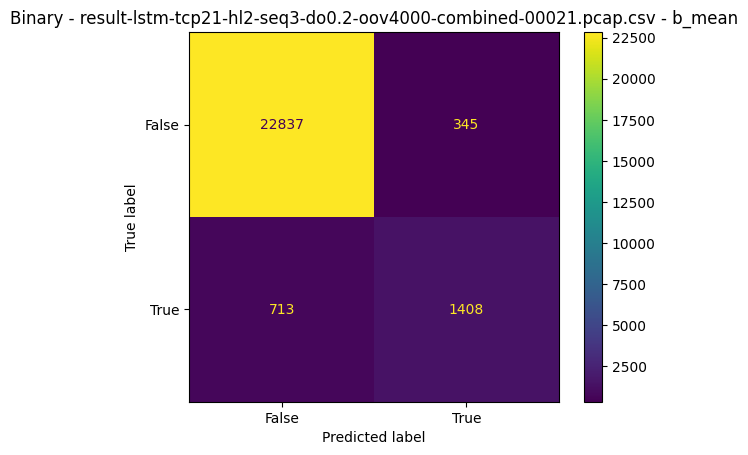

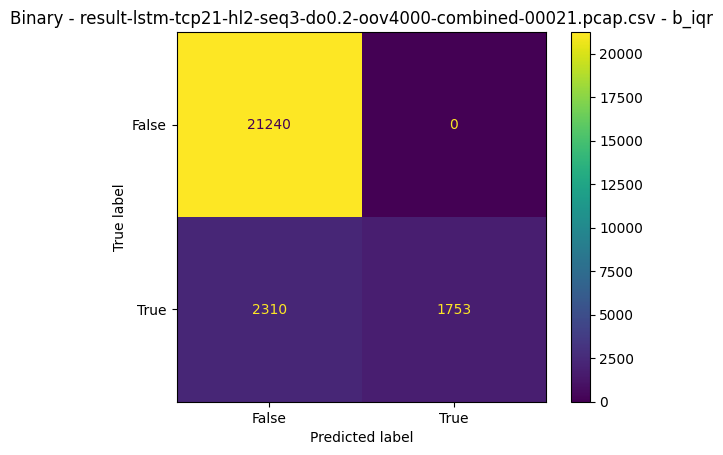

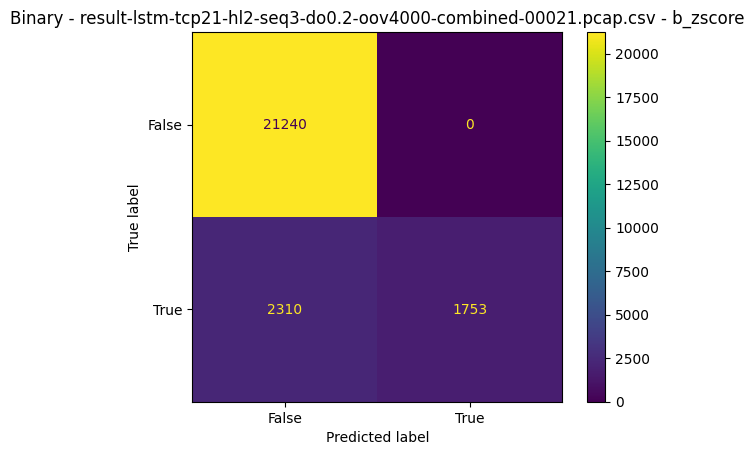

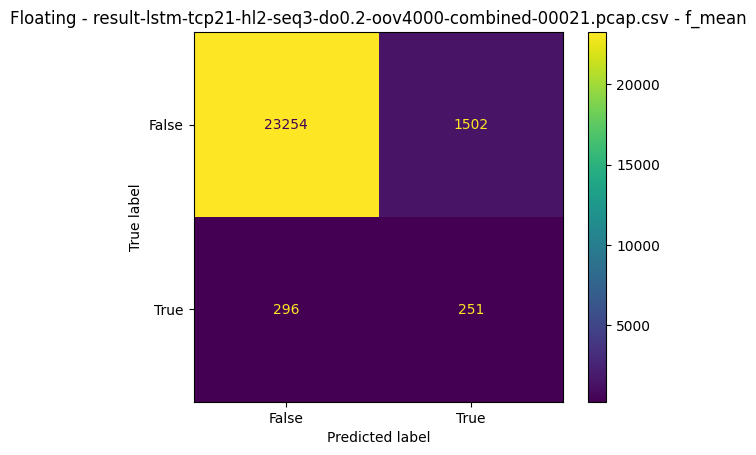

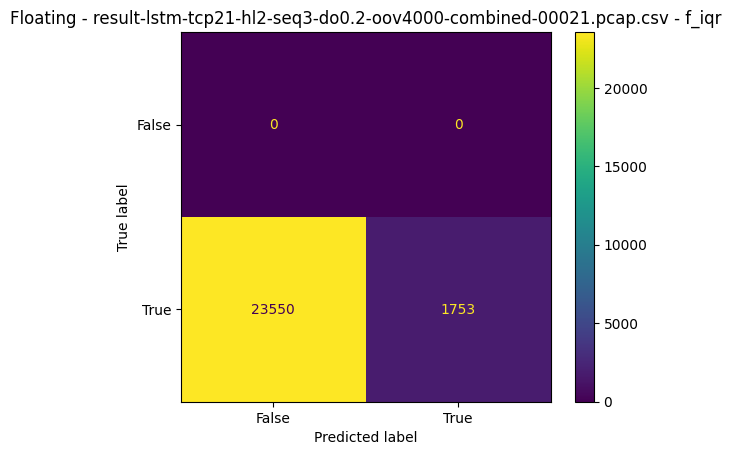

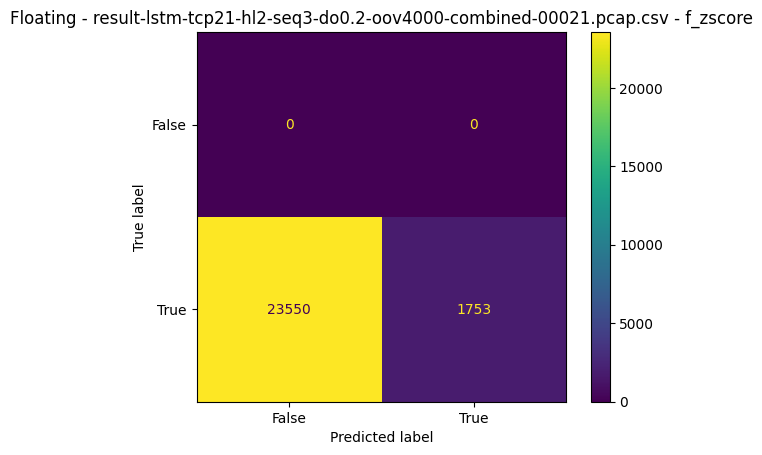

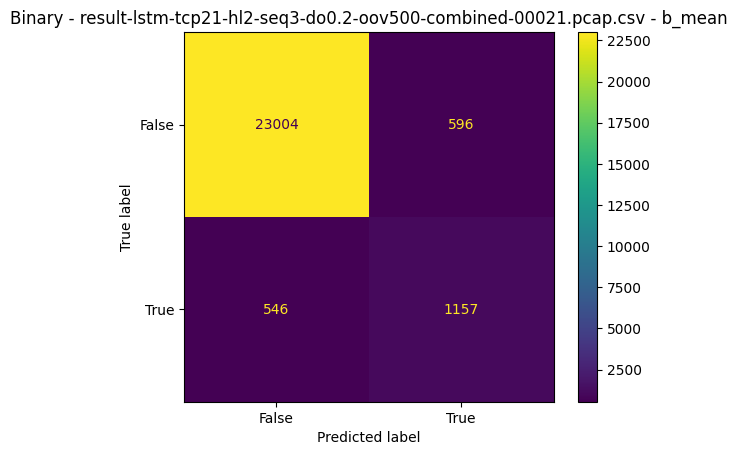

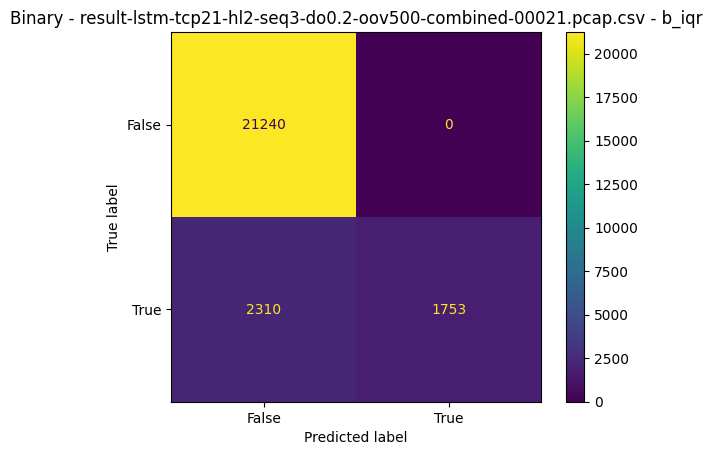

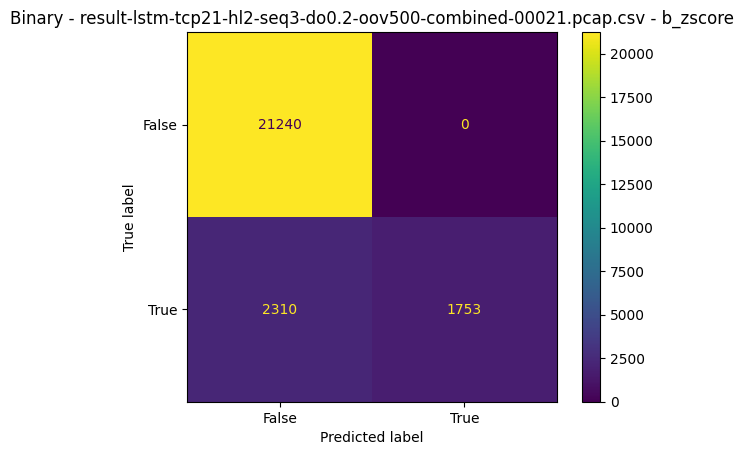

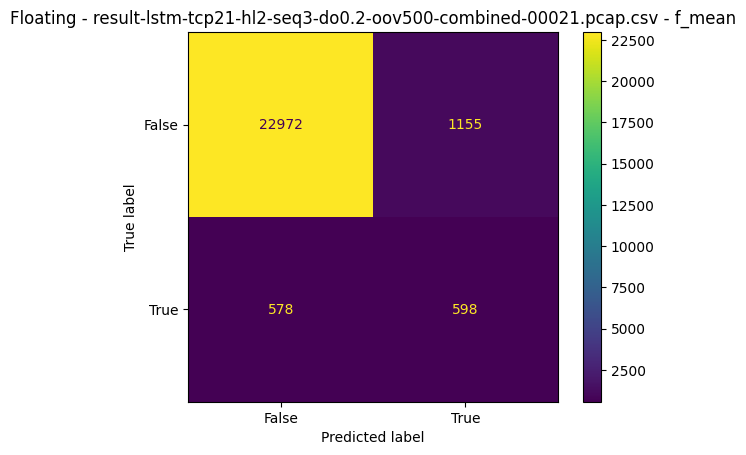

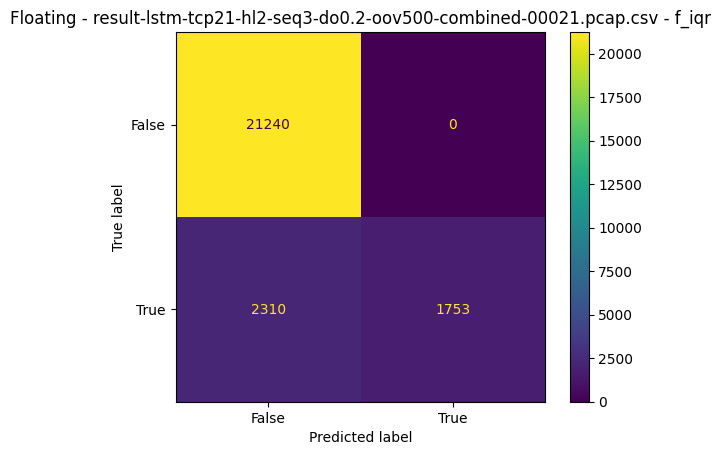

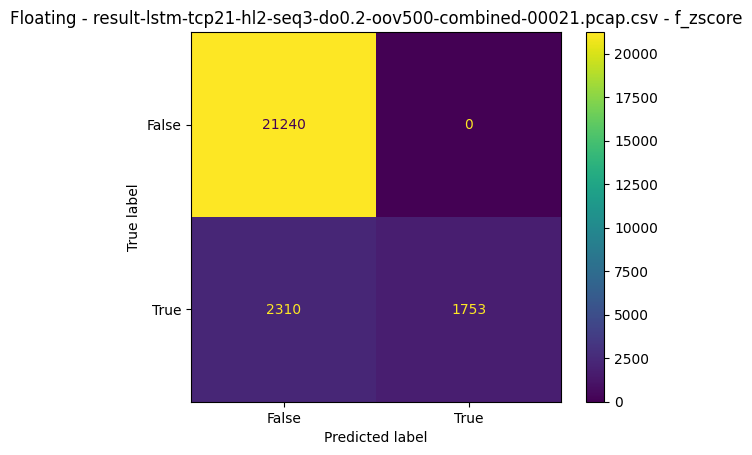

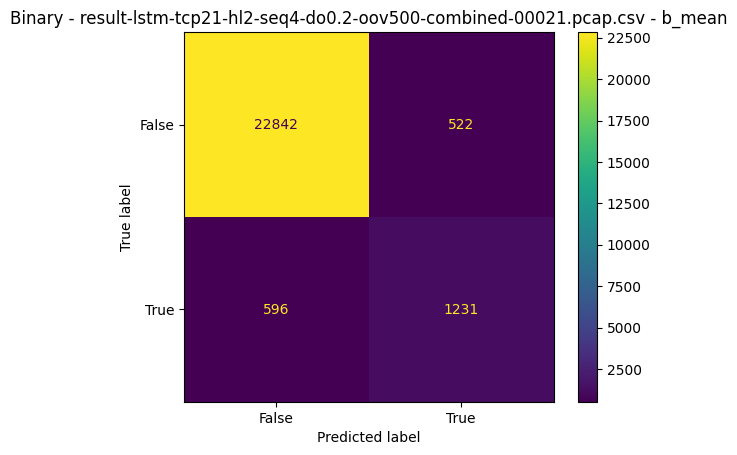

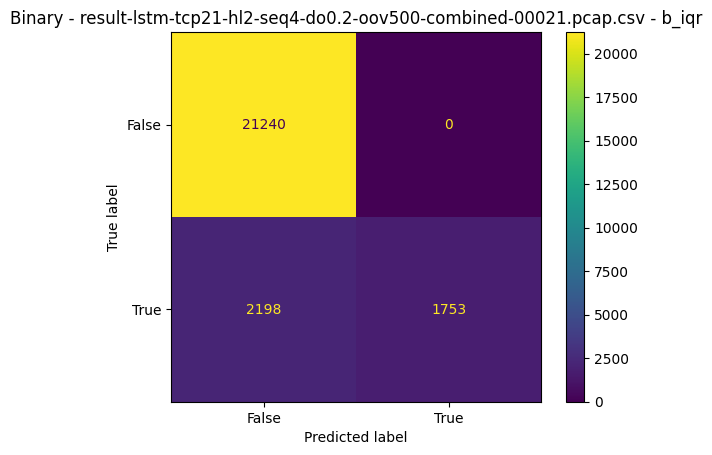

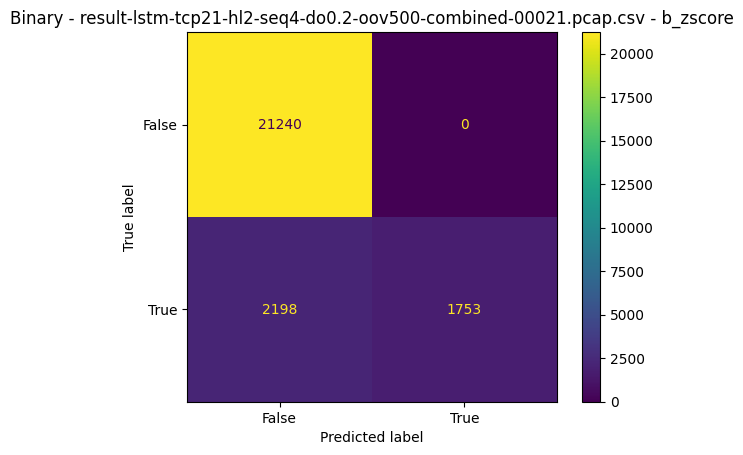

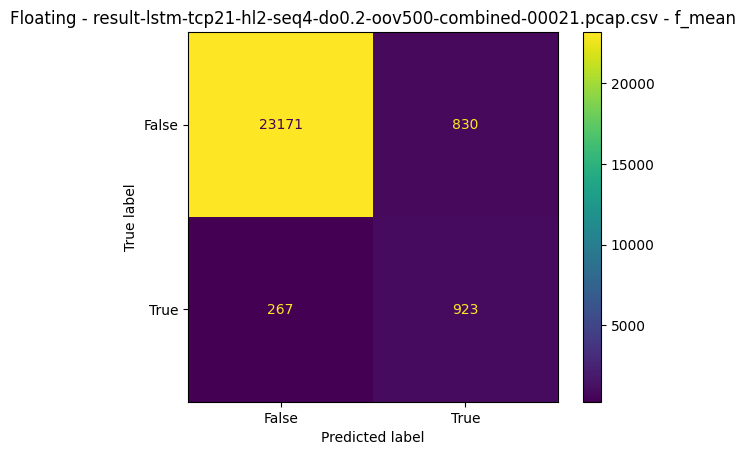

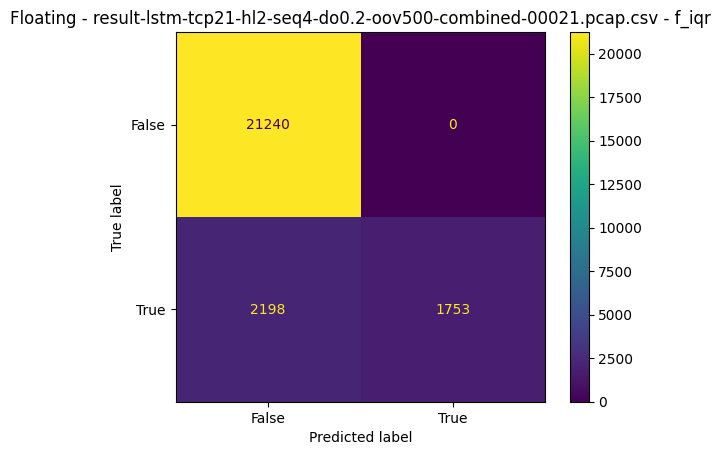

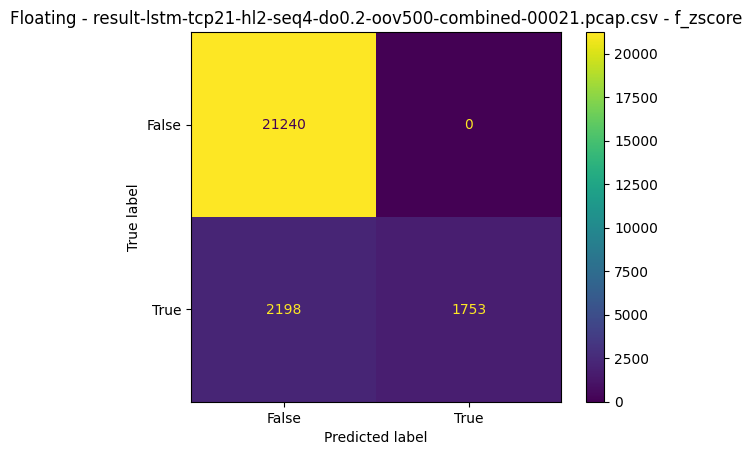

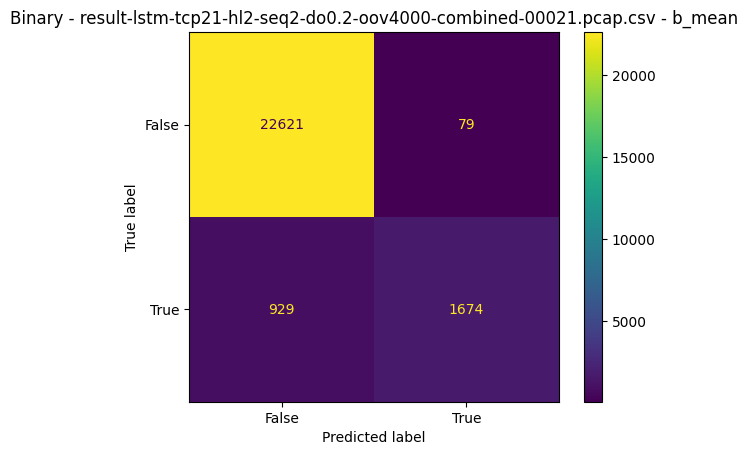

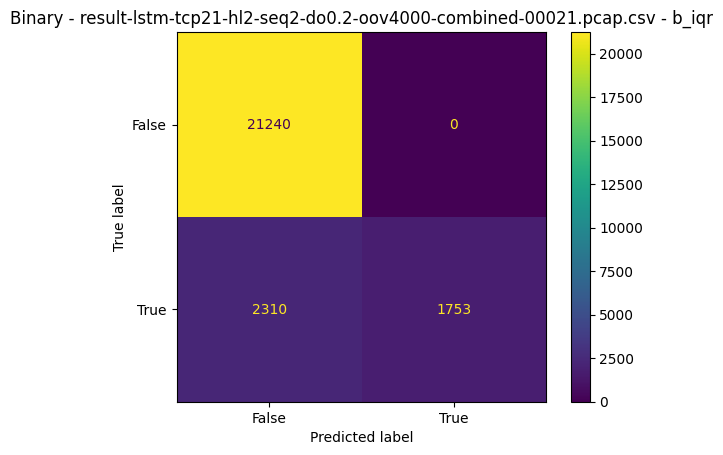

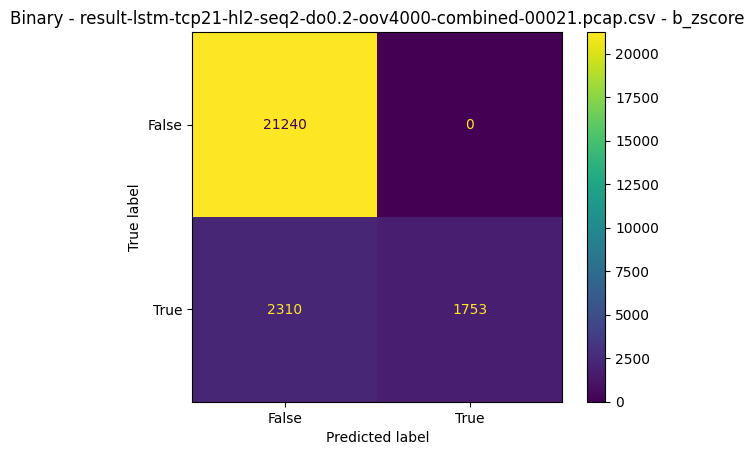

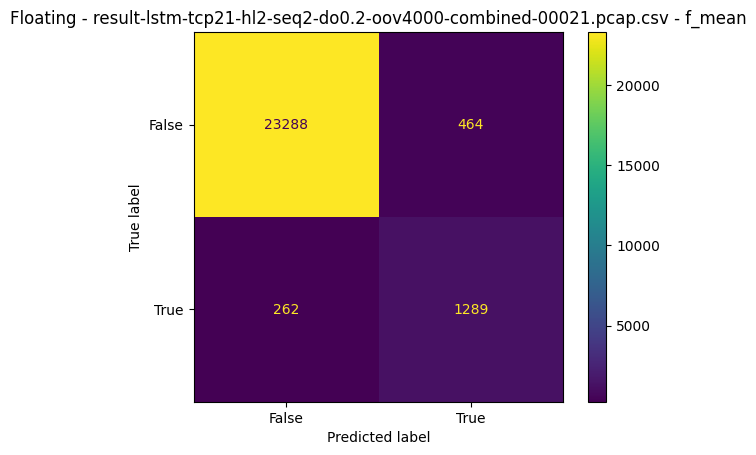

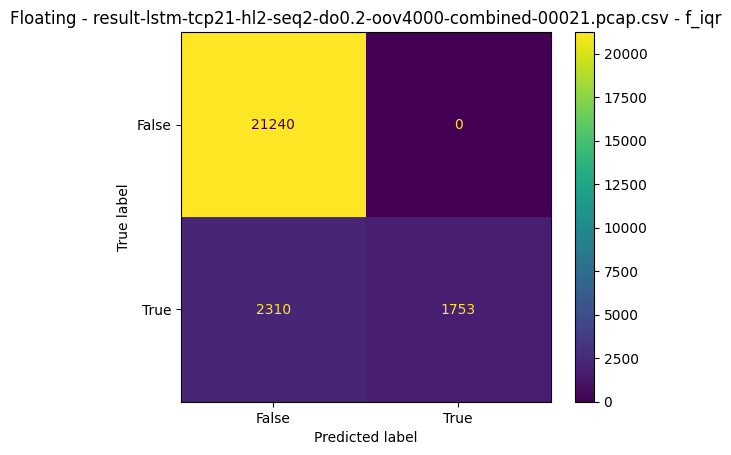

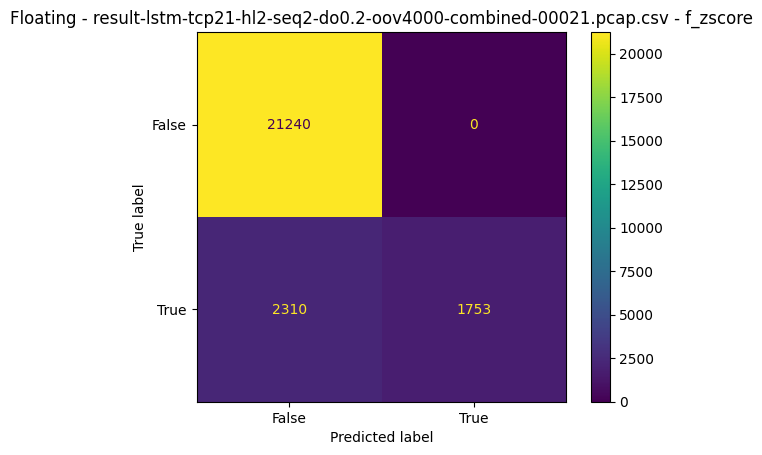

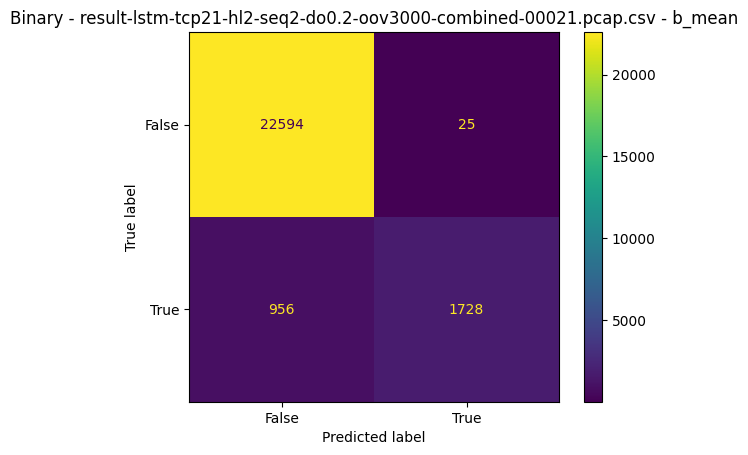

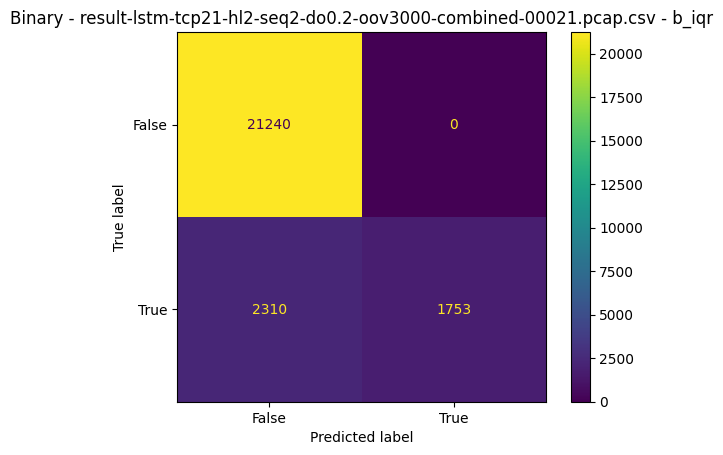

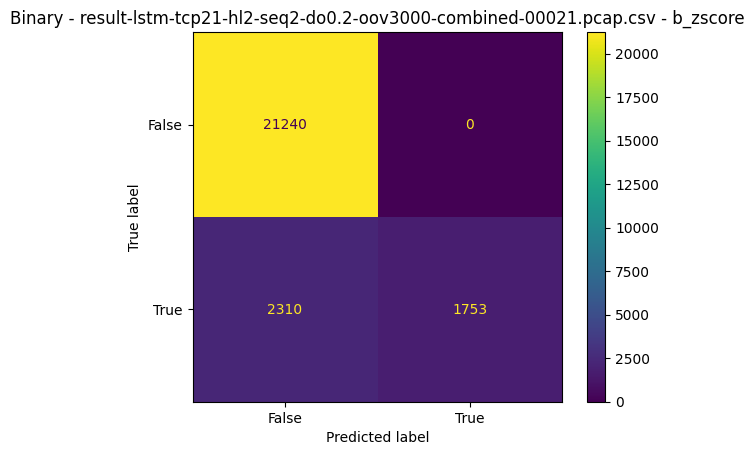

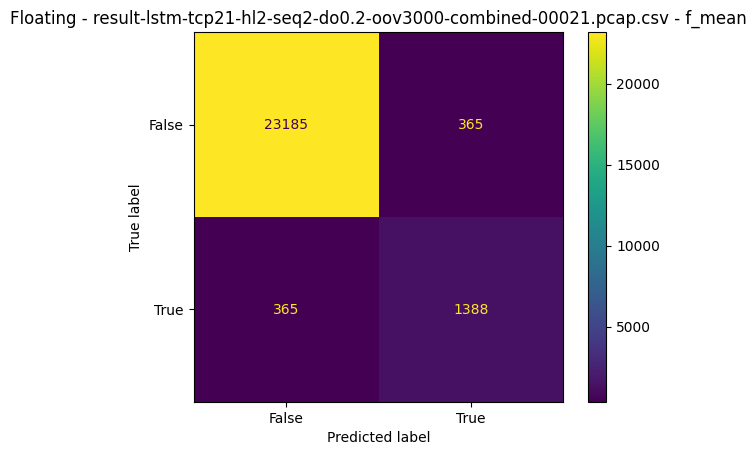

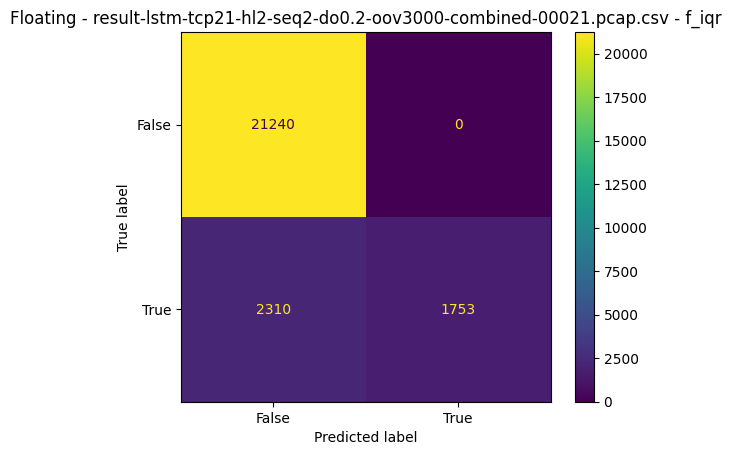

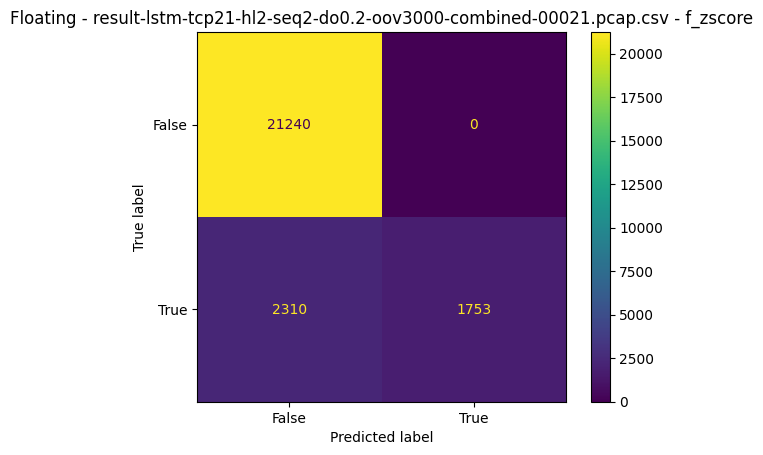

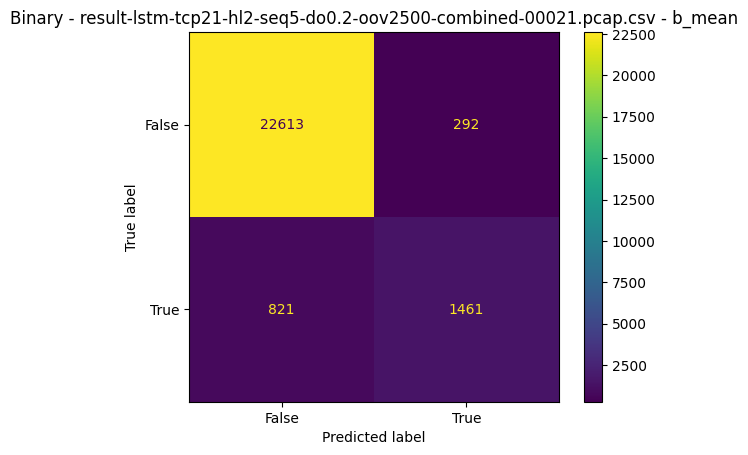

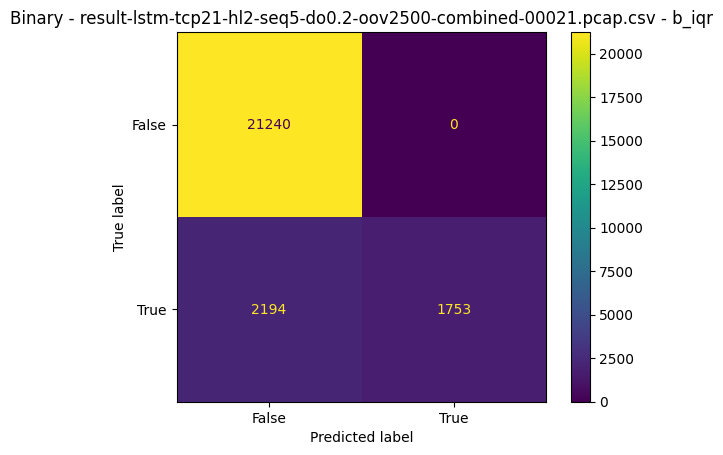

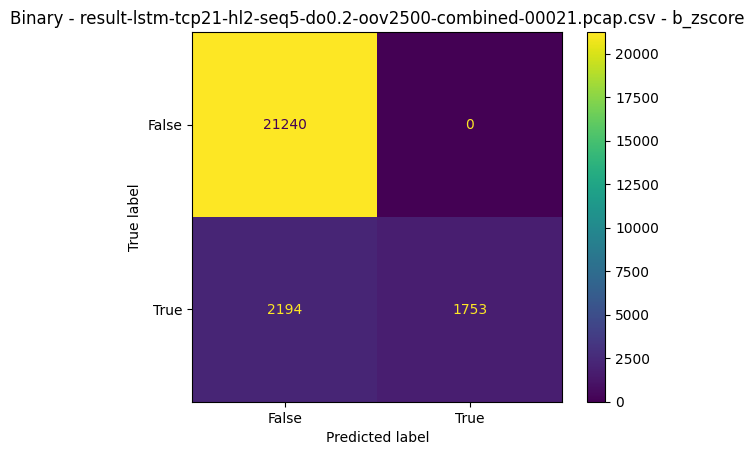

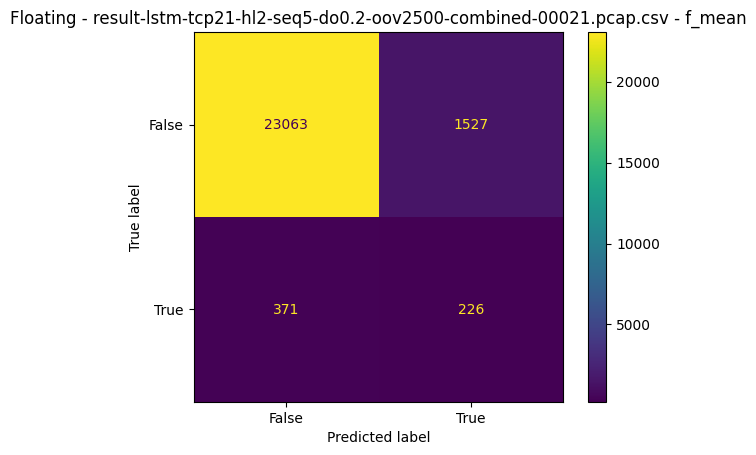

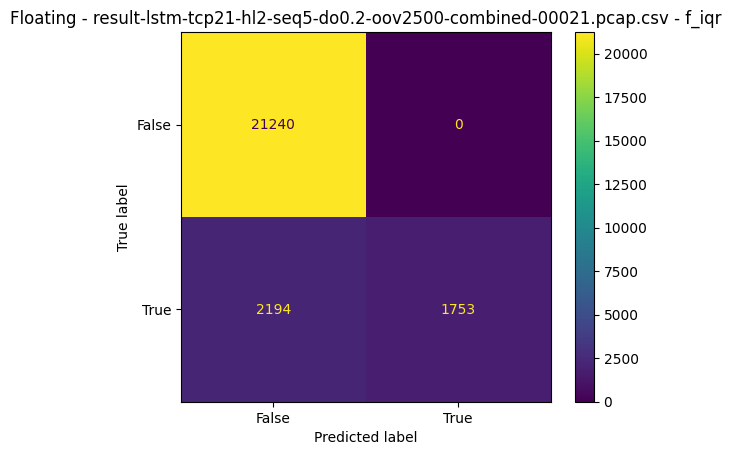

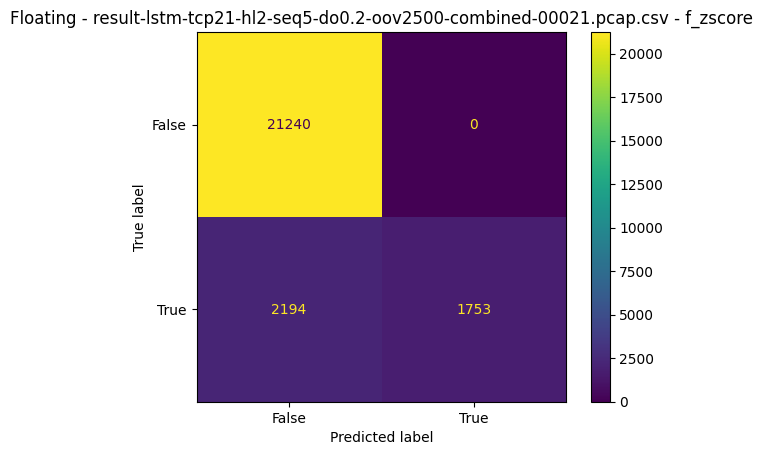

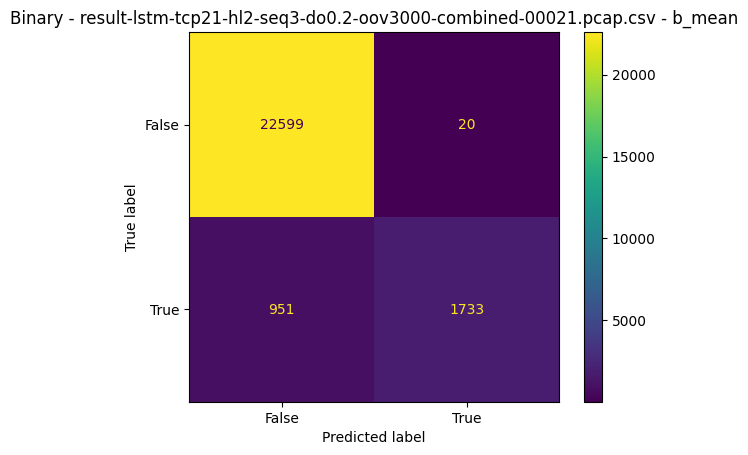

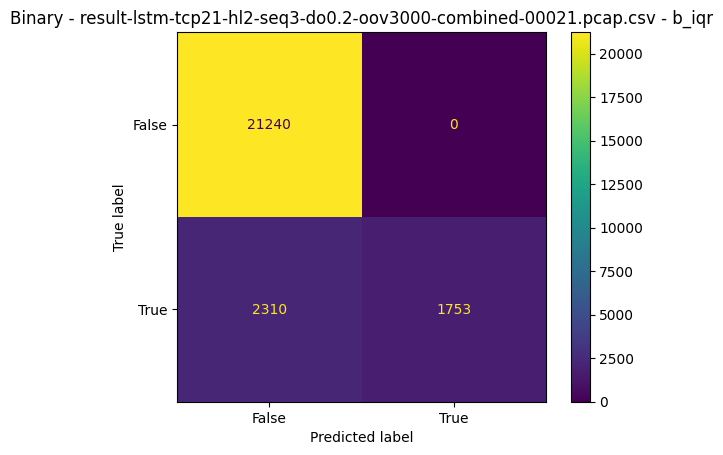

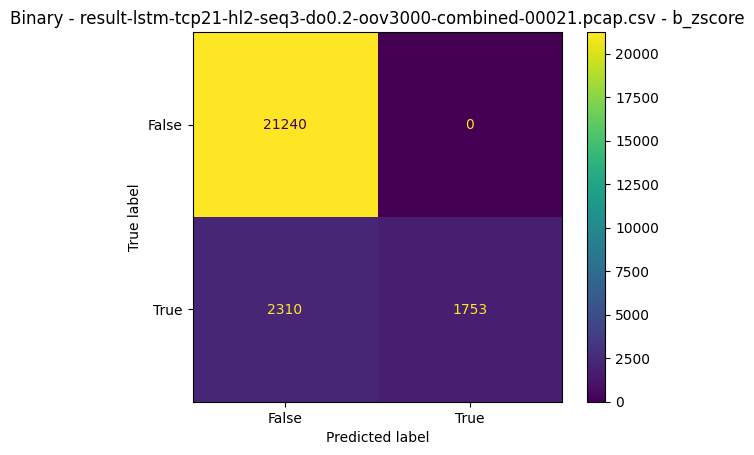

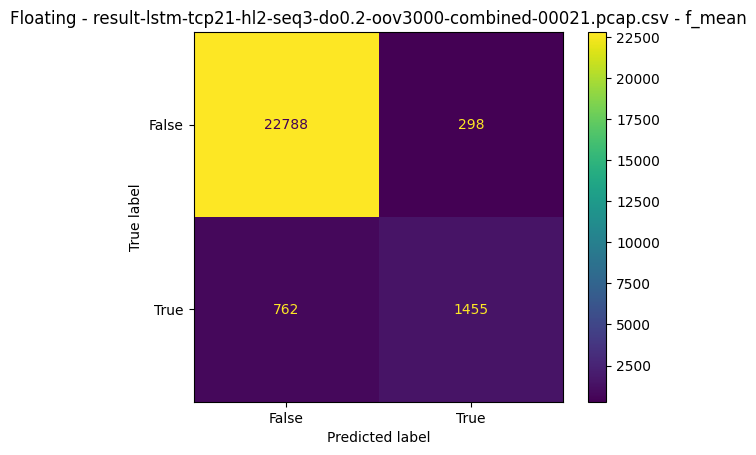

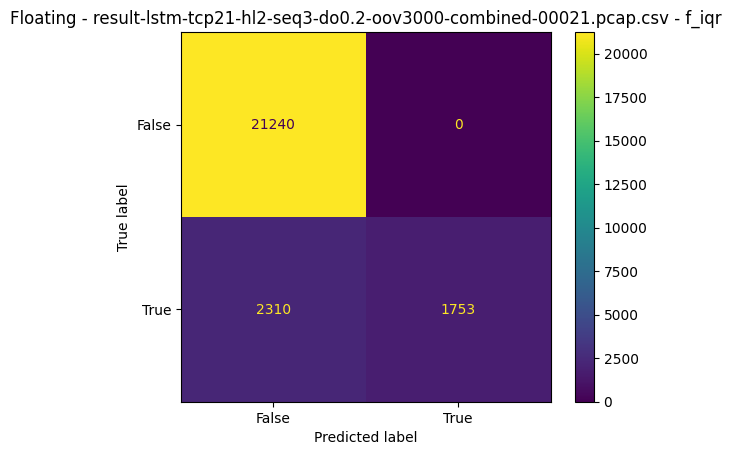

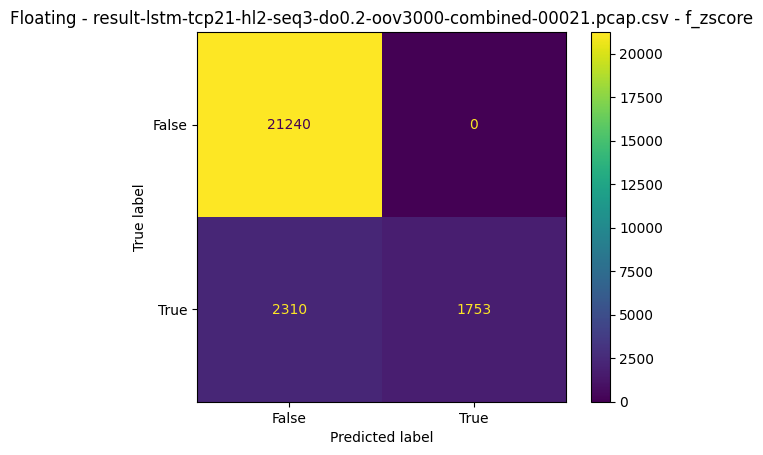

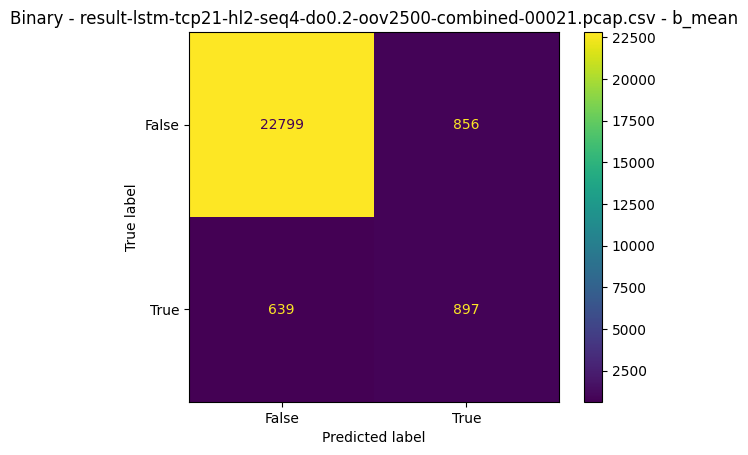

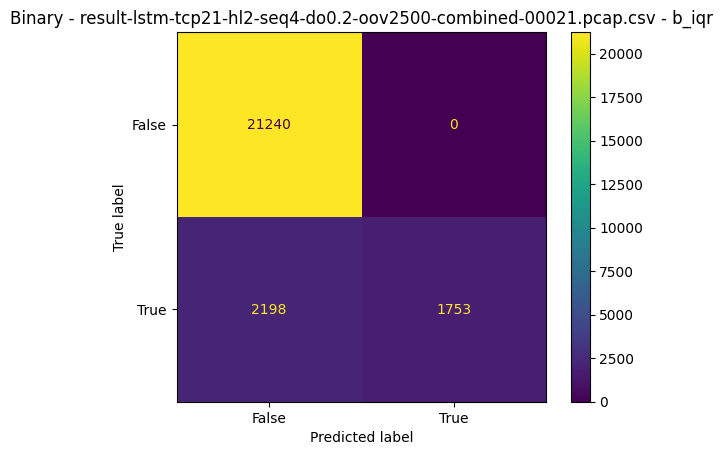

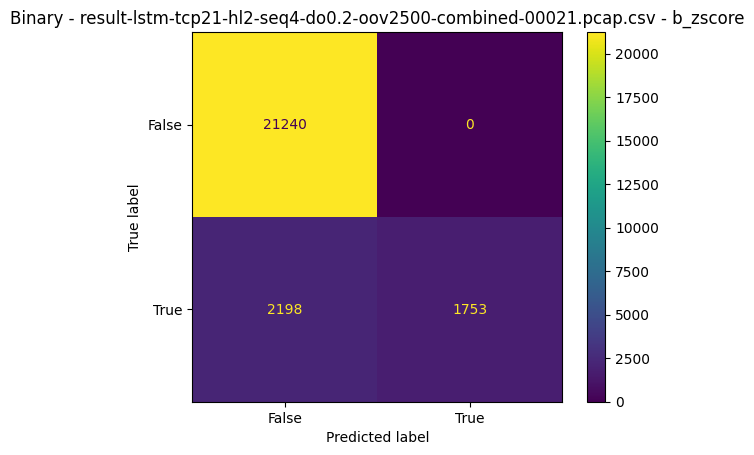

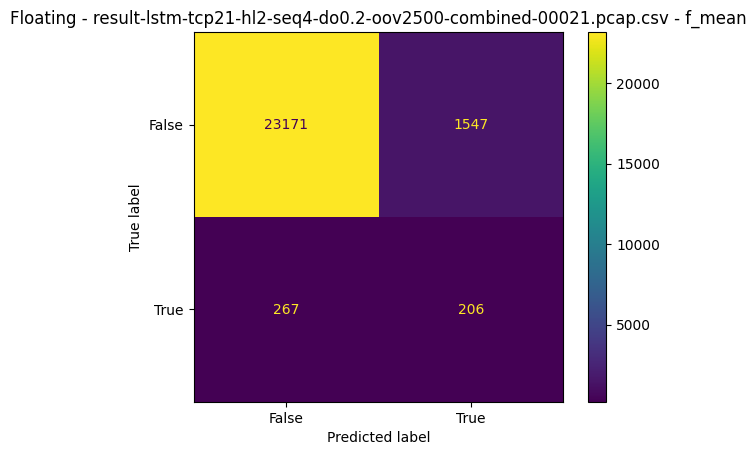

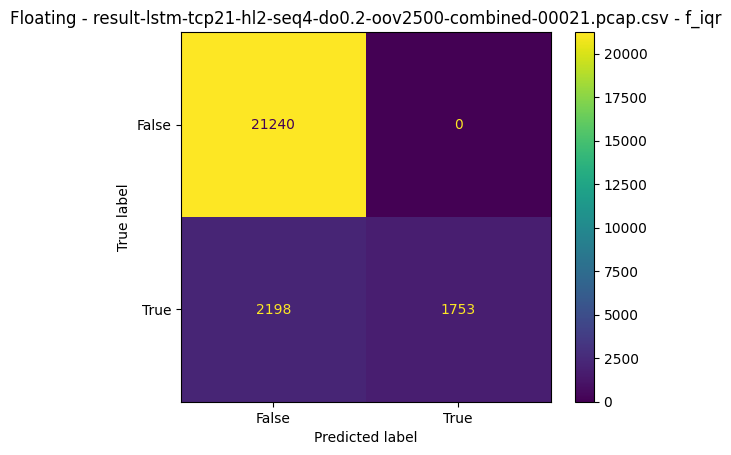

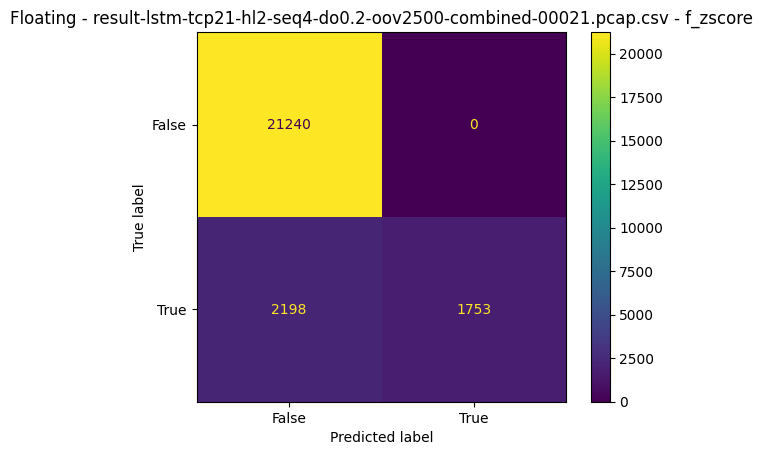

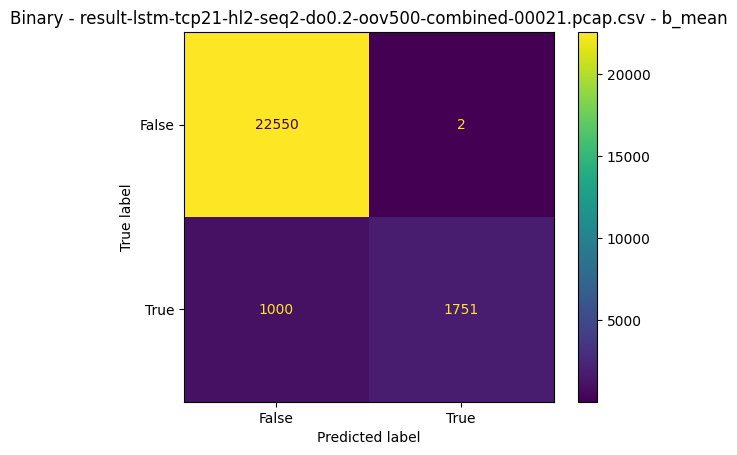

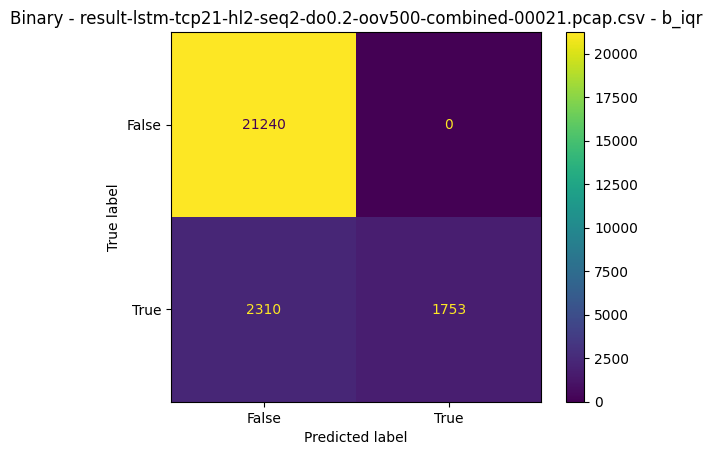

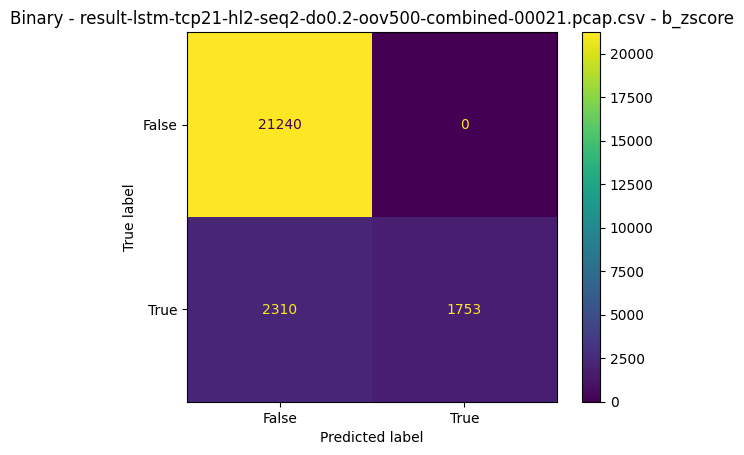

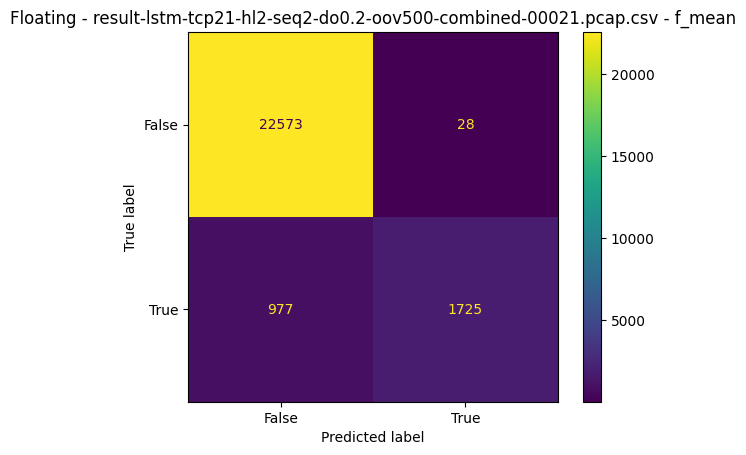

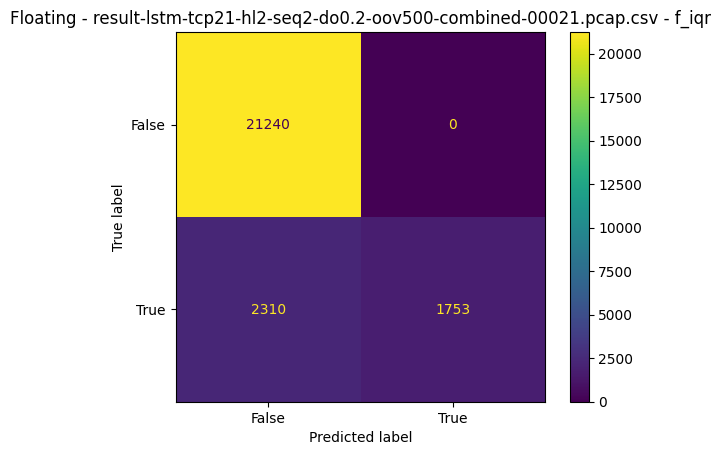

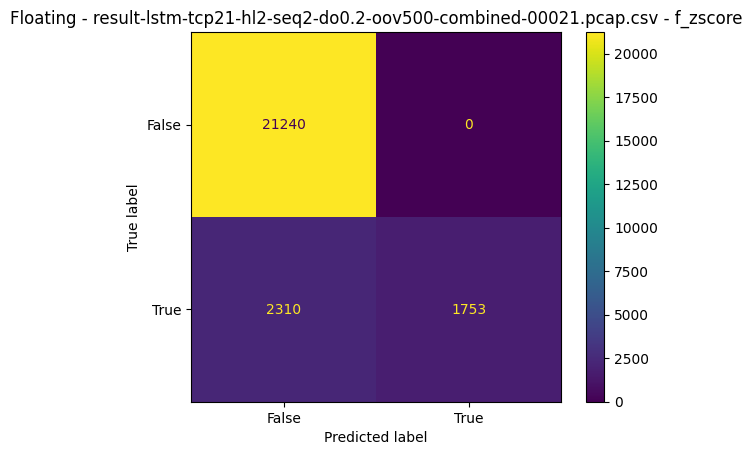

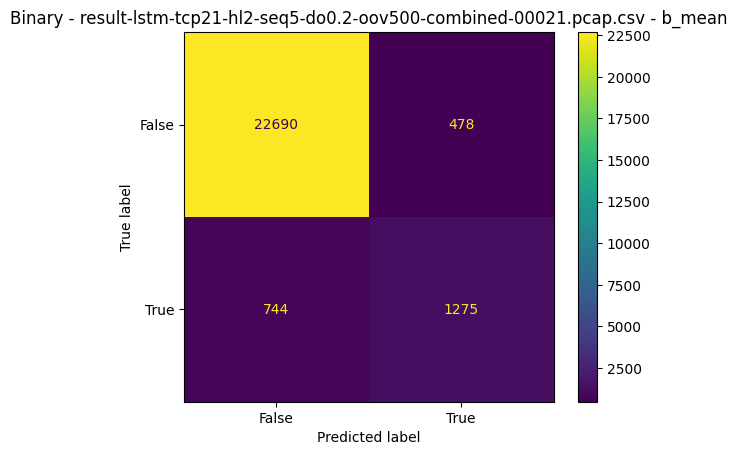

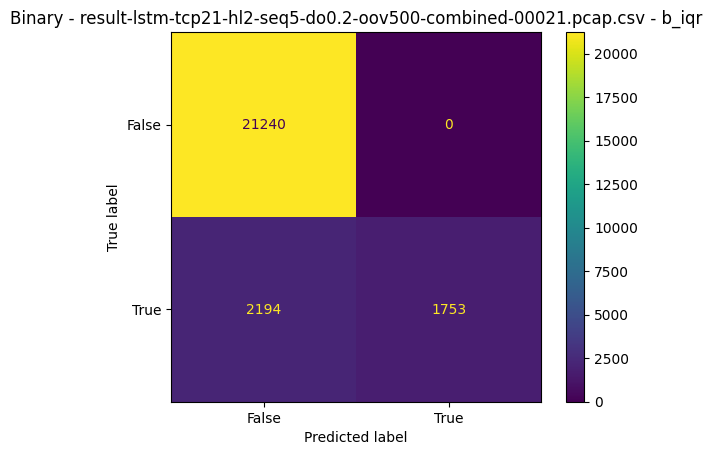

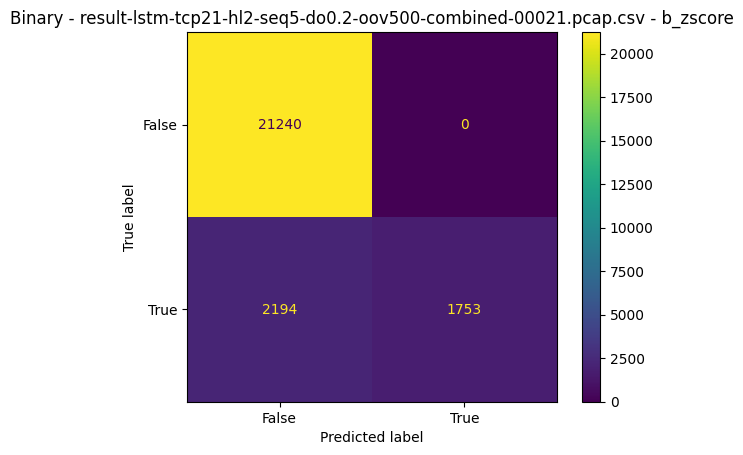

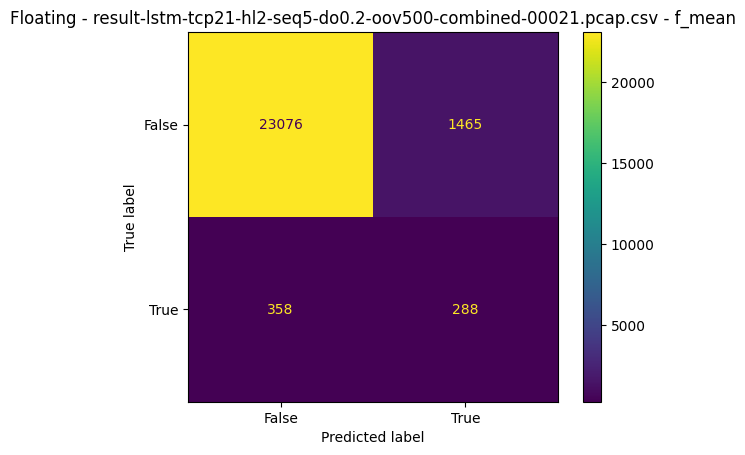

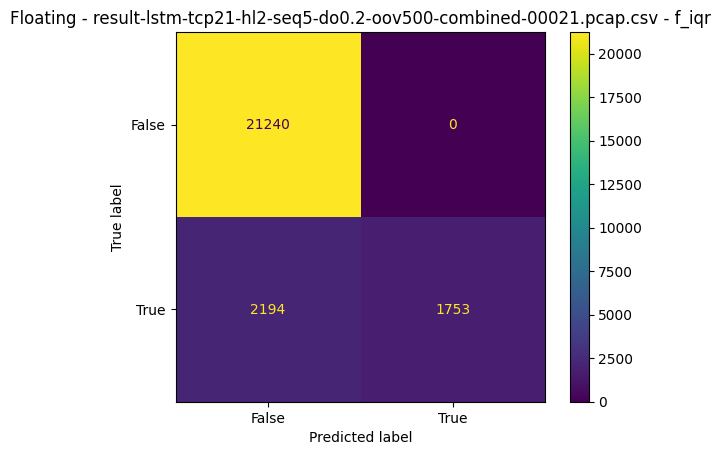

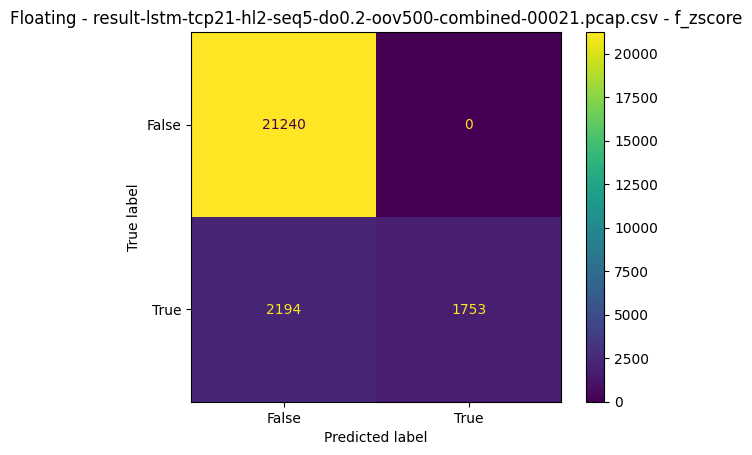

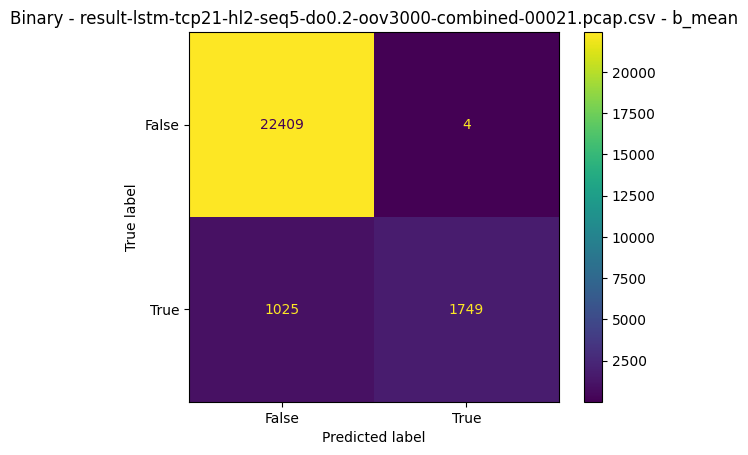

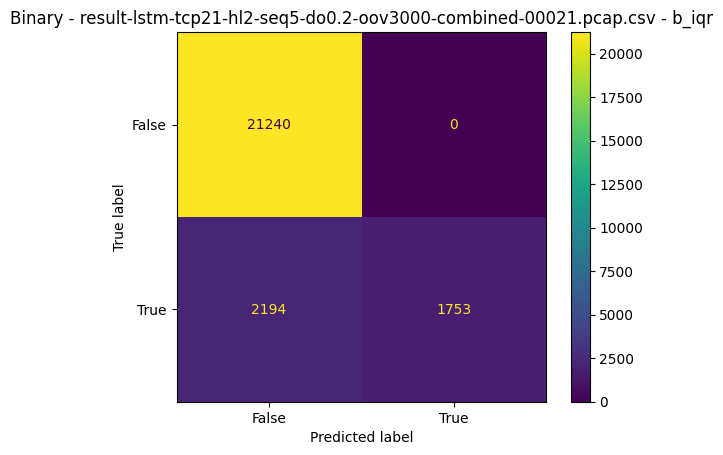

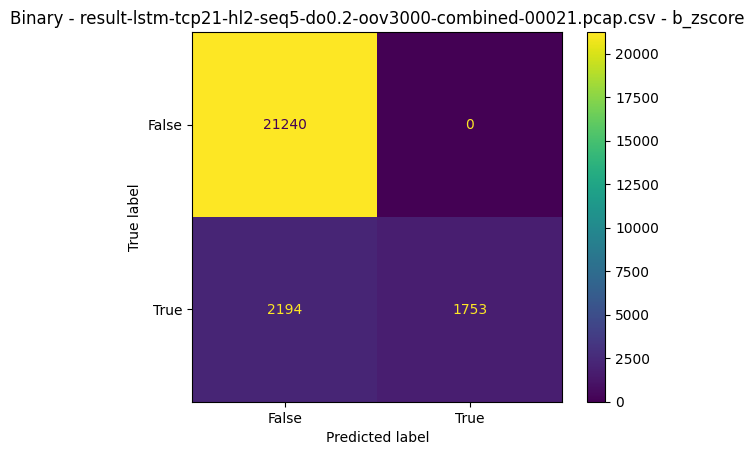

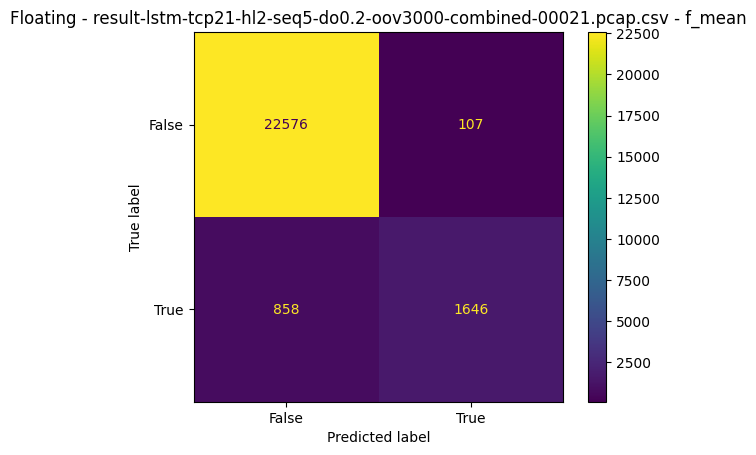

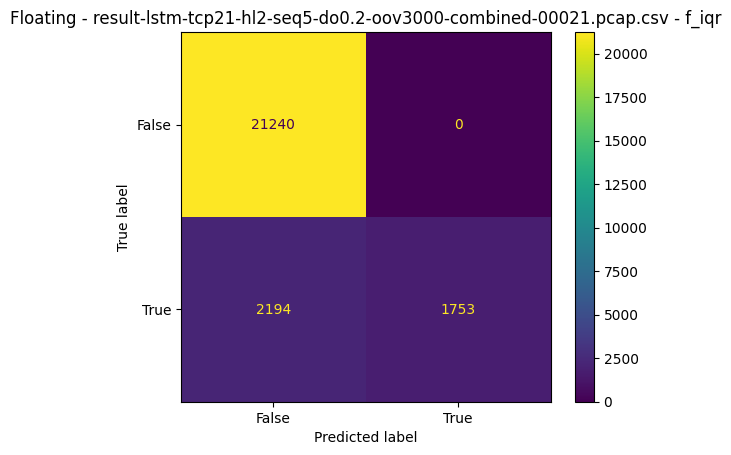

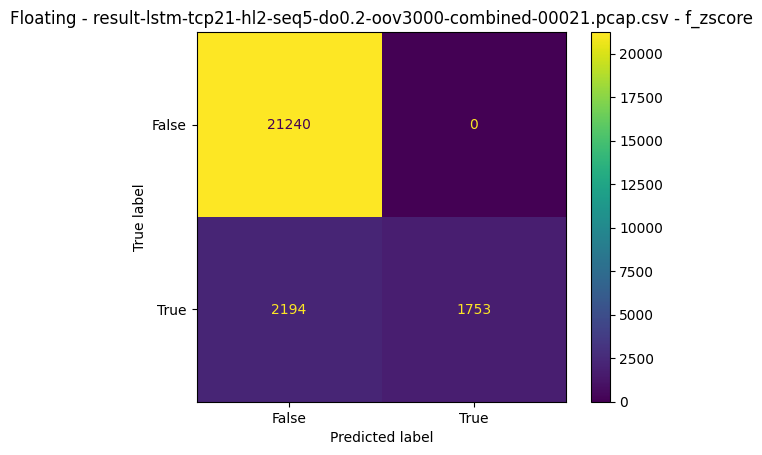

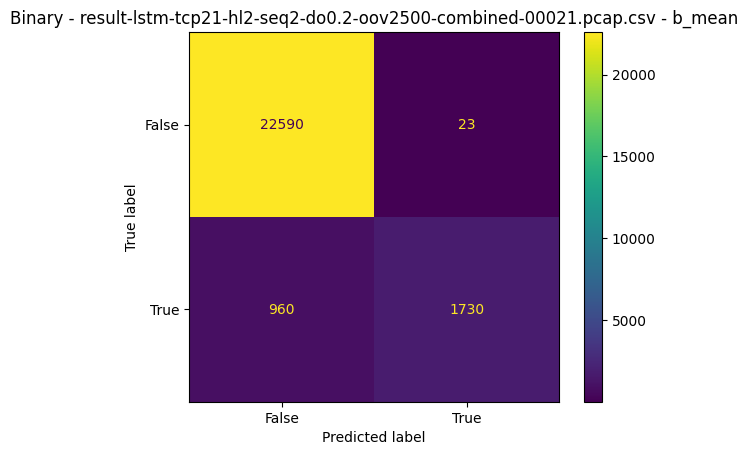

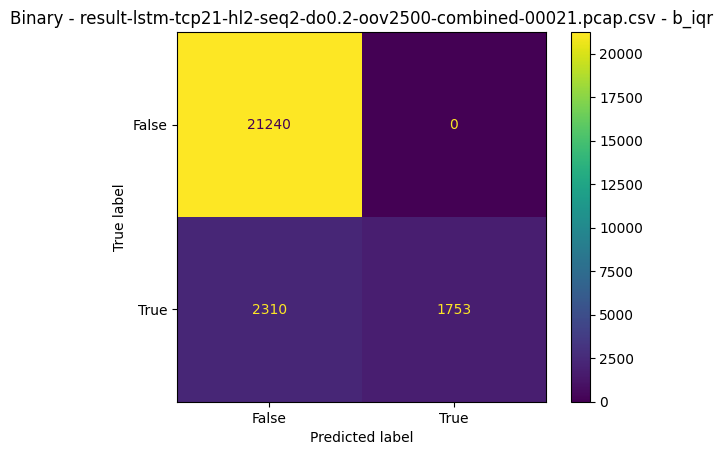

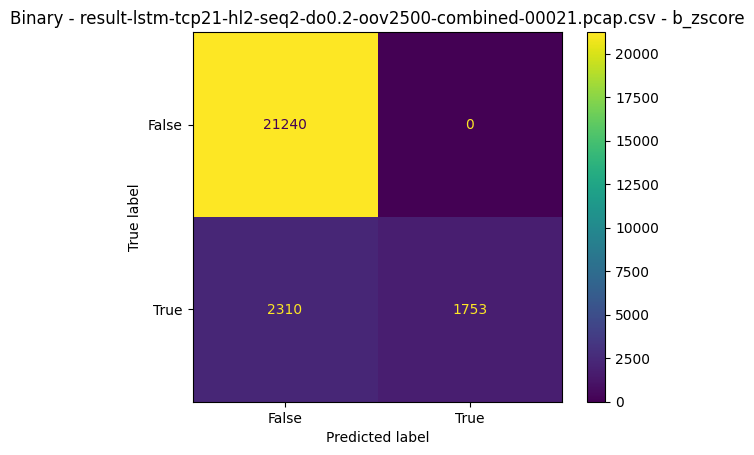

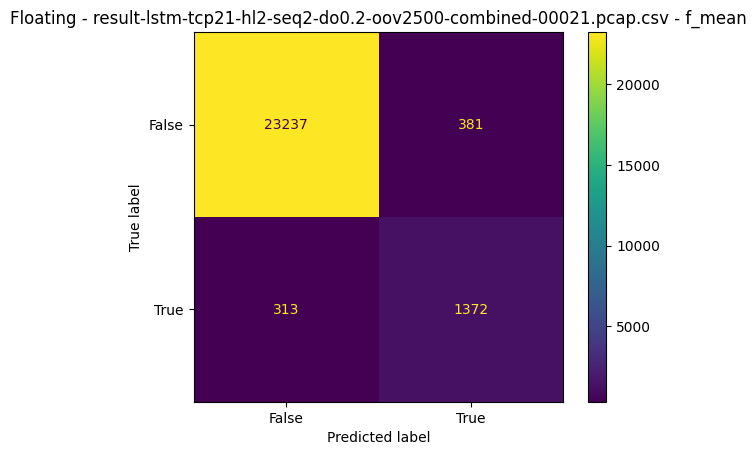

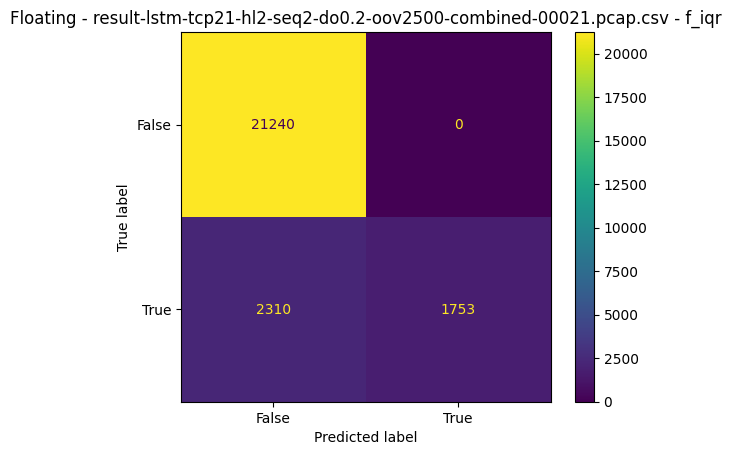

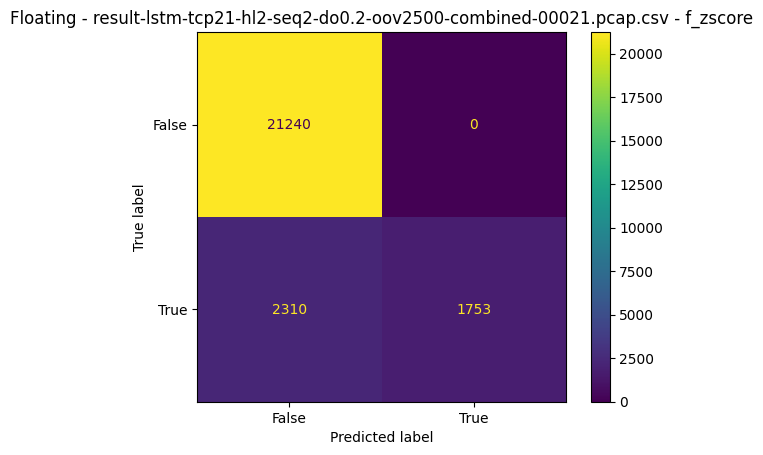

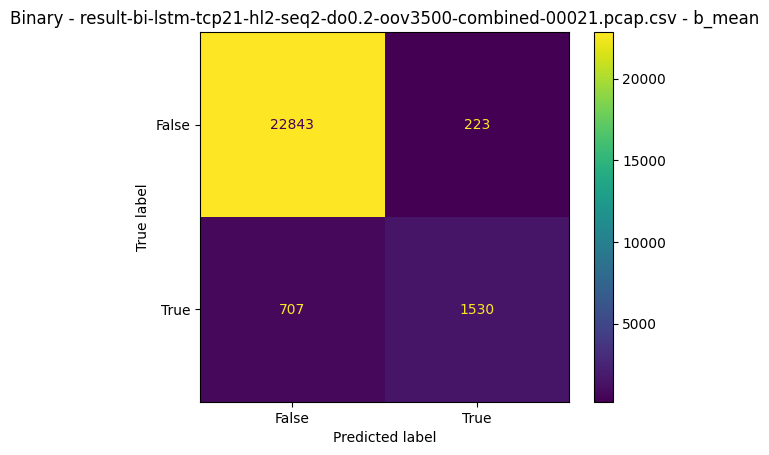

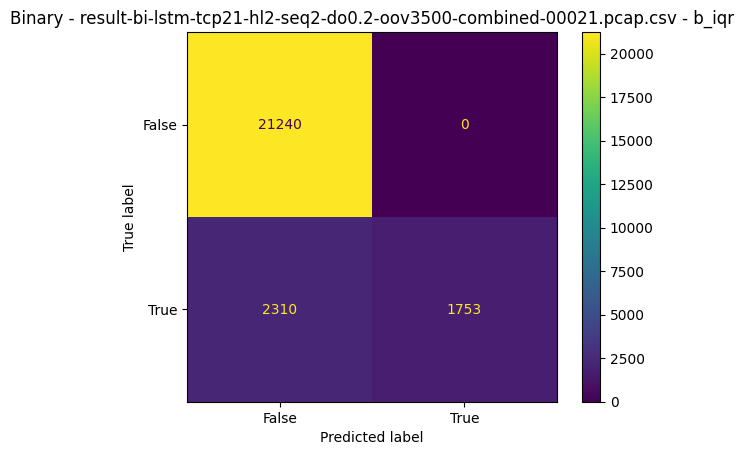

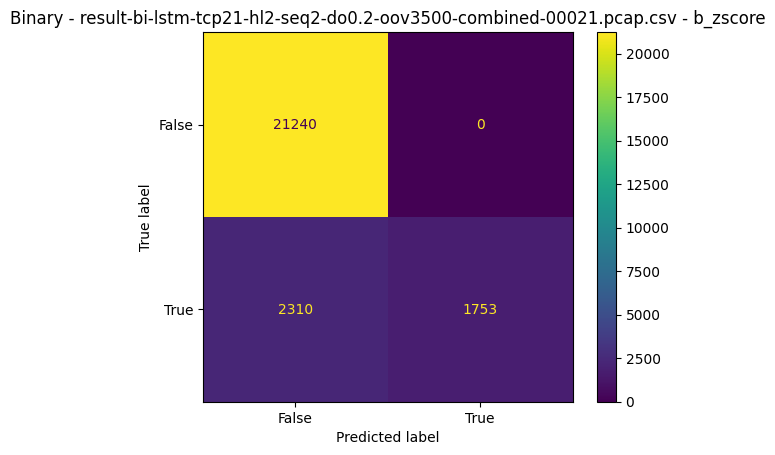

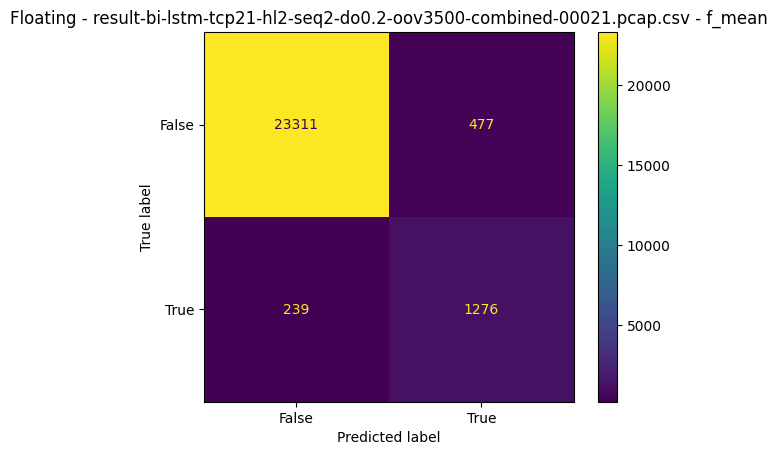

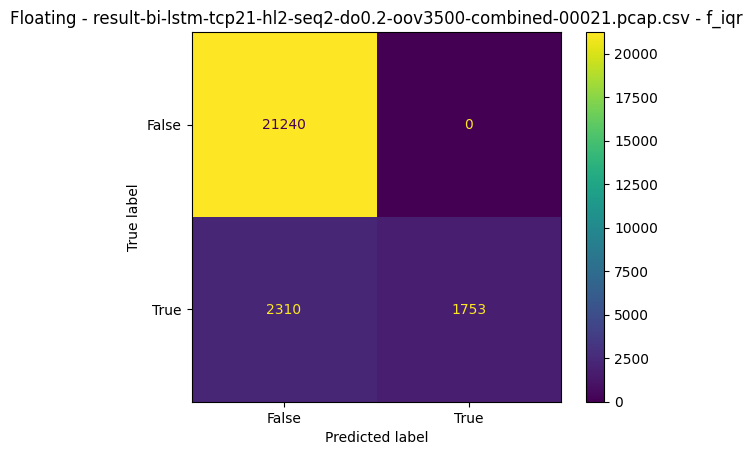

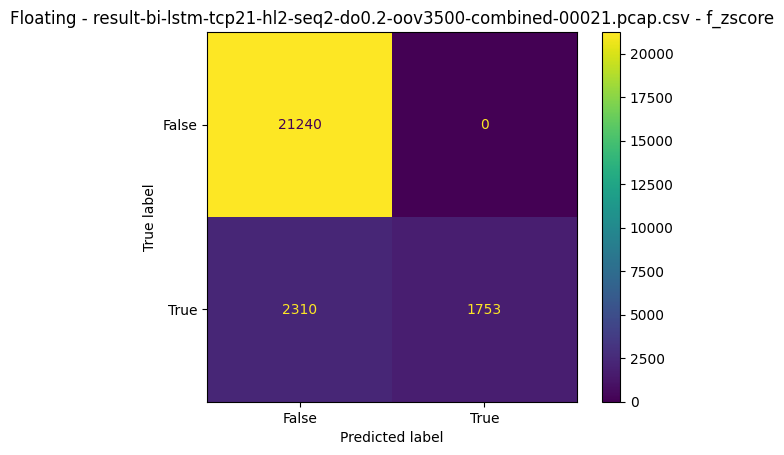

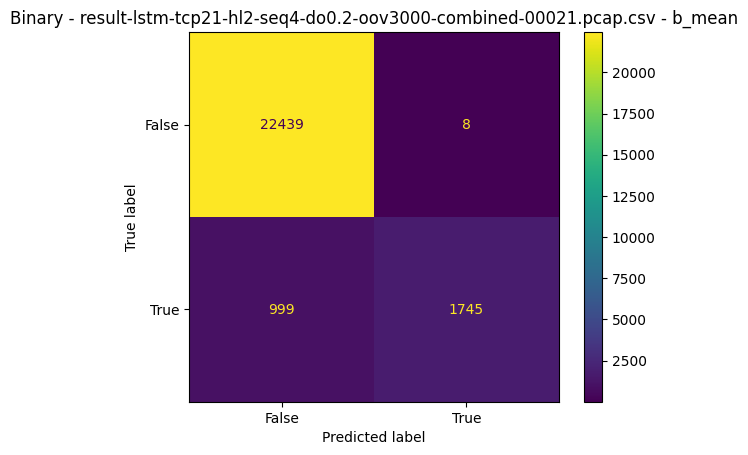

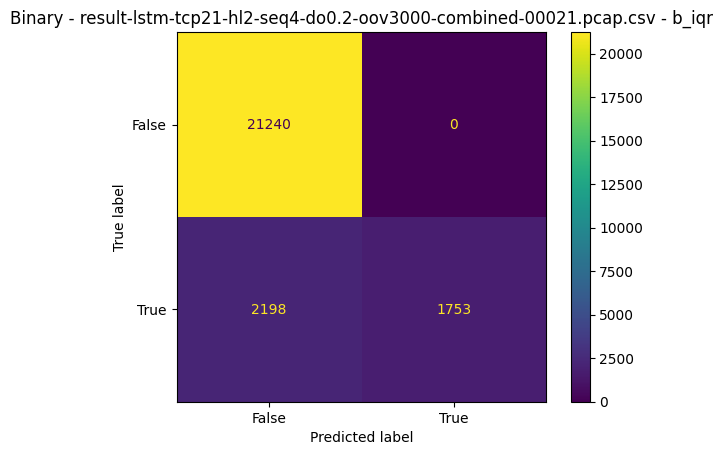

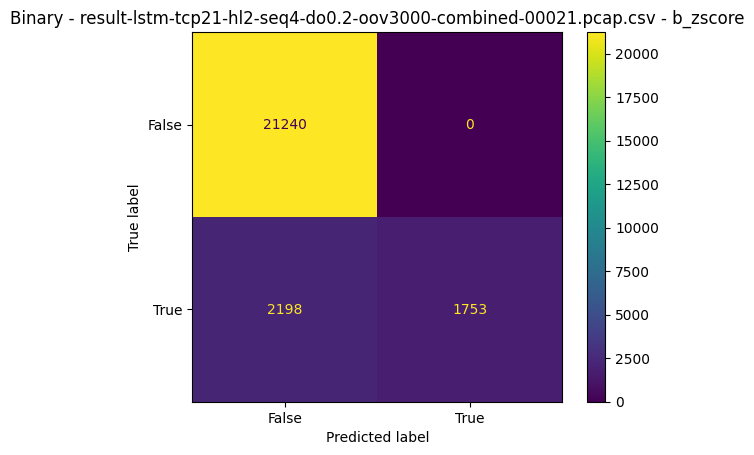

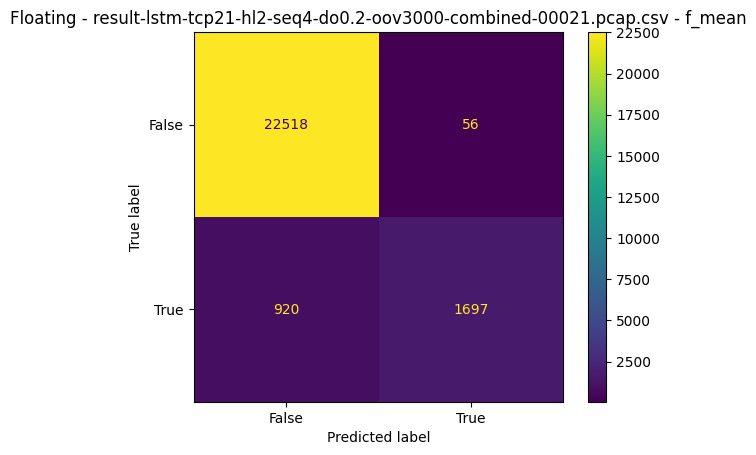

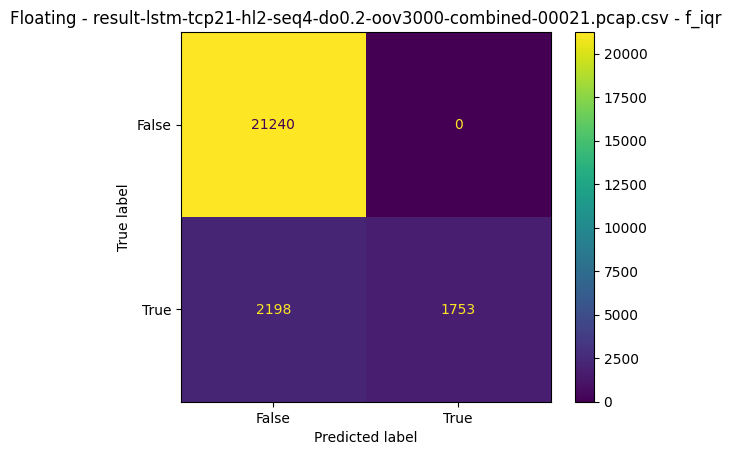

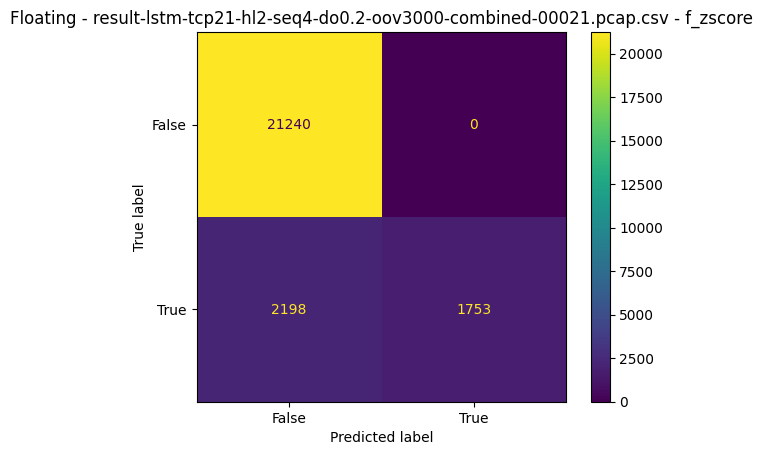

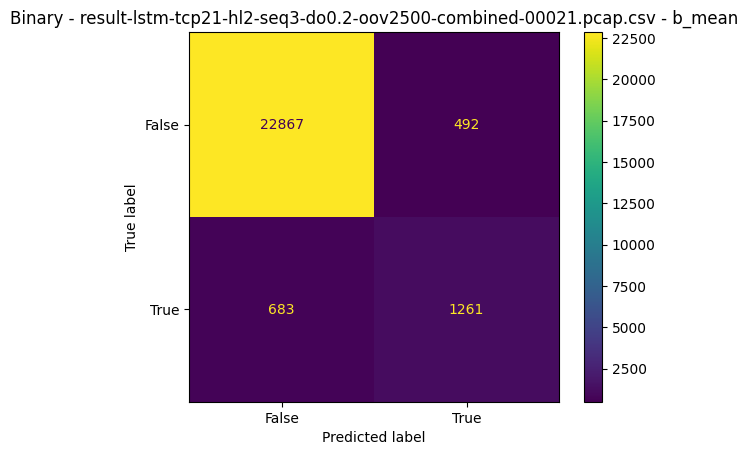

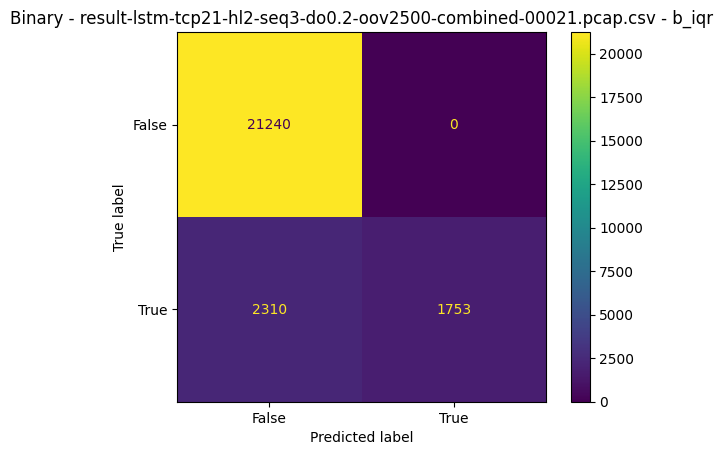

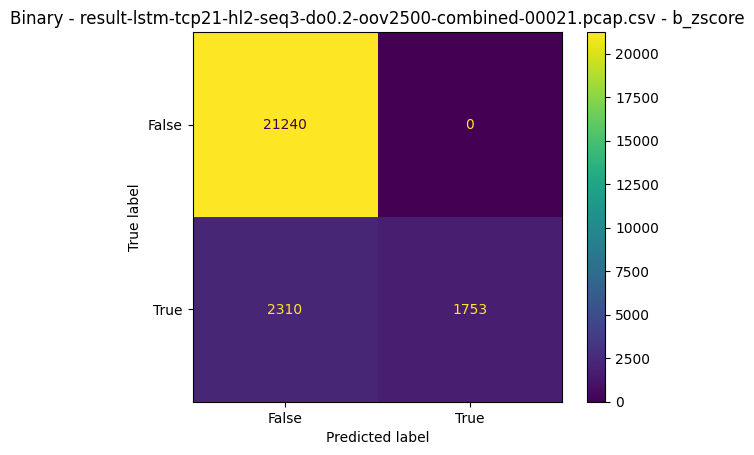

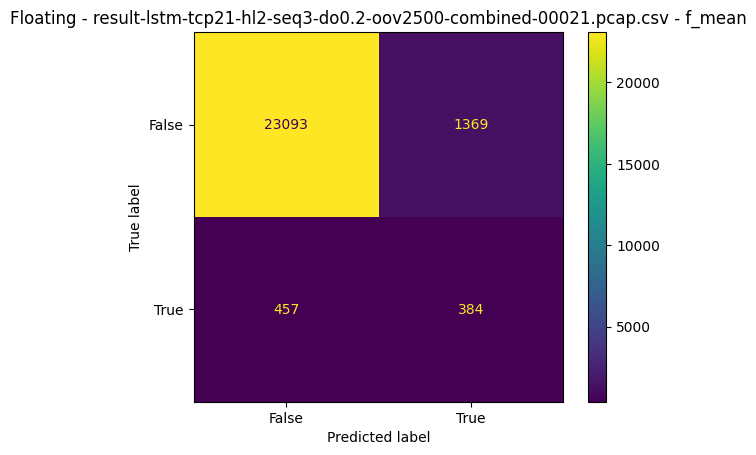

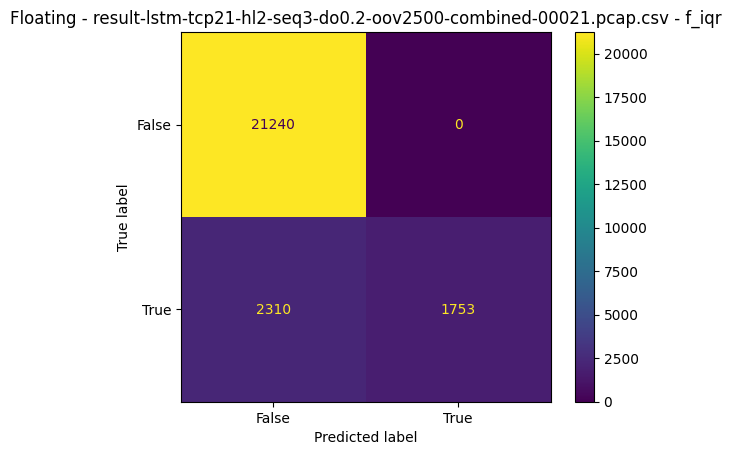

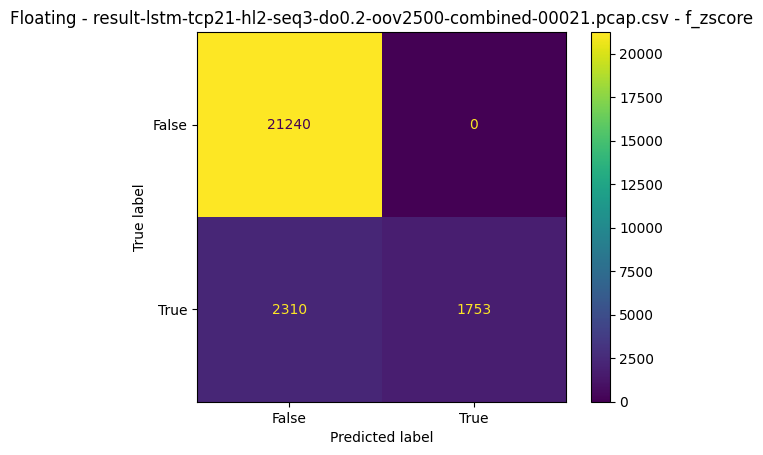

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


for key, val in df_preds.items():
    for method in methods:
        if method == 'binary':
            for i in threshold:
                conf_matrix = confusion_matrix(val[i], val['predicted'])
                cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
                cm_display.plot()
                plt.title(f'Binary - {key} - {i.strip()}')
                plt.show()
        else:
            for i in threshold_2:
                conf_matrix = confusion_matrix(val[i], val['predicted'])
                cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
                cm_display.plot()
                plt.title(f'Floating - {key} - {i.strip()}')
                plt.show()


### F2-Score

In [18]:
for key, val in df_preds.items():
    score[key]['F2 Score'] = dict()
    for method in methods:
        if method == 'binary':
            for i in threshold:
                tn, fp, fn, tp = confusion_matrix(val[i], val['predicted']).ravel()
                f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
                score[key]['F2 Score'][i] = f2
                print(f'F2-Binary-{i}: {f2}')
        else:
            for i in threshold_2:
                tn, fp, fn, tp = confusion_matrix(val[i], val['predicted']).ravel()
                f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
                score[key]['F2 Score'][i] = f2
                print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.6865051360464205
F2-Binary-b_iqr: 0.4868092196612052
F2-Binary-b_zscore: 0.4868092196612052
F2-Floating-f_mean: 0.7514079636399565
F2-Floating-f_iqr: 0.4868092196612052
F2-Floating-f_zscore: 0.4868092196612052
F2-Binary-b_mean: 0.6684719124986727
F2-Binary-b_iqr: 0.4868092196612052
F2-Binary-b_zscore: 0.4868092196612052
F2-Floating-f_mean: 0.36207141840944657
F2-Floating-f_iqr: 0.4868092196612052
F2-Floating-f_zscore: 0.4868092196612052
F2-Binary-b_mean: 0.6767917775534551
F2-Binary-b_iqr: 0.49968644889116925
F2-Binary-b_zscore: 0.49968644889116925
F2-Floating-f_mean: 0.4228819695872556
F2-Floating-f_iqr: 0.49968644889116925
F2-Floating-f_zscore: 0.49968644889116925
F2-Binary-b_mean: 0.48667174409748665
F2-Binary-b_iqr: 0.49923107592413285
F2-Binary-b_zscore: 0.49923107592413285
F2-Floating-f_mean: 0.37841506872560665
F2-Floating-f_iqr: 0.49923107592413285
F2-Floating-f_zscore: 0.49923107592413285
F2-Binary-b_mean: 0.5931016927580501
F2-Binary-b_iqr: 0.4983170745621

### FPR Score

In [19]:
for key, val in df_preds.items():
    score[key]['FPR Score'] = dict()
    for method in methods:
        if method == 'binary':
            for i in threshold:
                tn, fp, fn, tp = confusion_matrix(val[i], val['predicted']).ravel()
                fpr = fp/(fp+tn)
                score[key]['FPR Score'][i] = fpr
                print(f'FPR-Binary-{i}: {fpr}')
        else:
            for i in threshold_2:
                tn, fp, fn, tp = confusion_matrix(val[i], val['predicted']).ravel()
                fpr = fp/(fp+tn)
                score[key]['FPR Score'][i] = fpr
                print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 8.867999822640004e-05
FPR-Binary-b_iqr: 0.0
FPR-Binary-b_zscore: 0.0
FPR-Floating-f_mean: 0.009995260867692042
FPR-Floating-f_iqr: 0.0
FPR-Floating-f_zscore: 0.0
FPR-Binary-b_mean: 0.021122846025569762
FPR-Binary-b_iqr: 0.0
FPR-Binary-b_zscore: 0.0
FPR-Floating-f_mean: 0.0518679119412942
FPR-Floating-f_iqr: 0.0
FPR-Floating-f_zscore: 0.0
FPR-Binary-b_mean: 0.012139207894851753
FPR-Binary-b_iqr: 0.0
FPR-Binary-b_zscore: 0.0
FPR-Floating-f_mean: 0.04891418050964475
FPR-Floating-f_iqr: 0.0
FPR-Floating-f_zscore: 0.0
FPR-Binary-b_mean: 0.04643988660997165
FPR-Binary-b_iqr: 0.0
FPR-Binary-b_zscore: 0.0
FPR-Floating-f_mean: 0.05410664017221394
FPR-Floating-f_iqr: 0.0
FPR-Floating-f_zscore: 0.0
FPR-Binary-b_mean: 0.03469258398478766
FPR-Binary-b_iqr: 0.0002823928083964795
FPR-Binary-b_zscore: 0.0002823928083964795
FPR-Floating-f_mean: 0.05307564422277639
FPR-Floating-f_iqr: 0.0
FPR-Floating-f_zscore: 0.0
FPR-Binary-b_mean: 0.03652542372881356
FPR-Binary-b_iqr: 0.0
FPR-Binar

/var/folders/gk/9tqpj6f142gb1f8tmc0trqyh0000gn/T/ipykernel_26888/337298463.py:13: RuntimeWarning: invalid value encountered in long_scalars
  fpr = fp/(fp+tn)
/var/folders/gk/9tqpj6f142gb1f8tmc0trqyh0000gn/T/ipykernel_26888/337298463.py:13: RuntimeWarning: invalid value encountered in long_scalars
  fpr = fp/(fp+tn)


In [20]:
df_scores = dict()
for key, val in df_preds.items():
    df_scores[key] = pd.DataFrame.from_dict(score[key])
    print(df_scores[key])

          Detection Rate  F2 Score  FPR Score
b_mean          0.636727  0.686505   0.000089
b_iqr           0.431455  0.486809   0.000000
b_zscore        0.431455  0.486809   0.000000
f_mean          0.727055  0.751408   0.009995
f_iqr           0.431455  0.486809   0.000000
f_zscore        0.431455  0.486809   0.000000
          Detection Rate  F2 Score  FPR Score
b_mean          0.657098  0.668472   0.021123
b_iqr           0.431455  0.486809   0.000000
b_zscore        0.431455  0.486809   0.000000
f_mean          0.385898  0.362071   0.051868
f_iqr           0.431455  0.486809   0.000000
f_zscore        0.431455  0.486809   0.000000
          Detection Rate  F2 Score  FPR Score
b_mean          0.645232  0.676792   0.012139
b_iqr           0.444135  0.499686   0.000000
b_zscore        0.444135  0.499686   0.000000
f_mean          0.453416  0.422882   0.048914
f_iqr           0.444135  0.499686   0.000000
f_zscore        0.444135  0.499686   0.000000
          Detection Rate  F2 Score

In [21]:
with pd.ExcelWriter("Hasil Eksperimen-2.xlsx") as writer:
    for key, val in df_scores.items():
        seq = key.split('-')[4]
        oov = key.split('-')[6]
        val.to_excel(writer, sheet_name=f'{seq}-{oov}', index=False)